# CREDIT CARD FRAUD DETECTION

## AIM: <br>
In this project we will __predict fraudulent credit card transactions__ with the help of __Machine learning models__. 

## Business problem overview: 
For many banks, retaining high profitable customers is the number one business goal. __Banking fraud__, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

With the rise in digital payment channels, the __number of fraudulent transactions is also increasing__ in new and different ways.<br> 

In the banking industry, __credit card fraud detection using machine learning__ is not only a trend but a necessity for them to put __proactive monitoring and fraud prevention mechanisms__ in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions. 

## Understanding and defining fraud:

__Credit card fraud__ is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, __skimming__ is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. <br>
Apart from this, following are the other ways:

- Manipulation/alteration of genuine cards
- Creation of counterfeit cards
- Stealing/loss of credit cards
- Fraudulent telemarketing

## Project Pipeline

- Data Understanding
- Exploratory Data Analysis (EDA)
- Train/Test Split
- Model Building and Hyperparameter tuning
- Model Evaluation



## 1. IMPORT REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd

# Import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import Model building packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Import performance metrics packages
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import accuracy_score, recall_score

# Oversampling packages
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [2]:
# To display output fully without scrolling

%%html
<style>
.output_wrapper .output {
  overflow-y: visible;
  height: fit-content;
}
</style>

## 2. DATA UNDERSTANDING

In [4]:
# Read the dataset

# df = pd.read_csv('gdrive/My Drive/creditcard.csv')

df = pd.read_csv('creditcard.csv')

# First 5 records of the dataset

df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
# Shape of the dataset

df.shape

(284807, 31)

In [6]:
# Observe the different feature type present in the data

df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

__All columns in the dataset are numerical.__

In [7]:
# Info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### INFERENCE: 
- From the above information, we can see that the dataset contains __31 columns__, out of which all the columns except the class label are of __'float'__ type. 
- The target variable __'Class'__ is of __'int'__ type.
- Given that the variables __V1__ to __V28__ are __PCA transformed variables__.

In [8]:
# Description of the dataset

df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

### INFERENCE:
- The column 'Amount' seems to be highly skewed and the outliers have to be treated before model building.
- Variables __V1__ to __V28__ are normally distributed (follows __Gaussian distribution__). This is because when we apply PCA on the dataset, new variables are obtained from the __weighted combination of original features__.

In [9]:

# Check for null values in the dataset

df.isnull().sum().sum()

0

__No null values present in the dataset.__

In [10]:
# Check the number of non-fraudulent/fraudulent records in the dataset

df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### INFERENCE:
- Number of non-fraudulent records: __284315__
- Number of fraudulent records: __492__

In [11]:
# Here we will observe the distribution of our classes

classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print("Percentage of Non-fraudulent transations in the dataset :",normal_share)
print("\nPercentage of fraudulent transations in the dataset :",fraud_share)

Percentage of Non-fraudulent transations in the dataset : 99.82725143693798

Percentage of fraudulent transations in the dataset : 0.1727485630620034


### INFERENCE: 
__It is evident that distribution of classes is highly imbalanced in the given dataset.__

## 3. EXPLORATORY DATA ANALYSIS (EDA)

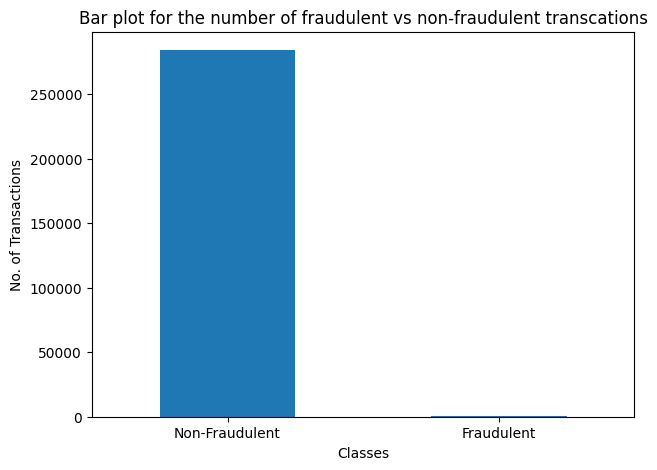

In [12]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations

classes.plot(kind='bar',figsize=(7,5), xlabel='Classes', ylabel='No. of Transactions')
plt.title('Bar plot for the number of fraudulent vs non-fraudulent transcations')
plt.xticks((0, 1), ('Non-Fraudulent', 'Fraudulent'), rotation=0)
plt.show()

### INFERENCE:
- From the barplot, it is observed that the distribution of classes is highly __imbalanced__. 
- Dataset contains __2,84,315 non-fraudulent transactions__ and __492 fraudulent transactions__. (Total 2,84,807 transactions)

In [13]:
# Create a dataframe to store the percentage of fraudulent and non-fraudulent transactions

class_percentage = pd.DataFrame({'Classes' : ['Non-fraudulent transactions','Fraudulent transactions'],
                                 'Percentage' : [normal_share,fraud_share]
                                 })
#class_percentage

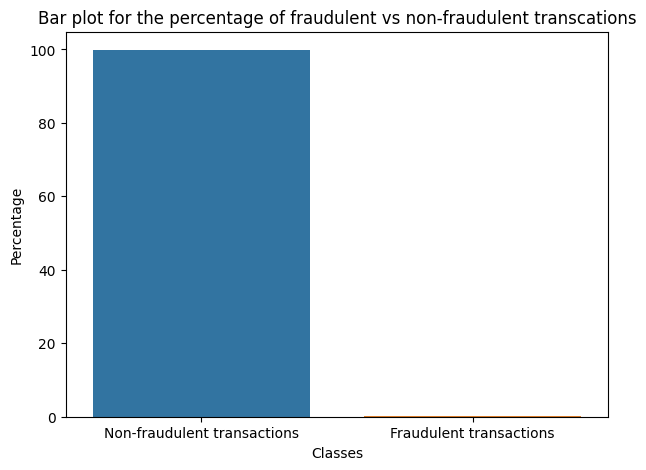

In [14]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(7,5))
sns.barplot(x='Classes', y='Percentage', data=class_percentage)
plt.title('Bar plot for the percentage of fraudulent vs non-fraudulent transcations')
plt.show()

### INFERENCE:
- From the above plot, it is observed that the percentage of non-fraudulent transactions is of __99.83%__ while the percentage of fraudulent transactions is of __0.17%__.
- This implies the vast difference in the percentage of classes distributed in the given dataset.

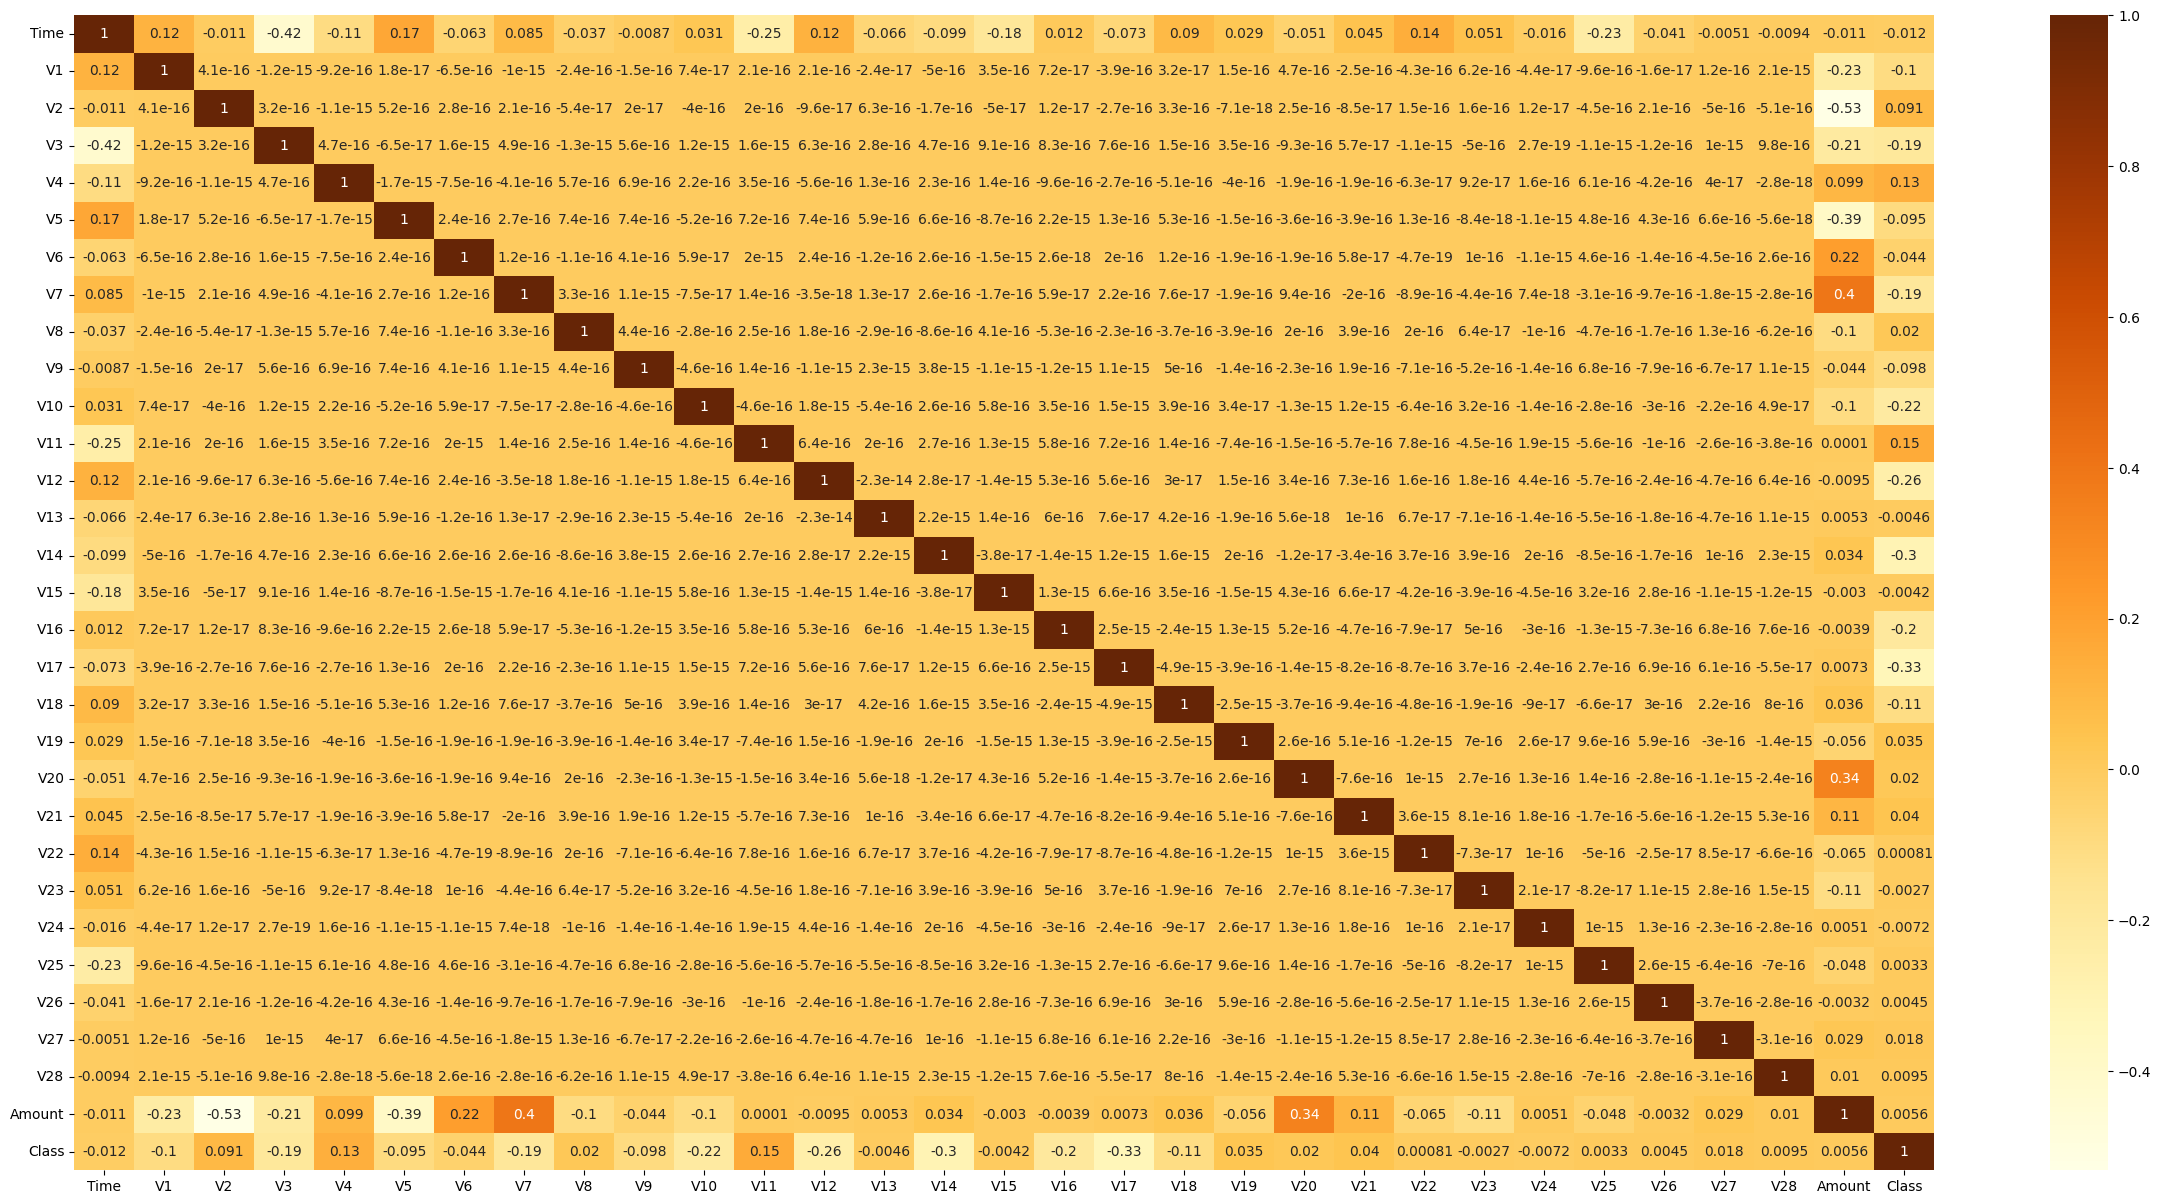

In [15]:
# Heatmap to visualize correlations in the dataset

plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), cmap="YlOrBr", annot=True)
plt.show()

### INFERENCE: 
- From the heatmap, it is evident that the variables are not much correlated with each other. This is because 28 variables of the dataset are already PCA transformed variables.

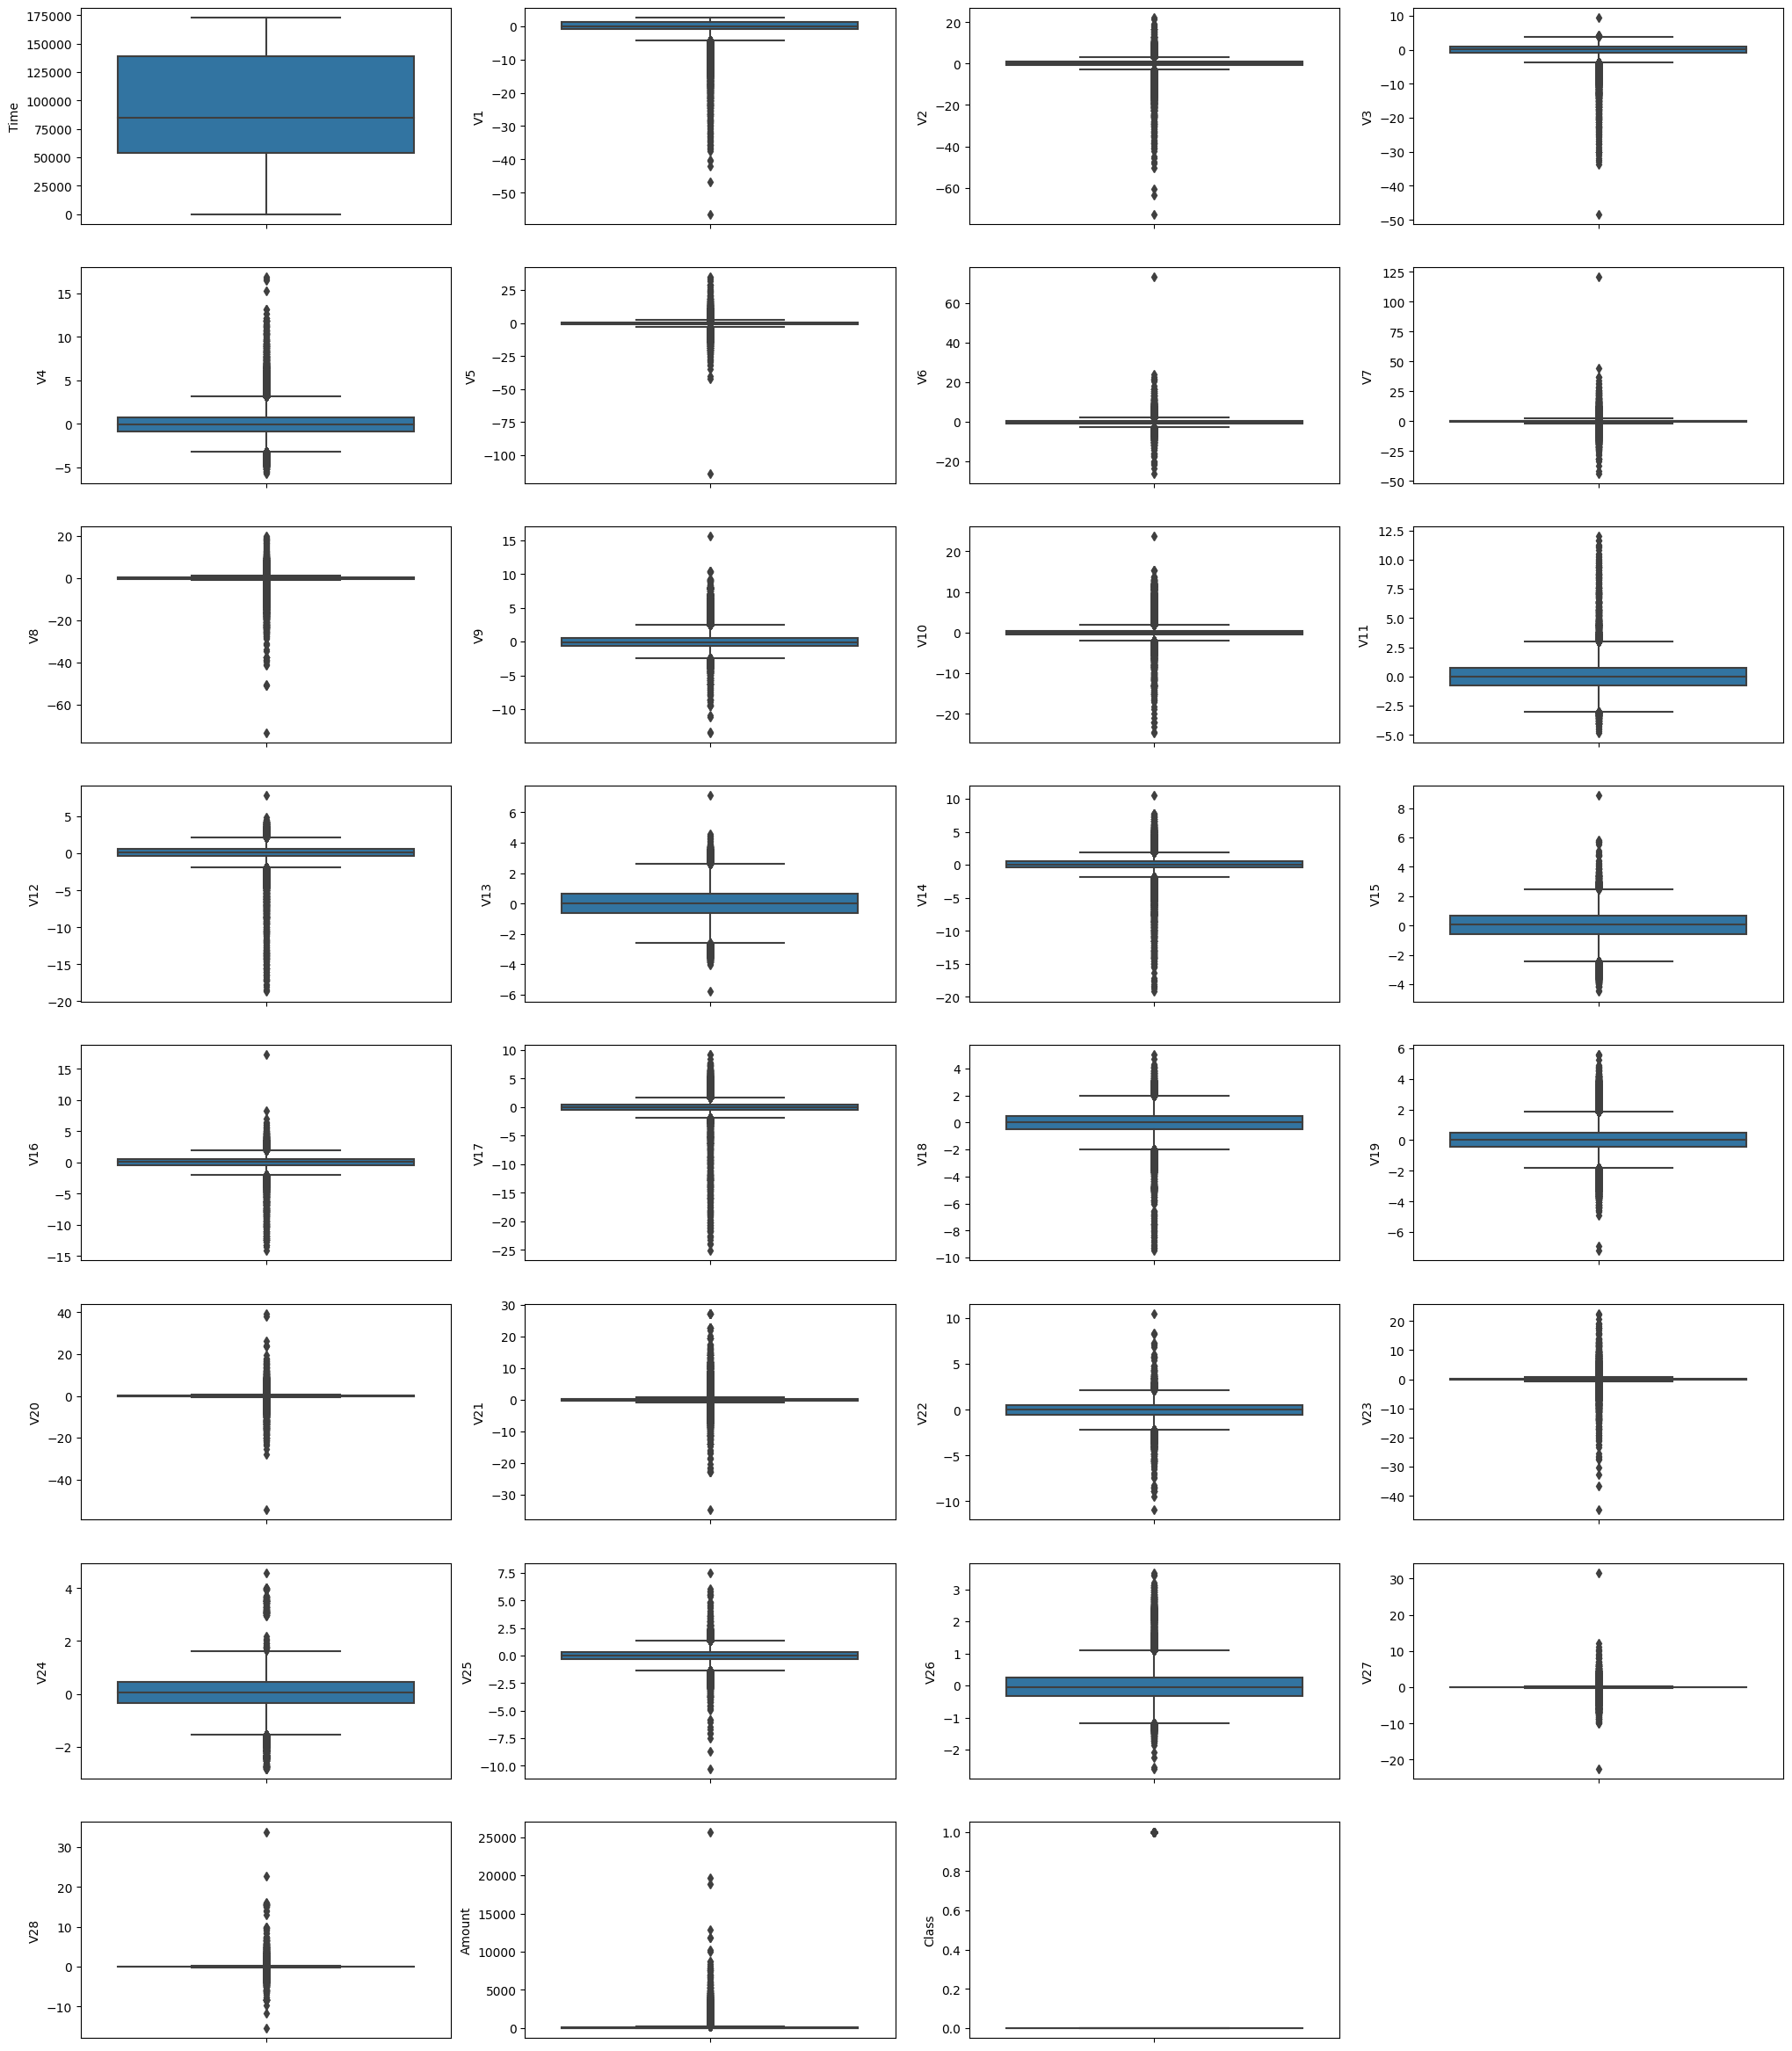

In [16]:
# Boxplots are plotted for all the columns to check for outliers

cols = df.columns
plt.figure(figsize=(25,30))
for i in range(len(cols)):
    plt.subplot(8, 4, i + 1)
    sns.boxplot(y = cols[i], data = df)
plt.show()

### INFERENCE:
- The variables __'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12', 'V13', 'V14', 'V15', 'V16', 'V19', 'V20', 'V21', 'V22', 'V23', 'V25', 'V27', 'V28' and 'Amount'__ contain outliers.
- These outliers have to be treated before model building.

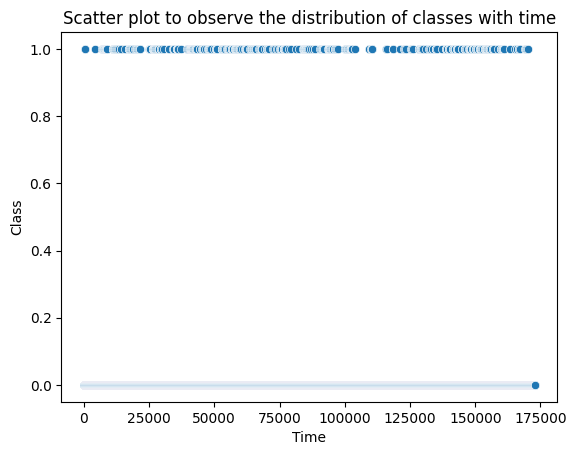

In [17]:
# Create a scatter plot to observe the distribution of classes with time

sns.scatterplot(x=df["Time"], y=df["Class"])
plt.title("Scatter plot to observe the distribution of classes with time")
plt.show()

__As we cannot infer meaningful insights through the above scatter plot, let us see the distribution of these classes separately with respect to time.__

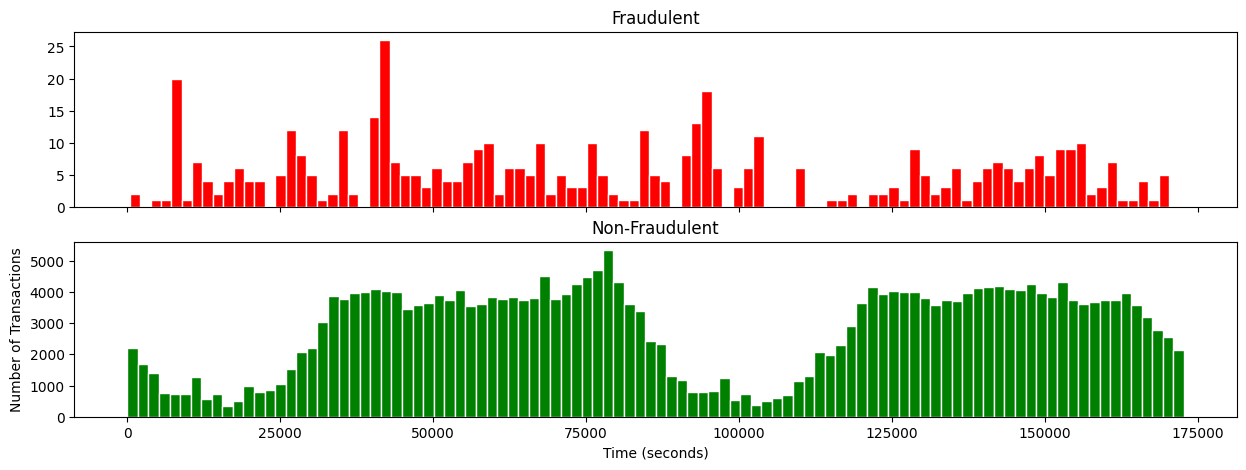

In [18]:
# Histograms to observe distribution of Fraudulent and Non-fraudulent classes with respect to time

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,5))

bins = 100

ax1.hist(df.Time[df.Class == 1], bins = bins, color = "Red", ec = "white")
ax1.set_title('Fraudulent')

ax2.hist(df.Time[df.Class == 0], bins = bins, color = "Green", ec = "white")
ax2.set_title('Non-Fraudulent')

plt.xlabel('Time (seconds)')
plt.ylabel('Number of Transactions')
plt.show()

__From the histograms, we can see that 'Time' feature has no significance in predicting whether a transaction is fraudulent or not.__

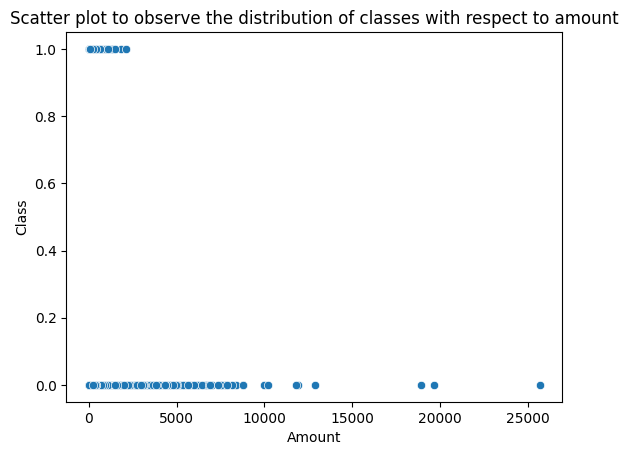

In [19]:
# Create a scatter plot to observe the distribution of classes with Amount

sns.scatterplot(x=df["Amount"], y=df["Class"])
plt.title("Scatter plot to observe the distribution of classes with respect to amount")
plt.show()

### INFERENCE: 
 __It is evident from the above scatter plot that fraudulent transactions are more likely to occur when the amount of transaction is low (say less than 5000).__

In [20]:
# Check for the maximum amount of transaction that has been labelled as "Fraudulent"

df[df['Class']==1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

__Thus, the maximum amount of transaction that has been labelled as 'Fraudulent' in the given dataset is 2125.87__

In [21]:
# Drop unnecessary columns
# As the variable 'Time' is of no significance, lets drop it 

df = df.drop("Time", axis = 1)

### Splitting the data into train & test data

In [22]:
y = df["Class"]
X = df.drop("Class", axis = 1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 42)

In [24]:
# Let us check the number of fraudulent records in train and test data

print("Number of records labelled as fraudulent in the given dataset: ",np.sum(y))
print("Number of records labelled as fraudulent in the train data: ",np.sum(y_train))
print("Number of records labelled as fraudulent in the test data: ",np.sum(y_test))

Number of records labelled as fraudulent in the given dataset:  492
Number of records labelled as fraudulent in the train data:  394
Number of records labelled as fraudulent in the test data:  98


In [25]:
# Standard scaling
# Variables V1 to V28 are PCA transformed and hence scaling is not required for these features.
# Let us scale the feature 'Amount' using Standard scaler

scaler = StandardScaler()

# Fit_transform on train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transform the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [26]:
# First 5 records of X_train after scaling 'Amount' feature

X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
223361  1.955041 -0.380783 -0.315013  0.330155 -0.509374 -0.086197 -0.627978   
165061 -0.400975 -0.626943  1.555339 -2.017772 -0.107769  0.168310  0.017959   
238186  0.072509  0.820566 -0.561351 -0.709897  1.080399 -0.359429  0.787858   
150562 -0.535045  1.014587  1.750679  2.769390  0.500089  1.002270  0.847902   
138452 -4.026938  1.897371 -0.429786 -0.029571 -0.855751 -0.480406 -0.435632   

              V8        V9       V10  ...       V20       V21       V22  \
223361  0.035994  1.054560 -0.030441  ... -0.125390  0.238197  0.968305   
165061 -0.401619  0.040378  0.611115  ... -0.470372 -0.153485  0.421703   
238186  0.117276 -0.131275 -0.638222  ...  0.012227 -0.314638 -0.872959   
150562 -0.081323  0.371579  0.560595  ... -0.253757  0.063525  0.443431   
138452  1.313760  0.536044  1.221746  ... -0.012320 -0.480691 -0.230369   

             V23       V24       V25       V26       V27       V28    Amount  
223361  0.053208 -0.278602 -0.044999 -0.216780  0.045168 -0.047145 -0.307889  
165061  0.113442 -1.004095 -1.176695  0.361924 -0.370469 -0.144792 -0.167026  
238186  0.083391  0.148178 -0.431459  0.119690  0.206395  0.070288 -0.300043  
150562 -0.072754  0.448192 -0.655203 -0.181038 -0.093013 -0.064931  0.113600  
138452  0.250717  0.066399  0.470787  0.245335  0.286904 -0.322672 -0.246029  

[5 rows x 29 columns]

In [27]:
# First 5 records of X_test after scaling 'Amount' feature

X_test.head()

V1        V2         V3        V4         V5        V6  \
43428  -16.526507  8.584972 -18.649853  9.505594 -13.793819 -2.832404   
49906    0.339812 -2.743745  -0.134070 -1.385729  -1.451413  1.015887   
29474    1.399590 -0.590701   0.168619 -1.029950  -0.539806  0.040444   
276481  -0.432071  1.647895  -1.669361 -0.349504   0.785785 -0.630647   
278846   2.014160 -0.137394  -1.015839  0.327269  -0.182179 -0.956571   

               V7        V8        V9        V10  ...       V20       V21  \
43428  -16.701694  7.517344 -8.507059 -14.110184  ... -1.514923  1.190739   
49906   -0.524379  0.224060  0.899746  -0.565012  ...  0.506044 -0.213436   
29474   -0.712567  0.002299 -0.971747   0.756801  ...  0.212877  0.102398   
276481   0.276990  0.586025 -0.484715  -1.376648  ... -0.244633  0.358932   
278846   0.043241 -0.160746  0.363241   0.259452  ... -0.255293 -0.238644   

             V22       V23       V24       V25       V26       V27       V28  \
43428  -1.127670 -2.358579  0.673461 -1.413700 -0.462762 -2.018575 -1.042804   
49906  -0.942525 -0.526819 -1.156992  0.311211 -0.746647  0.040996  0.102038   
29474   0.168269 -0.166639 -0.810250  0.505083 -0.232340  0.011409  0.004634   
276481  0.873663 -0.178642 -0.017171 -0.207392 -0.157756 -0.237386  0.001934   
278846 -0.616400  0.347045  0.061561 -0.360196  0.174730 -0.078043 -0.070571   

          Amount  
43428   1.081514  
49906   1.693173  
29474  -0.225474  
276481 -0.341192  
278846 -0.343585  

[5 rows x 29 columns]

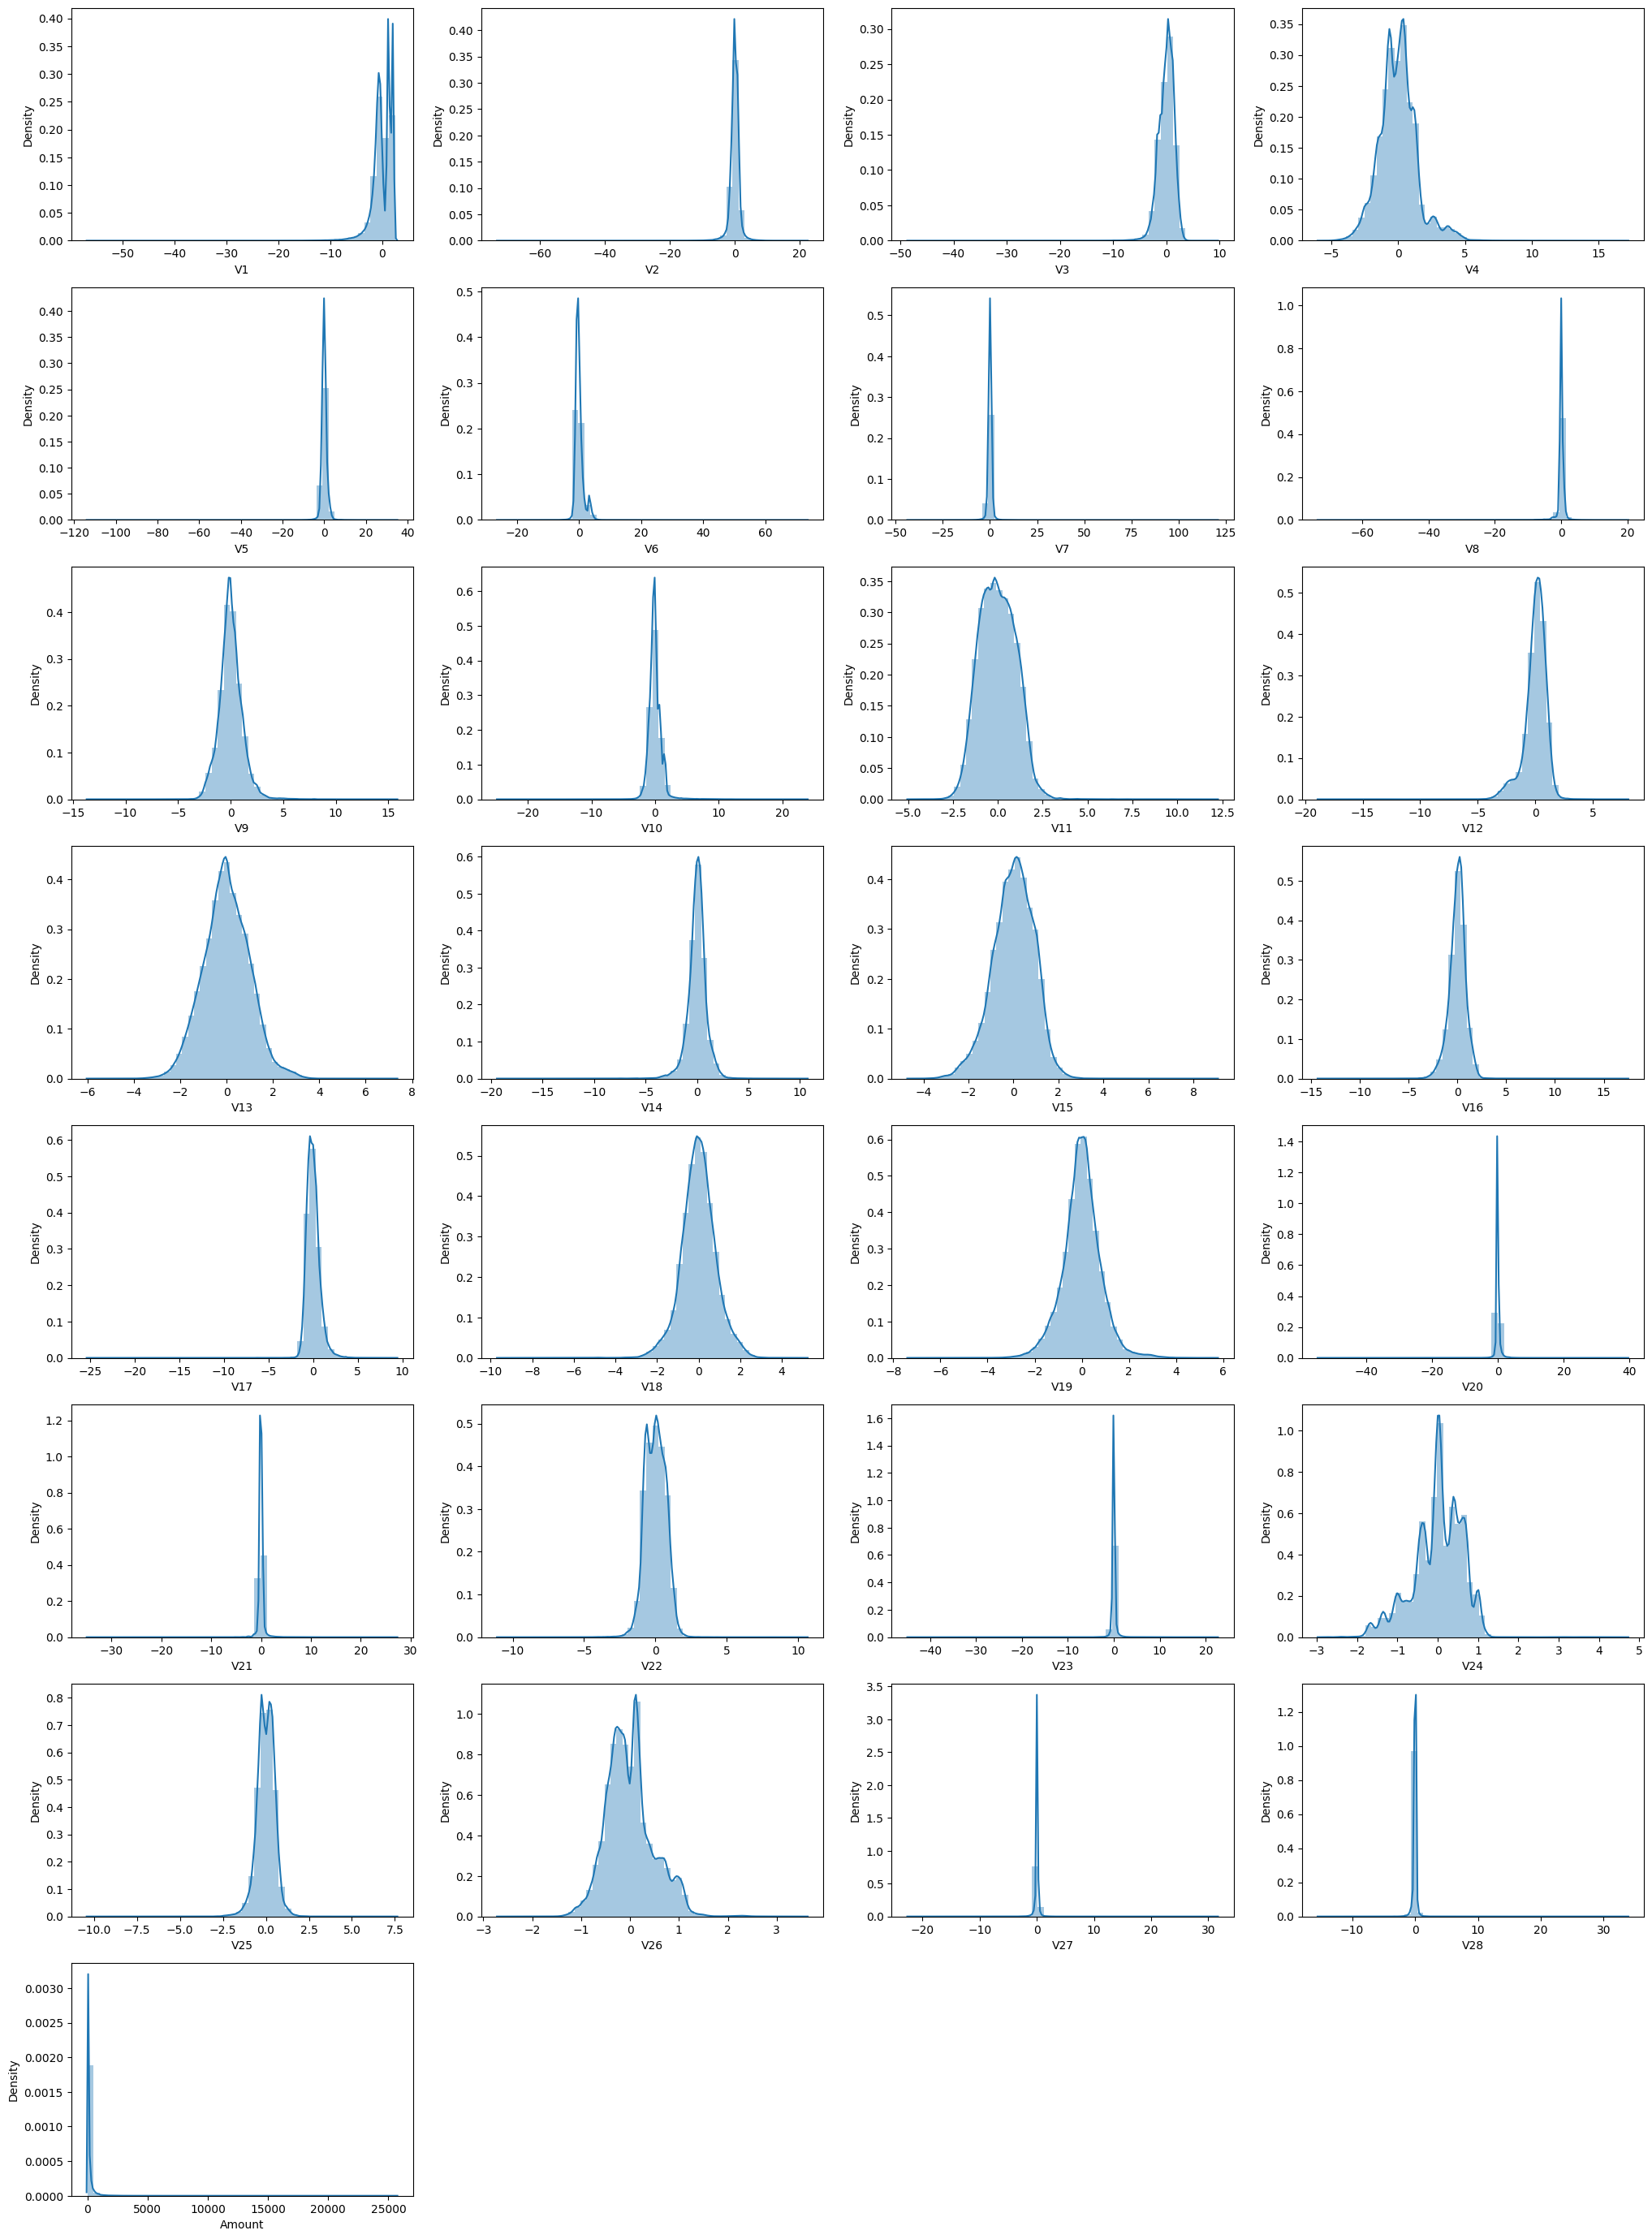

In [28]:
# Plotting distplot for all numerical variables

plt.figure(figsize=(25,35))
j=0
for i in X.columns:
    plt.subplot(8, 4, j + 1)
    sns.distplot(X[i])
    j=j+1
    
plt.show()

### INFERENCE:
- As we can see most of the variables follow Gaussian distribution (because of the PCA transformation).
- Except the 'Time' feature all other variables are normally distributed.
- Some variables are skewed towards right or left due to the presence of outliers.

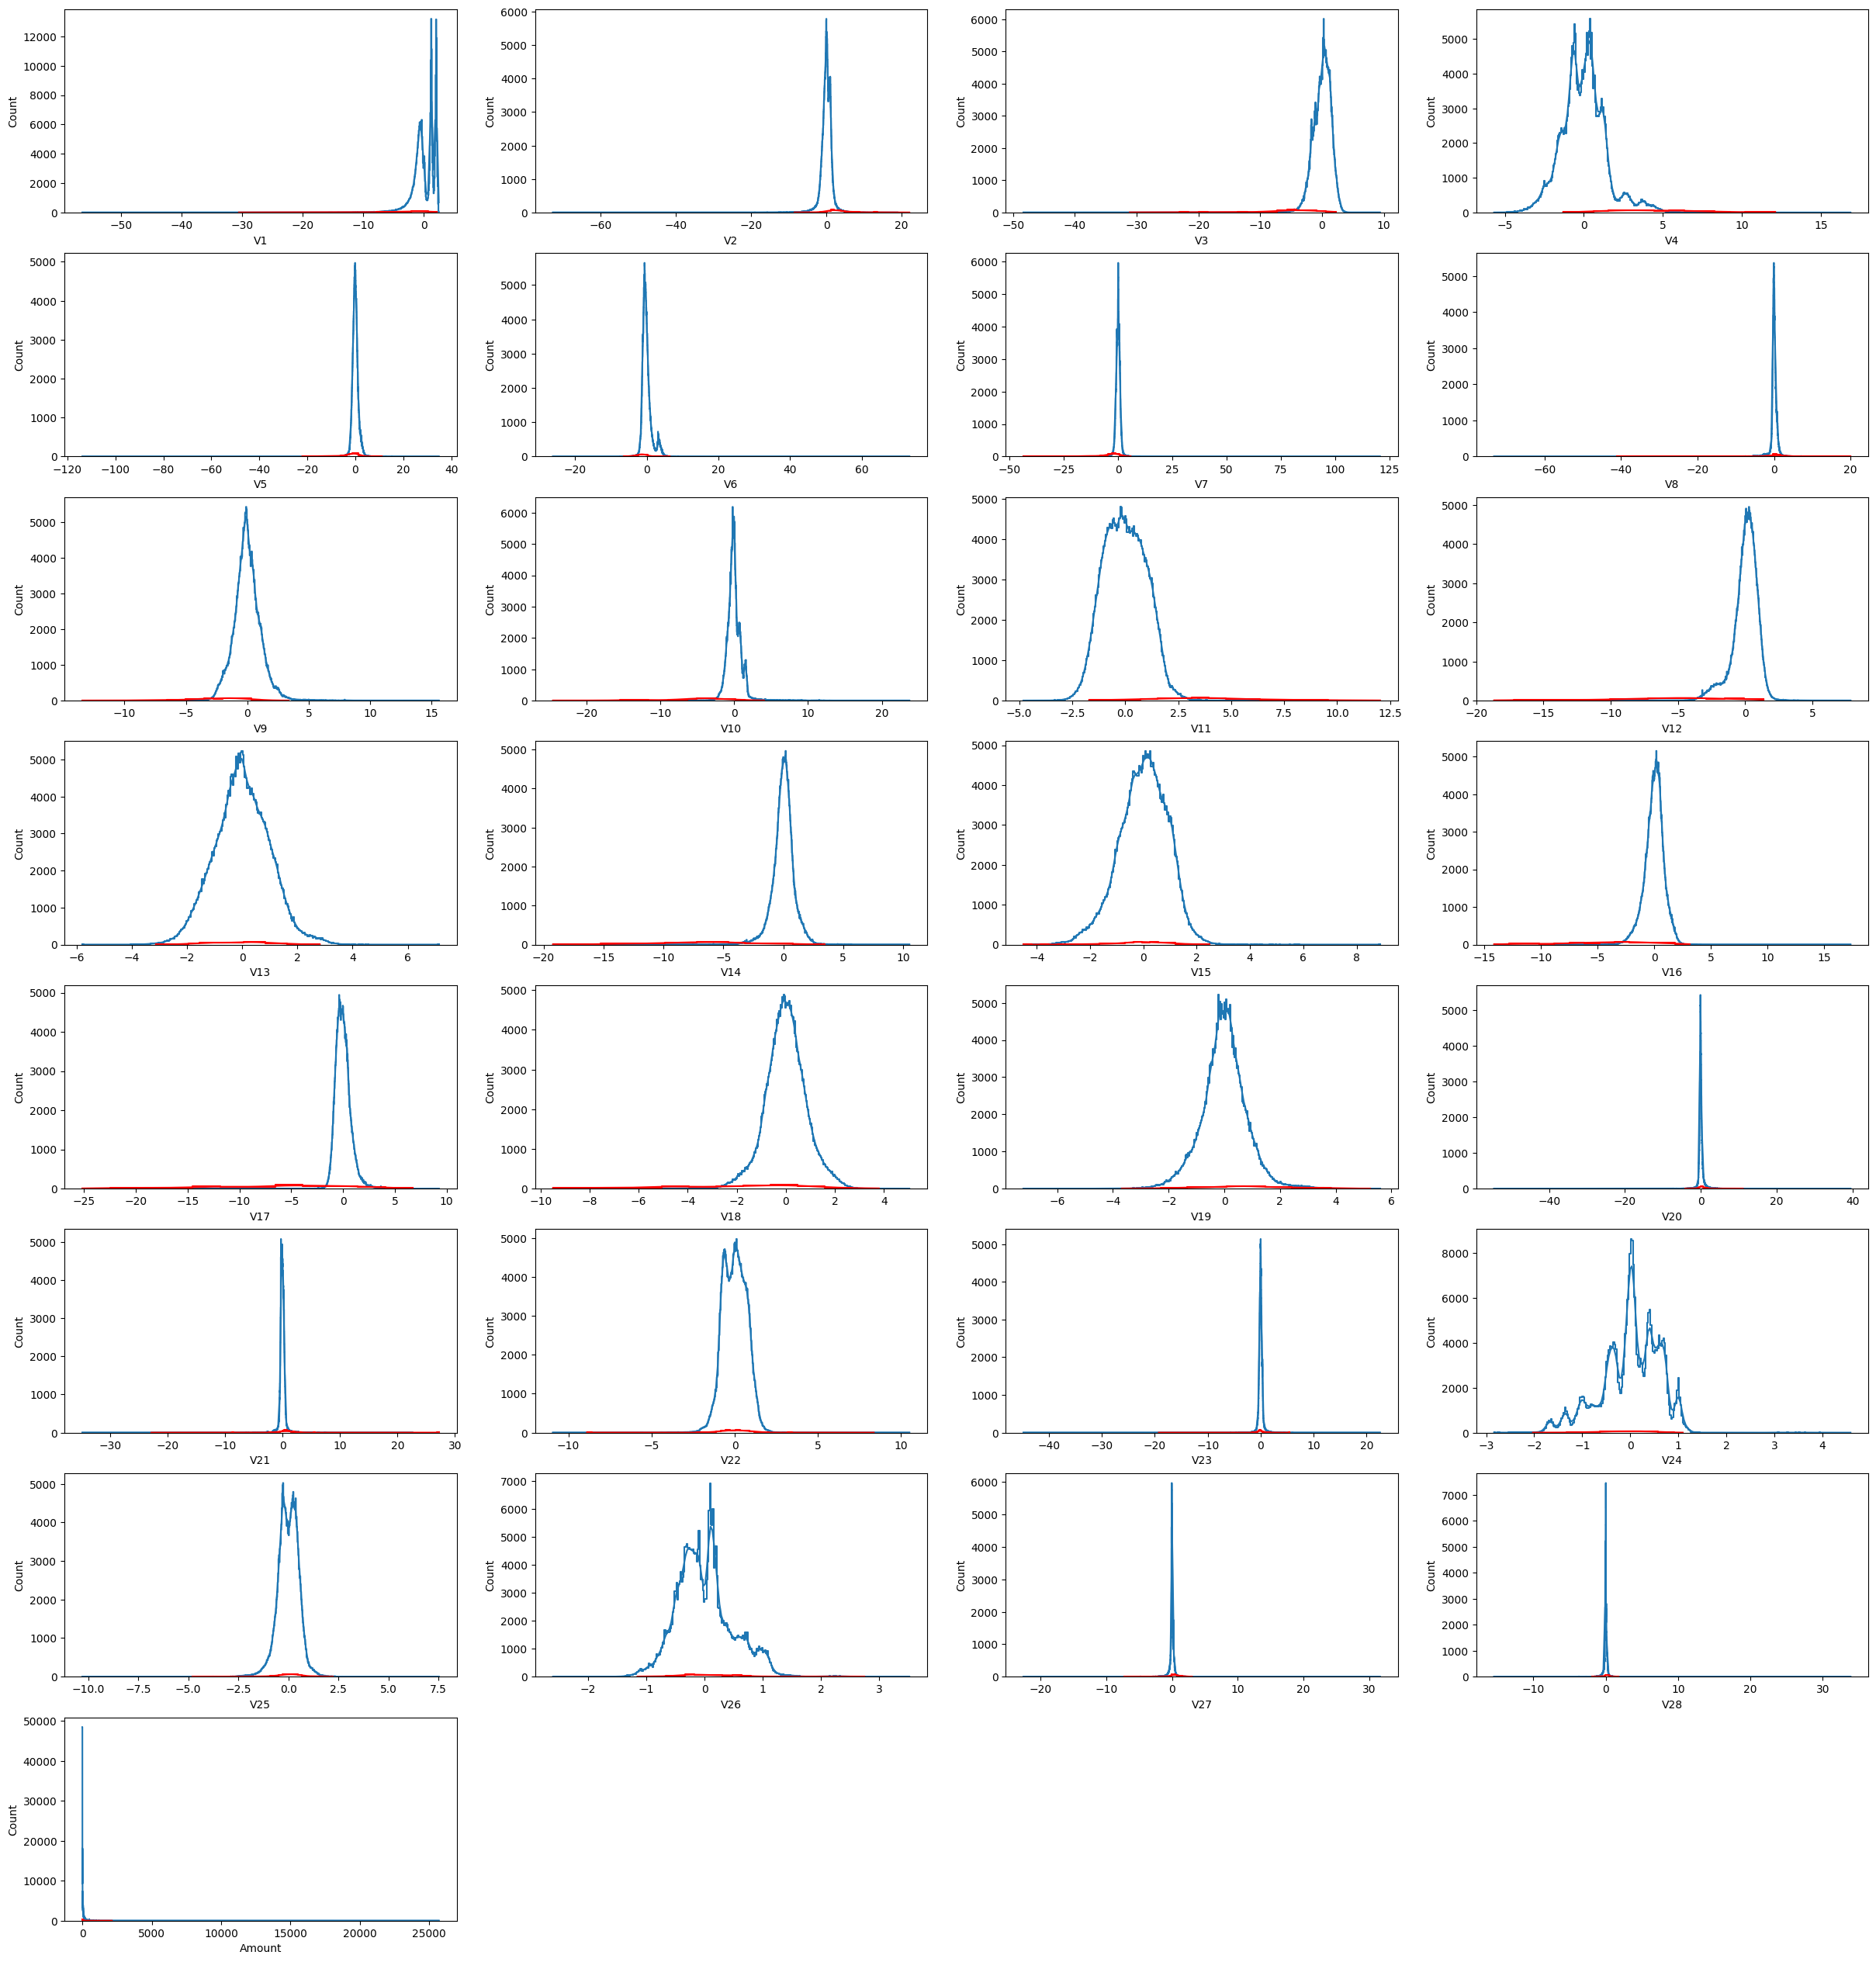

In [29]:
# Plot the histogram of all the variables from the dataset to see the skewness

cols = X.columns

i = 0
f0 = X.loc[df['Class'] == 0]
f1 = X.loc[df['Class'] == 1]

plt.figure(figsize=(30,32))

for f in cols:
    i += 1
    plt.subplot(8,4,i)
    sns.histplot(data= f0, x= f0[f], kde= True, element= "step", fill= False)
    sns.histplot(data= f1, x= f1[f], kde= True, color= "Red", element= "step", fill= False)
    plt.xlabel(f)

plt.show()

### INFERENCE:
- From the histplots of all numerical variables, it is evident that the class distribution is highly imbalanced (only very few records for fraudulent cases). Also, most of the variables are skewed.
- From the histplot of the variable 'Amount', we can see that most of the transactions given in the dataset involve very less amount.

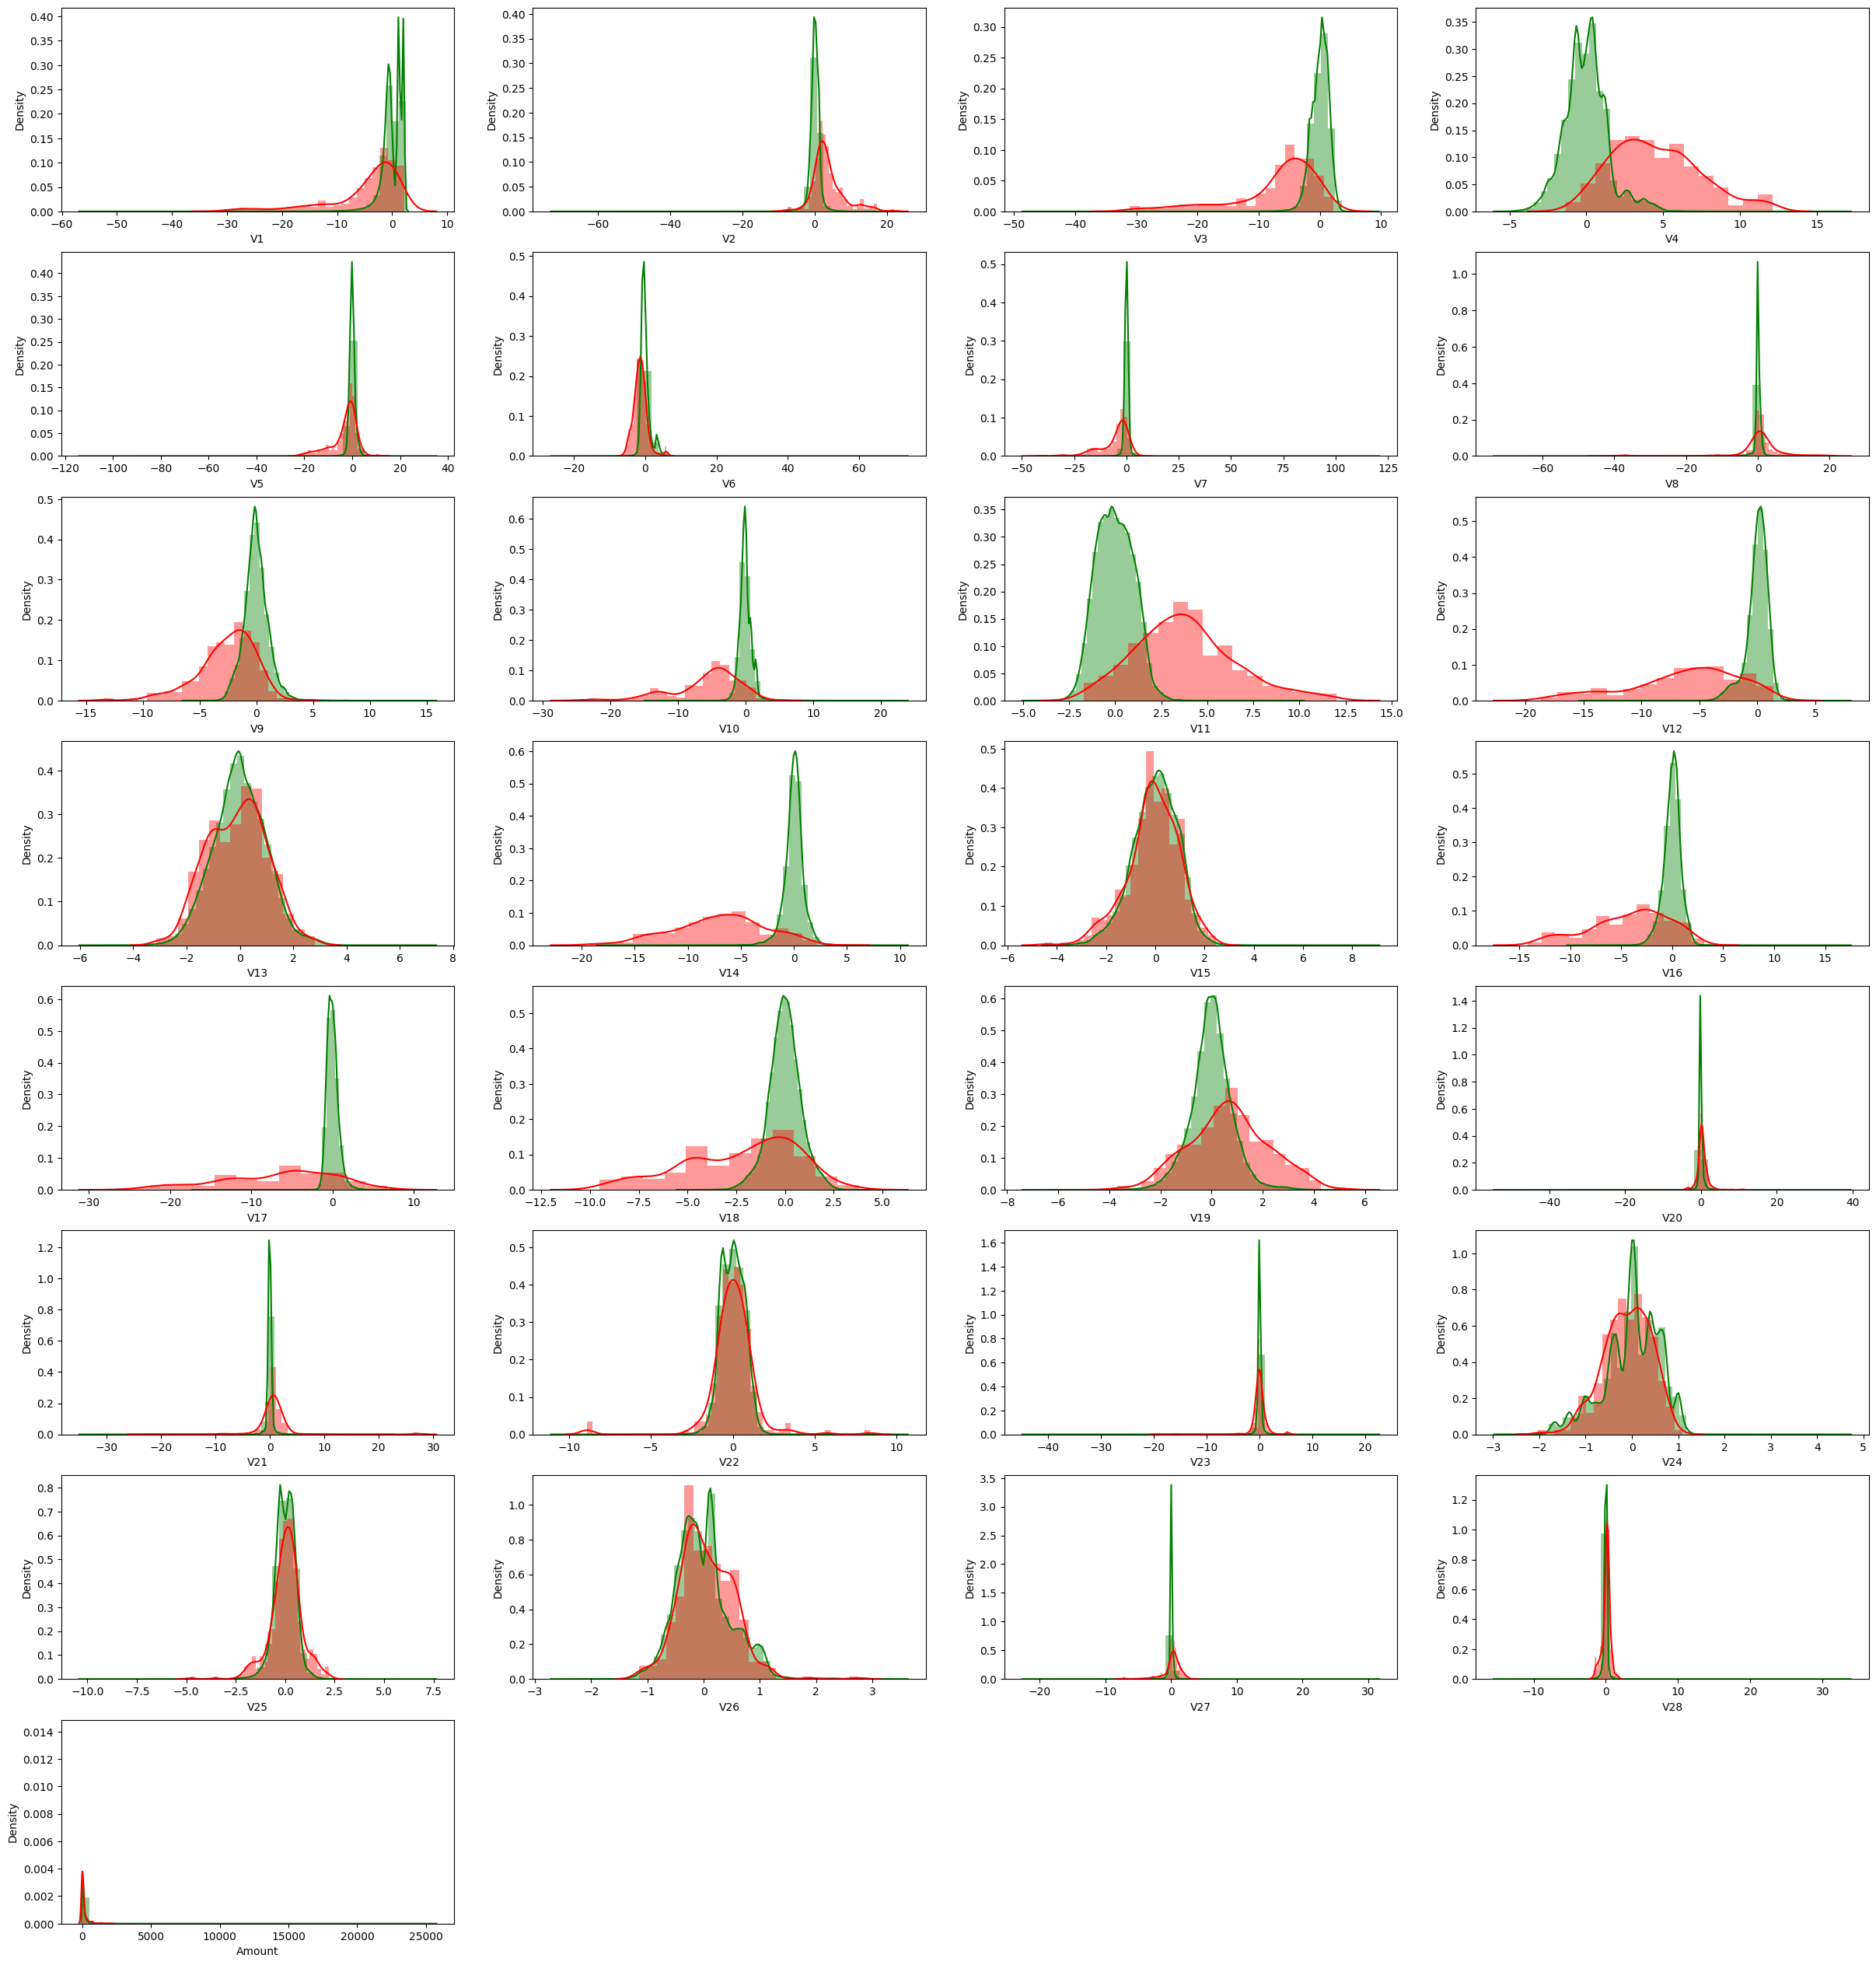

In [30]:
# Plot the distplot of each numerical variable for respective classes

cols = X.columns

i = 0
f0 = X.loc[df['Class'] == 0]
f1 = X.loc[df['Class'] == 1]

plt.figure(figsize=(30,32))

for f in cols:
    i += 1
    plt.subplot(8,4,i)
    sns.distplot(f0[f], color= "Green")
    sns.distplot(f1[f], color= "Red")
    plt.xlabel(f)
    
plt.show()

### INFERENCE:
- For most of the variables, the distplot overlaps for both fraudulent and non-fraudulent transactions.
- Most of the variables show skewness either towards left or right. This also implies the presence of outliers in the given dataset which has to be treated before model building.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [31]:
'''
Let us check for the amount of skewness present in each variable

Distribution of skewness values is as below:

- If skewness = 0, the distribution is normal.
- If skewness > 0 or positive, more weight is on the left side of the distribution.
- If skewness < 0 or negative, more weight is on the right side of the distribution.

'''

features = X_train.columns
skewness_of_var = []
for i in features:
    skewness_of_var.append(X_train[i].skew())

skew_df = pd.concat([pd.DataFrame(features, columns=["Feature Name"]), pd.DataFrame(skewness_of_var, columns=["Skewness"])], axis=1)
skew_df.sort_values(by=["Skewness"], ascending= False)

Feature Name   Skewness
28       Amount  18.352356
27          V28  11.776522
6            V7   3.744620
20          V21   3.656863
5            V6   1.977725
9           V10   1.212102
3            V4   0.677776
25          V26   0.579265
8            V9   0.543603
10          V11   0.359527
18          V19   0.107289
12          V13   0.067612
26          V27  -0.038330
21          V22  -0.230008
17          V18  -0.266115
14          V15  -0.308053
24          V25  -0.417168
23          V24  -0.552668
15          V16  -1.113875
19          V20  -1.977859
13          V14  -1.992812
2            V3  -2.219375
11          V12  -2.281334
4            V5  -2.928646
0            V1  -3.320269
16          V17  -3.975821
1            V2  -4.826847
22          V23  -6.285467
7            V8  -8.445014

In [32]:
'''
Let us filter out features that are not in the range of tolerable skewness.

- If skewness < -1.0, it shows severe left skewness.
- If skewness > +1.0, it shows severe right skewness.
- If skewness is between -0.5 and -1.0, it shows moderate left skewness.
- If skewness is between +0.5 and +1.0, it shows moderate right skewness.
- If skewness is between -0.5 and +0.5, it shows approximately symmetric distribution.

Let us take the range of tolerable skewness as: [-1,1]

'''

skewed_var_list = skew_df["Feature Name"].loc[(skew_df["Skewness"] > 1) | (skew_df["Skewness"] < -1)].values
skewed_var_list

array(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14',
       'V16', 'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'], dtype=object)

__Above features are more skewed and hence let us apply PowerTransformer on these features.__

In [33]:
# Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(method='yeo-johnson', copy=False)

# Fit and transform the train data using PowerTransformer
X_train[skewed_var_list] = pt.fit_transform(X_train[skewed_var_list])

# Apply transform on the test data
X_test[skewed_var_list] = pt.transform(X_test[skewed_var_list])

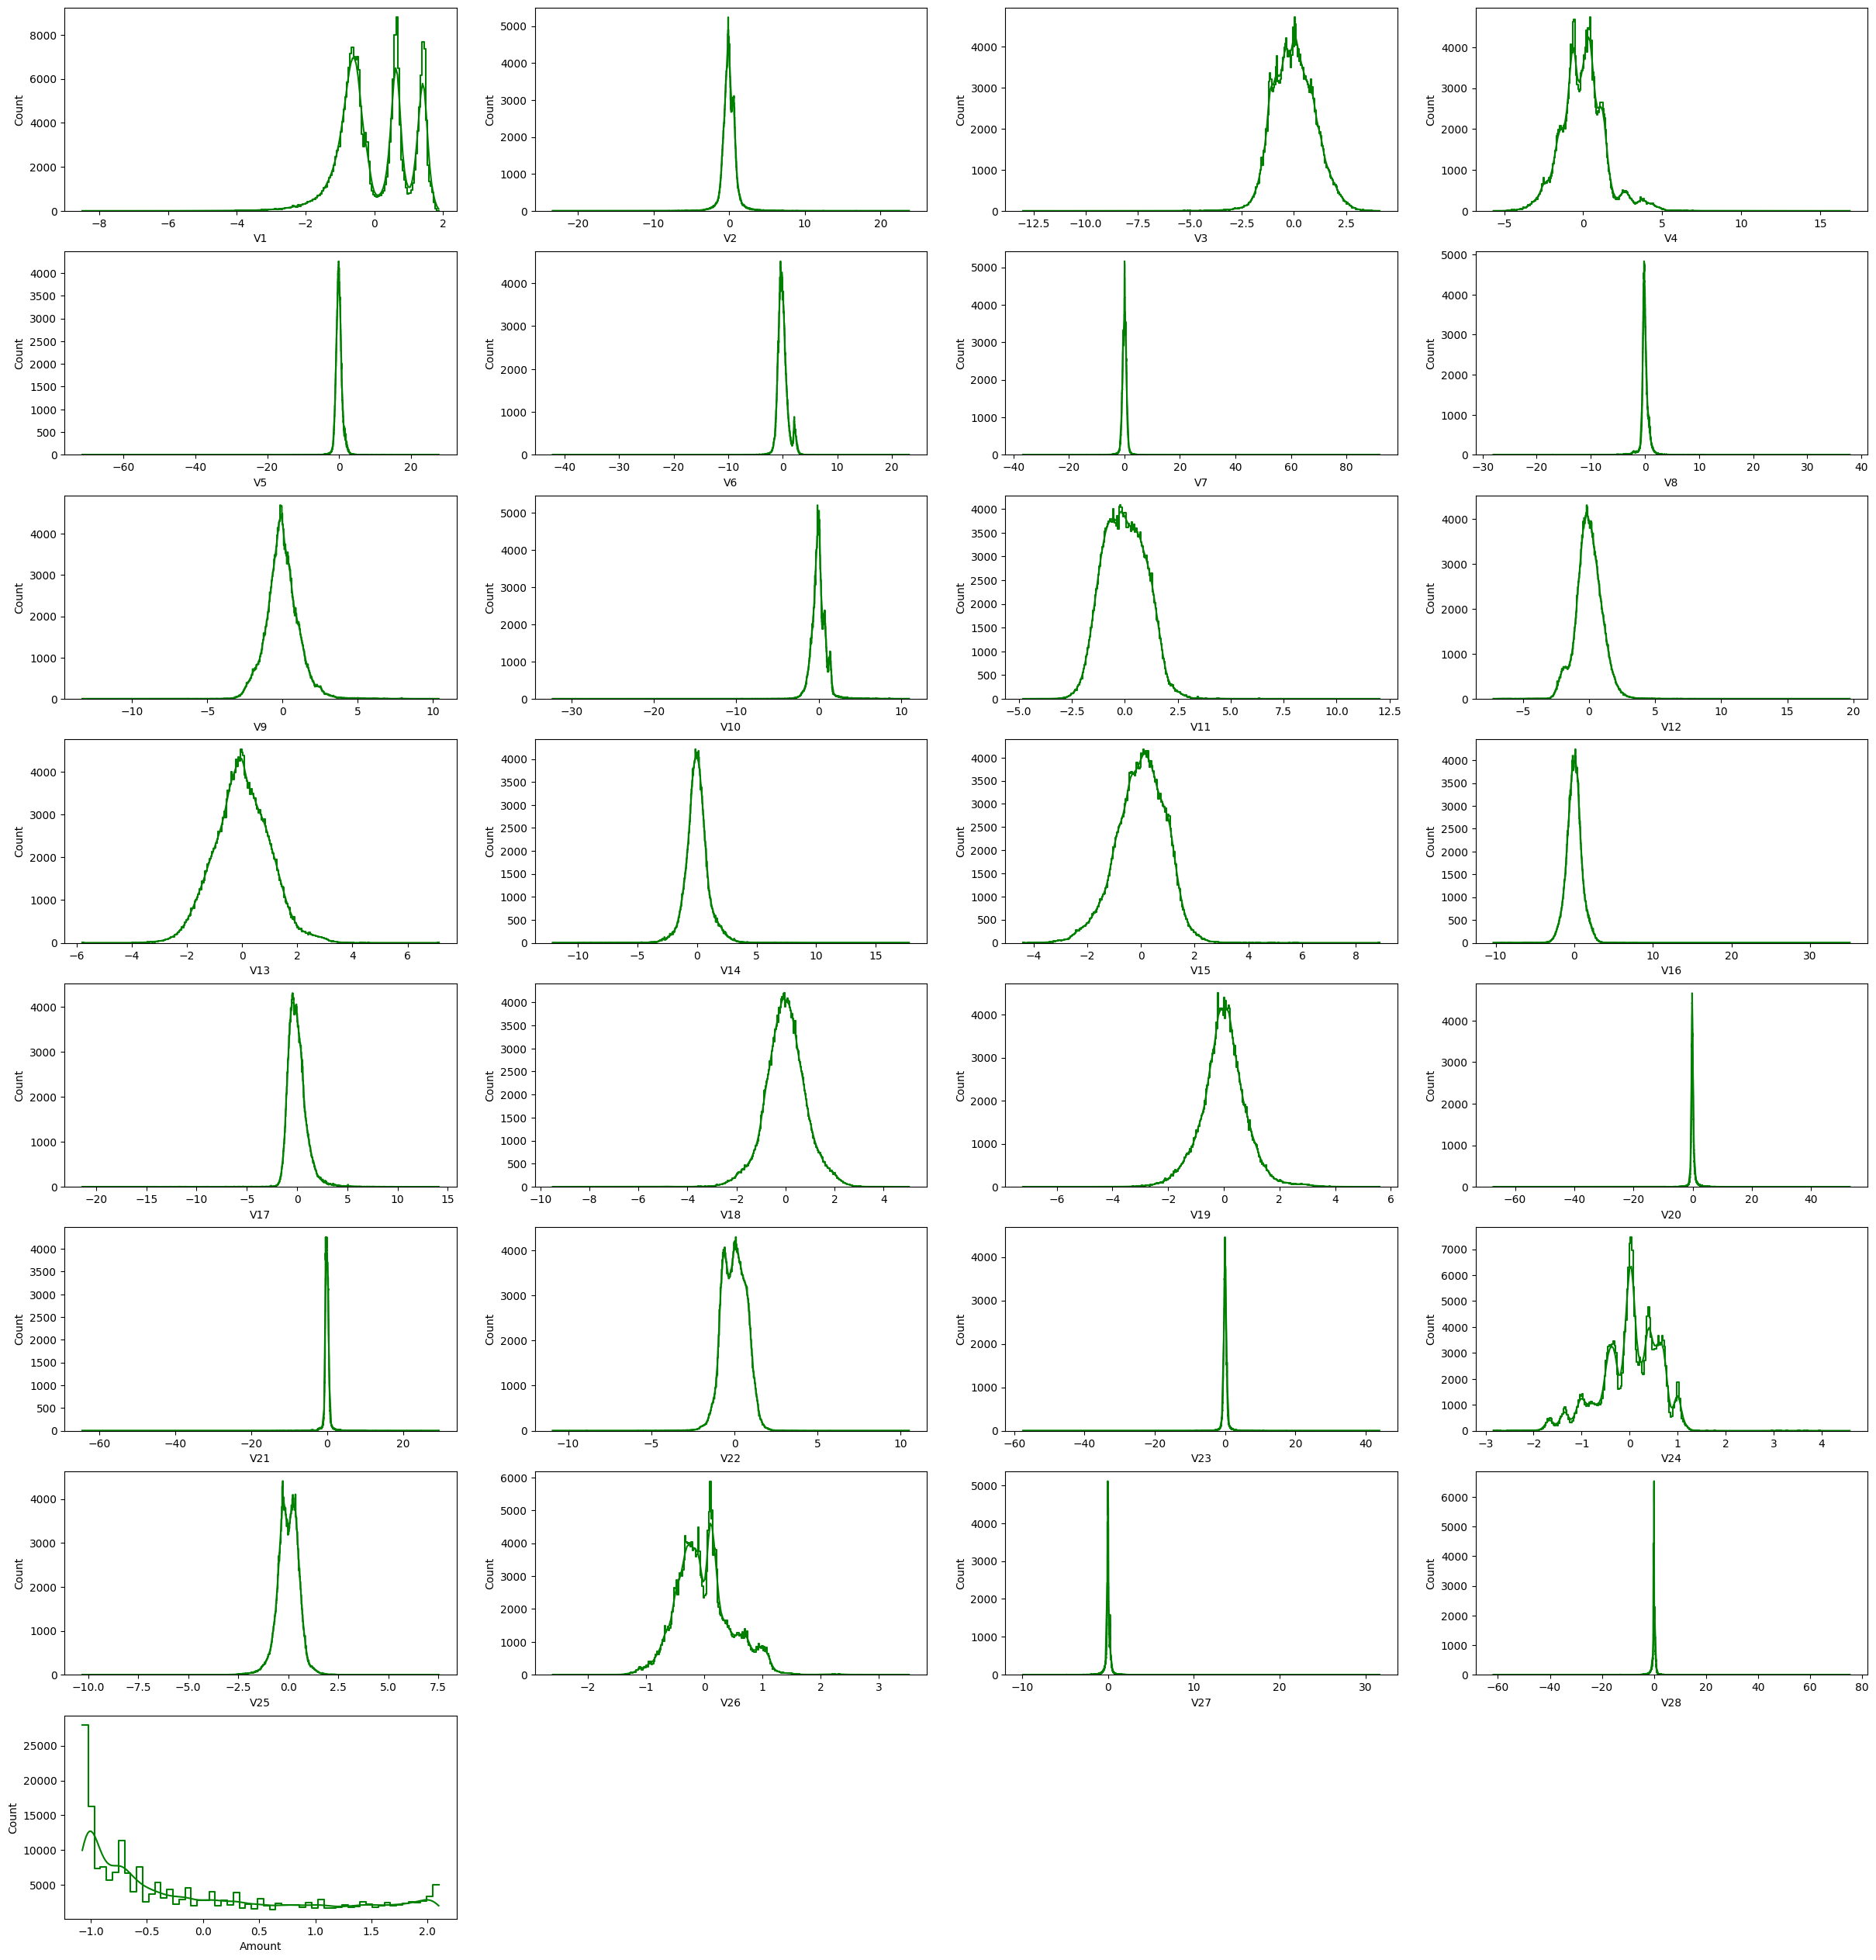

In [34]:
# Plot the histplot of a variable from the dataset again to see the result 

cols = X_train.columns

i = 0

plt.figure(figsize=(30,32))

for f in cols:
    i += 1
    plt.subplot(8,4,i)
    sns.histplot(data= X_train, x= X_train[f], kde= True, color= "Green", element= "step", fill= False)
    plt.xlabel(f)

plt.show()

### INFERENCE: 
__Skewness of variables is handled to some extent using power transformers.__

## 4. MODEL BUILDING (on imbalanced data)

- __Metric used to evaluate the model performance for this problem is: ROC-AUC score__
- __Since the data is highly imbalanced, we use this metric for evaluation.__

In [35]:
# Function to display ROC-AUC score, F1 score and Classification Report

def evaluation_metrics(y_true, y_pred):
    
    roc = round(roc_auc_score(y_true, y_pred)*100,2)
    f1 = round(f1_score(y_true, y_pred)*100,2)
    recall = round(recall_score(y_true, y_pred)*100,2)
    print("ROC-AUC Score: ", roc)
    print("\nF1 Score: ", f1) 
    print("\nRecall Score: ", recall) 
    print("\nClassification Report: \n", classification_report(y_true, y_pred))
    
    return roc,f1,recall

In [36]:
# Function to select best cut-off value for classification

def best_cut_off(y_train, y_train_proba, cutoff_prob):
    
    y_train_proba_df = pd.DataFrame(y_train_proba)
    y_train_df = pd.DataFrame(y_train)

    # Removing index for both dataframes to append them side by side 
    y_train_prediction = y_train_proba_df.reset_index()

    y_train_df = y_train_df.reset_index()

    # Concatenate y_train_proba_df,y_train_df
    y_train_final_df = pd.concat([y_train_proba_df,y_train_df],axis=1)

    # Renaming the column 
    y_train_final_df = y_train_final_df.rename(columns={ 0 : 'y_train_probability'})

    # Rearranging the columns
    y_train_final_df = y_train_final_df.reindex(['Class','y_train_probability'], axis=1)

    for i in cutoff_prob:
        y_train_final_df[i]= y_train_final_df.y_train_probability.map(lambda x: 1 if x > i else 0)

    # Dataframe for cut off values  
    cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity', 'ROC_AUC', 'F1 Score'])

    for i in cutoff_prob:
        cm1 = metrics.confusion_matrix(y_train_final_df.Class, y_train_final_df[i])
        roc_auc = roc_auc_score(y_train_final_df.Class, y_train_final_df[i])
        f1 = f1_score(y_train_final_df.Class, y_train_final_df[i])
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1    
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[i,accuracy,sensi,speci,roc_auc,f1]
      
    print(cutoff_df)

    # Plot the 'Probability','Accuracy','Sensitivity','Specificity' to get optimum cut off value
    plt.rcParams['figure.figsize'] = [6, 5]
    ax = cutoff_df.plot.line(x='Probability', y=['Sensitivity','Specificity','ROC_AUC','Accuracy','F1 Score'])
    ax.set_xticks(cutoff_prob)
    ax.set_yticks([float(x)/10 for x in range(11)])
    plt.xticks(rotation=90)
    plt.show() 

In [37]:
# Function to draw ROC curve

def draw_roc( actual, probs ):

    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [38]:
def get_best_cut_off(model_name, X_train, y_train, cutoff_prob):

    # Fitting the model on train dataset
    model_name.fit(X_train, y_train)

    # Get the y_train_probability
    y_train_proba = model_name.predict_proba(X_train)[:,1]

    # Find the best cut off value
    best_cut_off(y_train,y_train_proba,cutoff_prob)


In [39]:
def evaluate_model(model_name, cut_off, X_train, y_train, X_test, y_test):

    # Model evaluation on the train set
    y_train_proba = model_name.predict_proba(X_train)[:,1]

    # Map the predicted values based on probability
    y_train_pred = pd.Series(y_train_proba).map( lambda x: 1 if x > cut_off else 0)

    # F1 score, ROC-AUC score and classification report for train data
    print("\nEvaluation metrics for train data:\n")
    roc_train, f1_train, recall_train = evaluation_metrics(y_train,y_train_pred)

    # ROC curve for train data
    print("\nROC curve for train data:\n")
    draw_roc(y_train, y_train_proba)

    # Model evaluation on the test set
    y_test_proba = model_name.predict_proba(X_test)[:,1]

    # Map the predicted values based on probability
    y_test_pred = pd.Series(y_test_proba).map( lambda x: 1 if x > cut_off else 0)

    # F1 score, ROC-AUC score and classification report for train data
    print("\nEvaluation metrics for test data:\n")
    roc_test, f1_test, recall_test = evaluation_metrics(y_test,y_test_pred)

    # ROC curve for test data
    print("\nROC curve for test data:\n")
    draw_roc(y_test, y_test_proba)
    
    return roc_train, f1_train, recall_train, roc_test, f1_test, recall_test


In [40]:
def logistic_regression_HT_tuning(X_train, y_train):

    # Logistic regression
    lr_model = LogisticRegression()

    # Logistic Regression parameters
    lr_params = {"solver" : ['newton-cg','lbfgs','sag','saga','liblinear'],
                 "C" : [100, 10, 1.0, 0.1, 0.01],
                 "penalty": ['l2']
                }

    # Logistic Regression with Stratified K-fold cross vaidation
    lr_folds = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

    lr_grid_search = GridSearchCV(estimator=lr_model, 
                                  param_grid=lr_params, 
                                  n_jobs=-1, 
                                  cv=lr_folds, 
                                  scoring='roc_auc', 
                                  verbose = 1, 
                                  return_train_score=True)

    # Fit on X_train and y_train
    lr_grid_result = lr_grid_search.fit(X_train, y_train)

    # Print the evaluation result by choosing roc-auc score as the evaluation metric
    print('Best ROC-AUC score: ', lr_grid_result.best_score_)

    # Print the best hyperparameter values
    print('Best Hyperparameters: ', lr_grid_result.best_params_)

    return lr_grid_result


In [41]:
def decision_tree_HT_tuning(X_train, y_train):
  
    # DecisionTree Classifier
    dt_model = DecisionTreeClassifier()

    # Decision tree parameter grid
    dt_params = {'max_depth':[5,10,15],
                 'min_samples_leaf':[25,50],
                 'min_samples_split':[10,25,50],
                 'criterion':['gini','entropy']
                 }

    # Decision Tree with Stratified K-fold cross vaidation
    dt_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    dt_grid_search = GridSearchCV(estimator=dt_model, 
                                  param_grid=dt_params, 
                                  n_jobs=-1, 
                                  cv=dt_folds, 
                                  scoring='roc_auc', 
                                  verbose = 1, 
                                  return_train_score=True)

    # Fit on X_train and y_train
    dt_grid_result = dt_grid_search.fit(X_train, y_train)


    # Print the evaluation result by choosing roc-auc score as the evaluation metric
    print('Best ROC-AUC score: ', dt_grid_result.best_score_)

    # Print the best hyperparameter values
    print('Best Hyperparameters: ', dt_grid_result.best_params_)

    return dt_grid_result


In [42]:
def random_forest_HT_tuning(X_train, y_train):
  
    # RandomForest Classifier
    rf_model = RandomForestClassifier()

    # Random forest parameter grid
    rf_params = {'n_estimators': [200, 400],
                 'max_depth': [50, 75, 100],
                 'min_samples_leaf': [5, 10]
                 }

    # Random forest with Stratified K-fold cross vaidation
    rf_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    rf_grid_search = GridSearchCV(estimator=rf_model, 
                                  param_grid=rf_params, 
                                  n_jobs=-1, 
                                  cv=rf_folds, 
                                  scoring='roc_auc', 
                                  verbose = 1, 
                                  return_train_score=True)

    # Fit on X_train and y_train
    rf_grid_result = rf_grid_search.fit(X_train, y_train)


    # Print the evaluation result by choosing roc-auc score as the evaluation metric
    print('Best ROC-AUC score: ', rf_grid_result.best_score_)

    # Print the best hyperparameter values
    print('Best Hyperparameters: ', rf_grid_result.best_params_)

    return rf_grid_result

In [43]:
def xgboost_HT_tuning(X_train, y_train):

    # XGBClassifier
    xgboost_model = XGBClassifier(objective = 'binary:logistic')

    # XGBoost parameter grid
    xgboost_params = {'n_estimators' : [200, 400], 
                      'learning_rate' : [0.1, 0.05], 
                      'subsample': [0.5, 0.7], 
                      'gamma': [0.5,  1.0],
                      'reg_lambda': [0.1, 0.01, 0.02]
                      }

    # XG boost with Stratified K-fold cross vaidation
    xgb_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    xgb_grid_search = GridSearchCV(estimator=xgboost_model, 
                                  param_grid=xgboost_params, 
                                  n_jobs=-1, 
                                  cv=xgb_folds, 
                                  scoring='roc_auc', 
                                  verbose = 1, 
                                  return_train_score=True)
    # Fit on X_train and y_train
    xgb_grid_result = xgb_grid_search.fit(X_train, y_train)


    # Print the evaluation result by choosing roc-auc score as the evaluation metric
    print('Best ROC-AUC score: ', xgb_grid_result.best_score_)

    # Print the best hyperparameter values
    print('Best Hyperparameters: ', xgb_grid_result.best_params_)

    return xgb_grid_result


In [44]:
def knn_HT_tuning(X_train, y_train):

    # KNeighborsClassifier
    knn_model = KNeighborsClassifier()

    # KNeighborsClassifier parameter grid
    knn_params = {'n_neighbors': [5, 10],
                  'leaf_size': [10, 20],
                  'p': [1, 2]
                  }

    # KNeighborsClassifier with Stratified K-fold cross vaidation
    knn_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    knn_grid_search = GridSearchCV(estimator=knn_model, 
                                   param_grid=knn_params, 
                                   n_jobs=-1, 
                                   cv=knn_folds, 
                                   scoring='roc_auc', 
                                   verbose = 1, 
                                   return_train_score=True)
    # Fit on X_train and y_train
    knn_grid_result = knn_grid_search.fit(X_train, y_train)


    # Print the evaluation result by choosing roc-auc score as the evaluation metric
    print('Best ROC-AUC score: ', knn_grid_result.best_score_)

    # Print the best hyperparameter values
    print('Best Hyperparameters: ', knn_grid_result.best_params_)

    return knn_grid_result

In [45]:
def svm_HT_tuning(X_train, y_train):

    # SVM model
    svm_model = SVC(probability= True)

    # SVM parameter grid
    svm_params = {'C': [1, 10], 
                  'gamma': [0.01, 0.001, 0.0001],
                  'kernel': ['linear']
                  }

    # SVM with Stratified K-fold cross vaidation
    svm_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    svm_grid_search = GridSearchCV(estimator=svm_model, 
                                   param_grid=svm_params, 
                                   n_jobs=-1, 
                                   cv=svm_folds, 
                                   scoring='roc_auc', 
                                   verbose = 1, 
                                   return_train_score=True)
    # Fit on X_train and y_train
    svm_grid_result = svm_grid_search.fit(X_train, y_train)


    # Print the evaluation result by choosing roc-auc score as the evaluation metric
    print('Best ROC-AUC score: ', svm_grid_result.best_score_)

    # Print the best hyperparameter values
    print('Best Hyperparameters: ', svm_grid_result.best_params_)

    return svm_grid_result

### a. LOGISTIC REGRESSION (with imbalanced data)

In [54]:
# Hyper parameter tuning for Logistic regression model(with imbalanced data) to get the best hyper parameters and ROC-AUC score

lr_grid_result = logistic_regression_HT_tuning(X_train, y_train)

Fitting 7 folds for each of 25 candidates, totalling 175 fits
Best ROC-AUC score:  0.9815330532675031
Best Hyperparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}


In [46]:
# Build a logistic regression model (for imbalanced data) with the best hyper parameters

lr_final = LogisticRegression(C= 0.01, penalty= 'l2', solver= 'saga')

     Probability  Accuracy  Sensitivity  Specificity   ROC_AUC  F1 Score
0.0          0.0  0.001729     1.000000     0.000000  0.500000  0.003453
0.1          0.1  0.999324     0.804569     0.999661  0.902115  0.804569
0.2          0.2  0.999390     0.748731     0.999824  0.874278  0.809328
0.3          0.3  0.999285     0.677665     0.999842  0.838753  0.766141
0.4          0.4  0.999241     0.644670     0.999855  0.822262  0.745962
0.5          0.5  0.999206     0.609137     0.999881  0.804509  0.726172
0.6          0.6  0.999162     0.583756     0.999881  0.791819  0.706605
0.7          0.7  0.999118     0.558376     0.999881  0.779128  0.686427
0.8          0.8  0.999034     0.510152     0.999881  0.755017  0.646302
0.9          0.9  0.998947     0.456853     0.999886  0.728369  0.600000


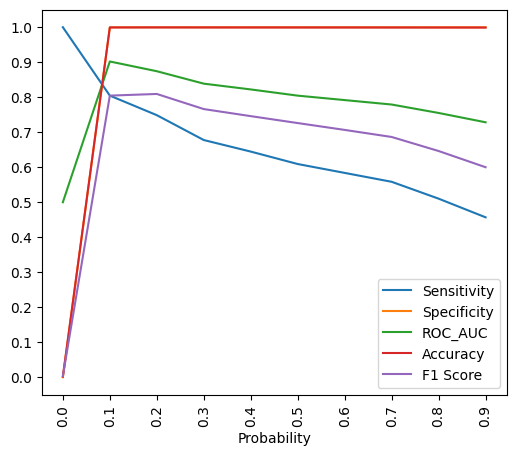

In [47]:
# Get the best cut off from the plot

cutoff_prob = [float(x)/10 for x in range(10)]

get_best_cut_off(lr_final, X_train, y_train, cutoff_prob)

- __From the plot, it is evident that the optimal cut-off lies somewhere between 0.0 and 0.1 for logistic regression model (with imbalanced data).__
- __Now lets find out the best cut-off value precisely.__ 

      Probability  Accuracy  Sensitivity  Specificity   ROC_AUC  F1 Score
0.00         0.00  0.001729     1.000000     0.000000  0.500000  0.003453
0.01         0.01  0.996489     0.865482     0.996716  0.931099  0.460189
0.02         0.02  0.998718     0.832487     0.999006  0.915747  0.691983
0.03         0.03  0.999065     0.827411     0.999363  0.913387  0.753757
0.04         0.04  0.999214     0.819797     0.999525  0.909661  0.783030
0.05         0.05  0.999254     0.819797     0.999565  0.909681  0.791667
0.06         0.06  0.999276     0.817259     0.999591  0.908425  0.796044
0.07         0.07  0.999289     0.812183     0.999613  0.905898  0.798005
0.08         0.08  0.999298     0.809645     0.999626  0.904635  0.799499
0.09         0.09  0.999315     0.807107     0.999648  0.903377  0.803030
0.10         0.10  0.999324     0.804569     0.999661  0.902115  0.804569


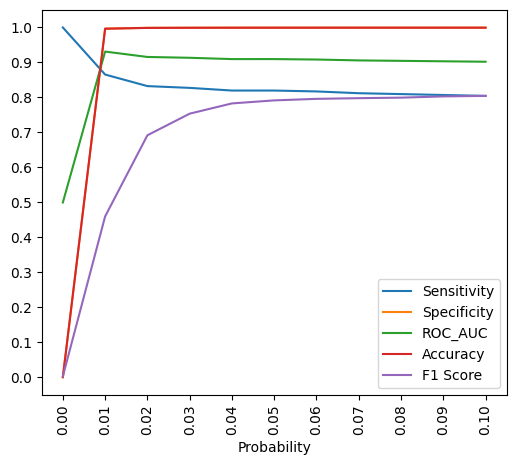

In [48]:
# Get the best cut off precisely

cutoff_prob_precisely = [float(x)/100 for x in range(11)]

get_best_cut_off(lr_final, X_train, y_train, cutoff_prob_precisely)

__Lets take optimal cut-off as 0.10__


Evaluation metrics for train data:

ROC-AUC Score:  90.21

F1 Score:  80.46

Recall Score:  80.46

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.80      0.80      0.80       394

    accuracy                           1.00    227845
   macro avg       0.90      0.90      0.90    227845
weighted avg       1.00      1.00      1.00    227845


ROC curve for train data:



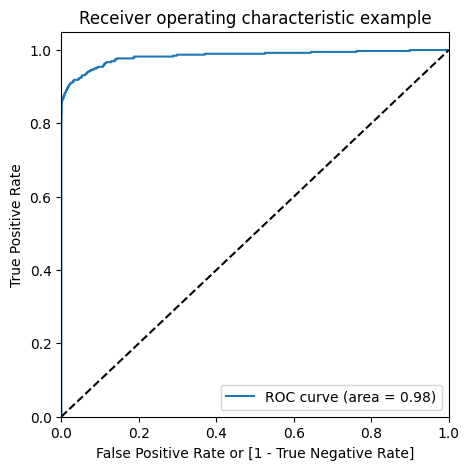


Evaluation metrics for test data:

ROC-AUC Score:  88.25

F1 Score:  78.53

Recall Score:  76.53

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.77      0.79        98

    accuracy                           1.00     56962
   macro avg       0.90      0.88      0.89     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



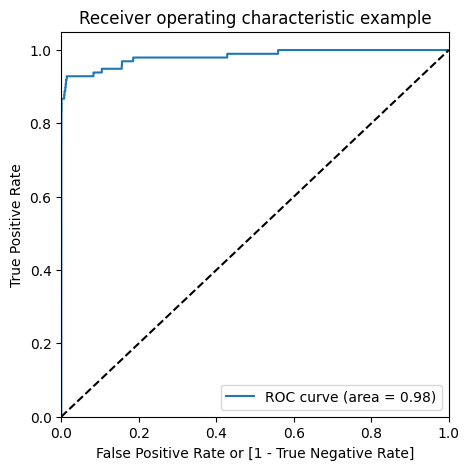

In [49]:
# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(lr_final, 0.10, X_train, 
                                                                                   y_train, X_test, y_test)

In [50]:
model_scores = pd.DataFrame({'Model Name':['Logistic Regression (imbalanced data)'],
                             'ROC_AUC score':[roc_train],
                             'F1 score':[f1_train],
                             'Recall score':[recall_train]
                            })

### b. DECISION TREE (with imbalanced data)

In [75]:
# Hyper parameter tuning for Decision tree model(with imbalanced data) to get the best hyper parameters and ROC-AUC score

dt_grid_result = decision_tree_HT_tuning(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best ROC-AUC score:  0.9601475945143451
Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [51]:
# Build a decision tree model (for imbalanced data) with the best hyper parameters

dt_final = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 50, min_samples_split= 50)

     Probability  Accuracy  Sensitivity  Specificity   ROC_AUC  F1 Score
0.0          0.0  0.002361     1.000000     0.000633  0.500317  0.003455
0.1          0.1  0.999214     0.832487     0.999503  0.915995  0.785629
0.2          0.2  0.999372     0.814721     0.999692  0.907207  0.817834
0.3          0.3  0.999372     0.814721     0.999692  0.907207  0.817834
0.4          0.4  0.999372     0.814721     0.999692  0.907207  0.817834
0.5          0.5  0.999372     0.814721     0.999692  0.907207  0.817834
0.6          0.6  0.999350     0.715736     0.999842  0.857789  0.792135
0.7          0.7  0.999271     0.629442     0.999912  0.814677  0.749245
0.8          0.8  0.999100     0.489848     0.999982  0.744915  0.653130
0.9          0.9  0.999100     0.489848     0.999982  0.744915  0.653130


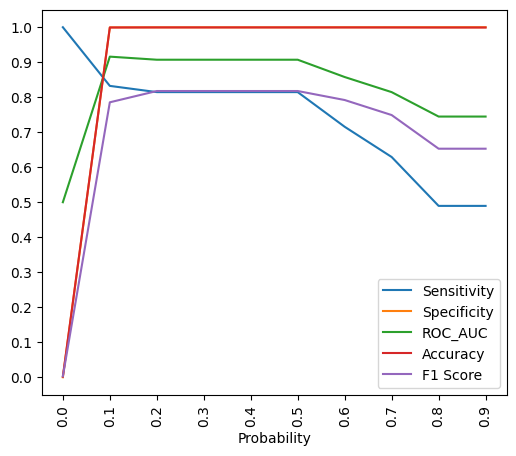

In [52]:
# Get the best cut off from the plot

cutoff_prob = [float(x)/10 for x in range(10)]

get_best_cut_off(dt_final, X_train, y_train, cutoff_prob)

- __From the plot, it is evident that the optimal cut-off lies somewhere between 0.0 and 0.2 for decision tree model (with imbalanced data).__
- __Now lets find out the best cut-off value precisely.__ 

      Probability  Accuracy  Sensitivity  Specificity   ROC_AUC  F1 Score
0.00         0.00  0.002361     1.000000     0.000633  0.500317  0.003455
0.01         0.01  0.998139     0.865482     0.998369  0.931926  0.616637
0.02         0.02  0.998139     0.865482     0.998369  0.931926  0.616637
0.03         0.03  0.998139     0.865482     0.998369  0.931926  0.616637
0.04         0.04  0.998139     0.865482     0.998369  0.931926  0.616637
0.05         0.05  0.999021     0.840102     0.999297  0.919699  0.748023
0.06         0.06  0.999214     0.832487     0.999503  0.915995  0.785629
0.07         0.07  0.999214     0.832487     0.999503  0.915995  0.785629
0.08         0.08  0.999214     0.832487     0.999503  0.915995  0.785629
0.09         0.09  0.999214     0.832487     0.999503  0.915995  0.785629
0.10         0.10  0.999214     0.832487     0.999503  0.915995  0.785629
0.11         0.11  0.999214     0.832487     0.999503  0.915995  0.785629
0.12         0.12  0.999214     0.8324

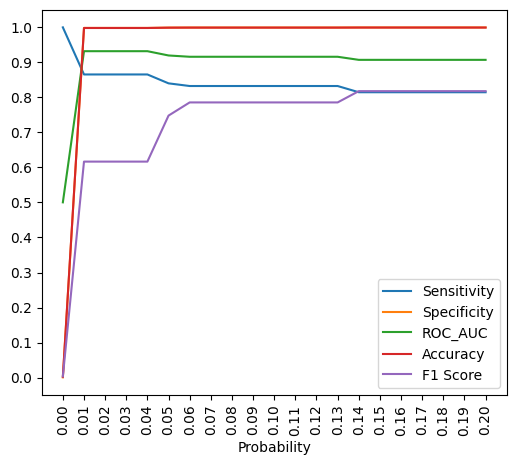

In [53]:
# Get the best cut off precisely

cutoff_prob_precisely = [float(x)/100 for x in range(21)]

get_best_cut_off(dt_final, X_train, y_train, cutoff_prob_precisely)

__Lets take optimal cut-off as 0.14__


Evaluation metrics for train data:

ROC-AUC Score:  90.72

F1 Score:  81.78

Recall Score:  81.47

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.82      0.81      0.82       394

    accuracy                           1.00    227845
   macro avg       0.91      0.91      0.91    227845
weighted avg       1.00      1.00      1.00    227845


ROC curve for train data:



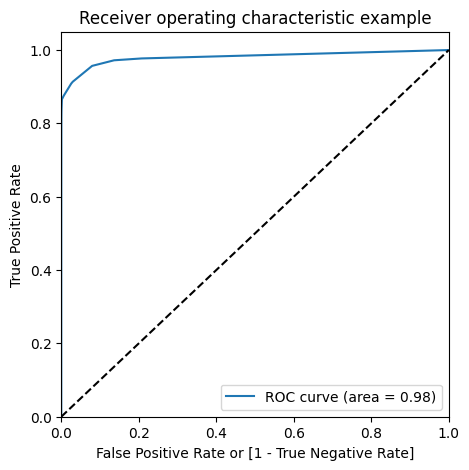


Evaluation metrics for test data:

ROC-AUC Score:  91.31

F1 Score:  81.41

Recall Score:  82.65

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.83      0.81        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



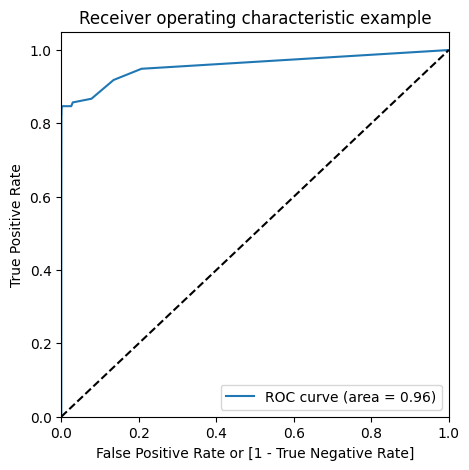

In [54]:
# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(dt_final, 0.14, X_train, y_train, 
                                                                                   X_test, y_test)

In [55]:
model_scores = model_scores.append({'Model Name':'Decision Tree (imbalanced data)',
                                    'ROC_AUC score':roc_train,
                                    'F1 score':f1_train,
                                    'Recall score':recall_train}, ignore_index = True)

### c. RANDOM FOREST (with imbalanced data)

In [79]:
# Hyper parameter tuning for Random forest model(with imbalanced data) to get the best hyper parameters and ROC-AUC score

rf_grid_result = random_forest_HT_tuning(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best ROC-AUC score:  0.9680037531995018
Best Hyperparameters:  {'max_depth': 50, 'min_samples_leaf': 10, 'n_estimators': 200}


In [56]:
# Build a random forest model (for imbalanced data) with the best hyper parameters

rf_final = RandomForestClassifier(max_depth= 50, min_samples_leaf= 10, n_estimators= 200)

     Probability  Accuracy  Sensitivity  Specificity   ROC_AUC  F1 Score
0.0          0.0  0.822972     1.000000     0.822665  0.911333  0.019162
0.1          0.1  0.999241     0.880711     0.999446  0.940078  0.800461
0.2          0.2  0.999443     0.842640     0.999714  0.921177  0.839444
0.3          0.3  0.999495     0.835025     0.999780  0.917403  0.851229
0.4          0.4  0.999522     0.809645     0.999851  0.904748  0.854083
0.5          0.5  0.999557     0.789340     0.999921  0.894630  0.860304
0.6          0.6  0.999526     0.751269     0.999956  0.875613  0.845714
0.7          0.7  0.999465     0.700508     0.999982  0.850245  0.818991
0.8          0.8  0.999307     0.598985     1.000000  0.799492  0.749206
0.9          0.9  0.998951     0.393401     1.000000  0.696701  0.564663


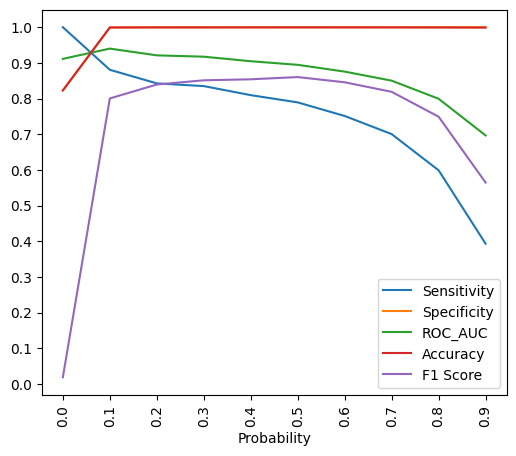

In [57]:
# Get the best cut off from the plot

cutoff_prob = [float(x)/10 for x in range(10)]

get_best_cut_off(rf_final, X_train, y_train, cutoff_prob)

- __From the plot, it is evident that the optimal cut-off lies somewhere between 0.1 and 0.3 for random forest model (with imbalanced data).__
- __Now lets find out the best cut-off value precisely.__ 

      Probability  Accuracy  Sensitivity  Specificity   ROC_AUC  F1 Score
0.10         0.10  0.999254     0.878173     0.999464  0.938818  0.802784
0.11         0.11  0.999254     0.865482     0.999486  0.932484  0.800469
0.12         0.12  0.999285     0.860406     0.999525  0.929966  0.806183
0.13         0.13  0.999320     0.855330     0.999569  0.927450  0.813028
0.14         0.14  0.999328     0.852792     0.999582  0.926187  0.814545
0.15         0.15  0.999333     0.847716     0.999596  0.923656  0.814634
0.16         0.16  0.999355     0.842640     0.999626  0.921133  0.818742
0.17         0.17  0.999381     0.842640     0.999653  0.921146  0.824845
0.18         0.18  0.999403     0.842640     0.999675  0.921157  0.830000
0.19         0.19  0.999421     0.842640     0.999692  0.921166  0.834171
0.20         0.20  0.999443     0.842640     0.999714  0.921177  0.839444
0.21         0.21  0.999460     0.840102     0.999736  0.919919  0.843312
0.22         0.22  0.999469     0.8401

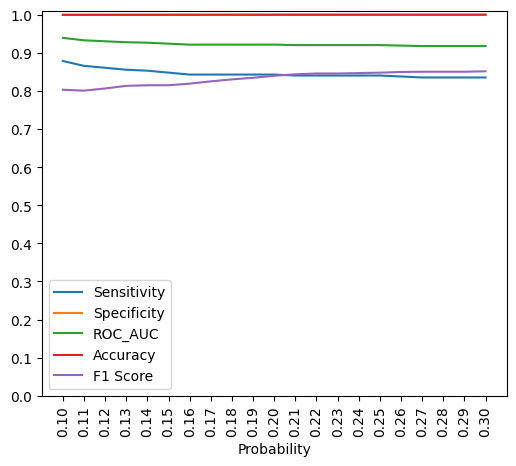

In [58]:
# Get the best cut off precisely

cutoff_prob_precisely = [float(x)/100 for x in range(10,31)]

get_best_cut_off(rf_final, X_train, y_train, cutoff_prob_precisely)

__Lets take optimal cut-off as 0.21__


Evaluation metrics for train data:

ROC-AUC Score:  91.99

F1 Score:  84.33

Recall Score:  84.01

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.85      0.84      0.84       394

    accuracy                           1.00    227845
   macro avg       0.92      0.92      0.92    227845
weighted avg       1.00      1.00      1.00    227845


ROC curve for train data:



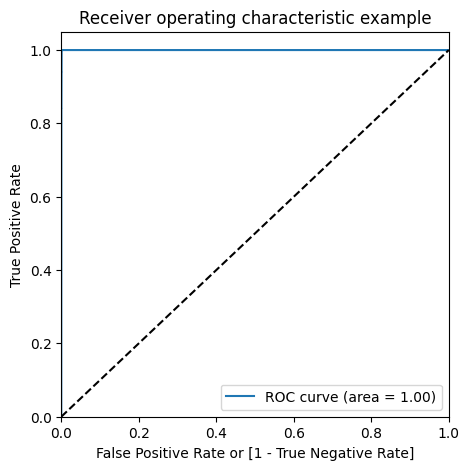


Evaluation metrics for test data:

ROC-AUC Score:  91.82

F1 Score:  81.19

Recall Score:  83.67

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.84      0.81        98

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



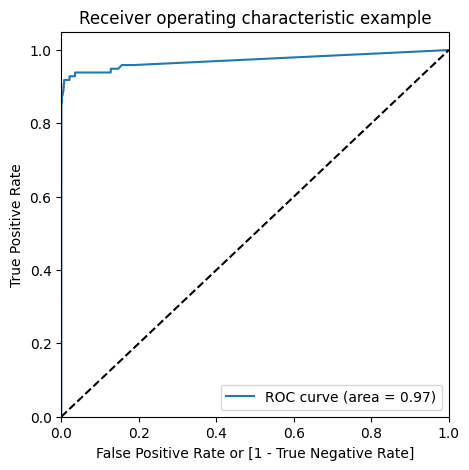

In [59]:
# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(rf_final, 0.21, X_train, y_train, 
                                                                                   X_test, y_test)

In [60]:
model_scores = model_scores.append({'Model Name':'Random Forest (imbalanced data)',
                                    'ROC_AUC score':roc_train,
                                    'F1 score':f1_train,
                                    'Recall score':recall_train}, ignore_index = True)

### d. XGBOOST CLASSIFIER (with imbalanced data)

In [226]:
# Hyper parameter tuning for XG boost model(with imbalanced data) to get the best hyper parameters and ROC-AUC score

xgb_grid_result = xgboost_HT_tuning(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best ROC-AUC score:  0.9803056706238201
Best Hyperparameters:  {'gamma': 1.0, 'learning_rate': 0.05, 'n_estimators': 400, 'reg_lambda': 0.1, 'subsample': 0.7}


In [61]:
# Build a XG boost model (for imbalanced data) with the best hyper parameters

xgb_final = XGBClassifier(objective = 'binary:logistic', gamma= 1.0, learning_rate= 0.05, n_estimators= 400, 
                          reg_lambda= 0.1, subsample= 0.7)

     Probability  Accuracy  Sensitivity  Specificity   ROC_AUC  F1 Score
0.0          0.0  0.001729     1.000000     0.000000  0.500000  0.003453
0.1          0.1  0.999969     1.000000     0.999969  0.999985  0.991195
0.2          0.2  0.999991     1.000000     0.999991  0.999996  0.997468
0.3          0.3  1.000000     1.000000     1.000000  1.000000  1.000000
0.4          0.4  1.000000     1.000000     1.000000  1.000000  1.000000
0.5          0.5  0.999996     0.997462     1.000000  0.998731  0.998729
0.6          0.6  0.999987     0.992386     1.000000  0.996193  0.996178
0.7          0.7  0.999939     0.964467     1.000000  0.982234  0.981912
0.8          0.8  0.999864     0.921320     1.000000  0.960660  0.959049
0.9          0.9  0.999741     0.850254     1.000000  0.925127  0.919067


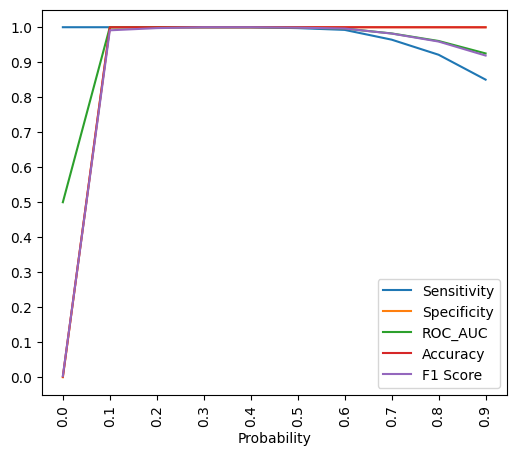

In [62]:
# Get the best cut off from the plot

cutoff_prob = [float(x)/10 for x in range(10)]

get_best_cut_off(xgb_final, X_train, y_train, cutoff_prob)

- __From the plot, it is evident that the optimal cut-off lies somewhere between 0.0 and 0.2 for XG boost model (with imbalanced data).__
- __Now lets find out the best cut-off value precisely.__ 

      Probability  Accuracy  Sensitivity  Specificity   ROC_AUC  F1 Score
0.00         0.00  0.001729          1.0     0.000000  0.500000  0.003453
0.01         0.01  0.999192          1.0     0.999191  0.999596  0.810700
0.02         0.02  0.999675          1.0     0.999675  0.999837  0.914153
0.03         0.03  0.999802          1.0     0.999802  0.999901  0.945978
0.04         0.04  0.999864          1.0     0.999864  0.999932  0.962149
0.05         0.05  0.999903          1.0     0.999903  0.999952  0.972840
0.06         0.06  0.999930          1.0     0.999930  0.999965  0.980100
0.07         0.07  0.999943          1.0     0.999943  0.999971  0.983770
0.08         0.08  0.999943          1.0     0.999943  0.999971  0.983770
0.09         0.09  0.999960          1.0     0.999960  0.999980  0.988708
0.10         0.10  0.999969          1.0     0.999969  0.999985  0.991195
0.11         0.11  0.999978          1.0     0.999978  0.999989  0.993695
0.12         0.12  0.999987          1

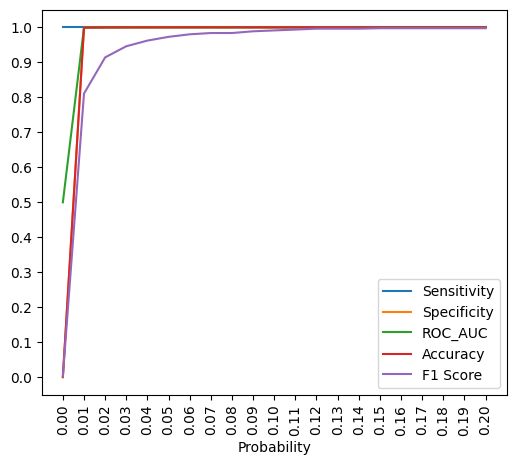

In [63]:
# Get the best cut off precisely

cutoff_prob_precisely = [float(x)/100 for x in range(21)]

get_best_cut_off(xgb_final, X_train, y_train, cutoff_prob_precisely)

__Lets take optimal cut-off as 0.15__


Evaluation metrics for train data:

ROC-AUC Score:  100.0

F1 Score:  99.75

Recall Score:  100.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.99      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845


ROC curve for train data:



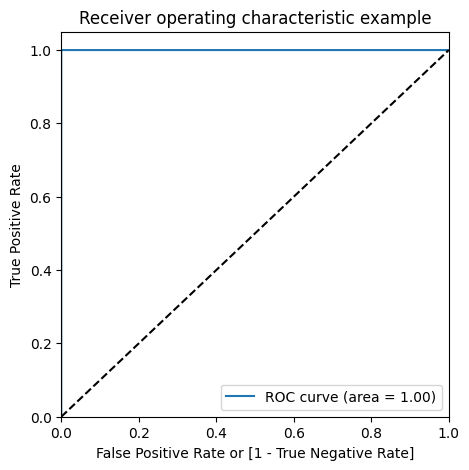


Evaluation metrics for test data:

ROC-AUC Score:  91.32

F1 Score:  87.57

Recall Score:  82.65

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



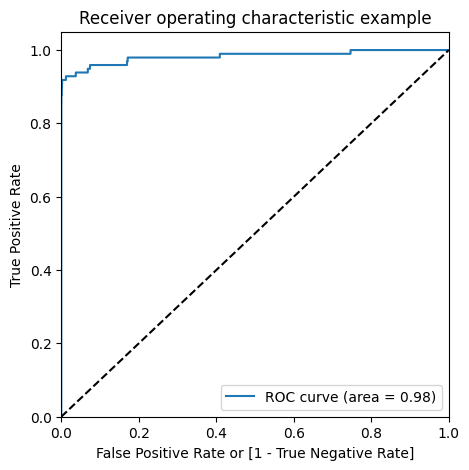

In [66]:
# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(xgb_final, 0.15, X_train, y_train,
                                                                                   X_test, y_test)

In [68]:
model_scores = model_scores.append({'Model Name':'XG Boost (imbalanced data)',
                                    'ROC_AUC score':roc_train,
                                    'F1 score':f1_train,
                                    'Recall score':recall_train}, ignore_index = True)

### e. KNN CLASSIFIER (with imbalanced data)

In [70]:
# Hyper parameter tuning for KNN model(with imbalanced data) to get the best hyper parameters and ROC-AUC score

knn_grid_result = knn_HT_tuning(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best ROC-AUC score:  0.9248766243585503
Best Hyperparameters:  {'leaf_size': 10, 'n_neighbors': 10, 'p': 1}


In [69]:
# Build a KNN model (for imbalanced data) with the best hyper parameters

knn_final = KNeighborsClassifier(leaf_size= 10, n_neighbors= 10, p= 1)

     Probability  Accuracy  Sensitivity  Specificity   ROC_AUC  F1 Score
0.0          0.0  0.998060     1.000000     0.998057  0.999028  0.640650
0.1          0.1  0.999491     0.855330     0.999741  0.927535  0.853165
0.2          0.2  0.999478     0.817259     0.999793  0.908526  0.844037
0.3          0.3  0.999465     0.799492     0.999811  0.899652  0.837766
0.4          0.4  0.999478     0.769036     0.999877  0.884456  0.835862
0.5          0.5  0.999456     0.746193     0.999894  0.873044  0.825843
0.6          0.6  0.999451     0.715736     0.999943  0.857839  0.818578
0.7          0.7  0.999407     0.677665     0.999965  0.838815  0.798206
0.8          0.8  0.999315     0.606599     0.999996  0.803297  0.753943
0.9          0.9  0.999061     0.456853     1.000000  0.728426  0.627178


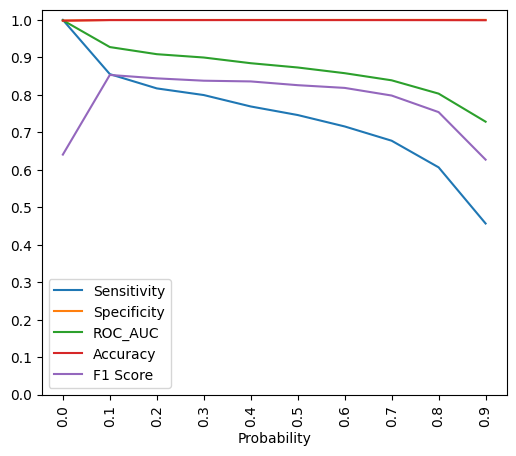

In [70]:
# Get the best cut off from the plot

cutoff_prob = [float(x)/10 for x in range(10)]

get_best_cut_off(knn_final, X_train, y_train, cutoff_prob)

- __From the plot, it is evident that the optimal cut-off lies somewhere between 0.0 and 0.2 for KNN model (with imbalanced data).__
- __Now lets find out the best cut-off value precisely.__ 

      Probability  Accuracy  Sensitivity  Specificity   ROC_AUC  F1 Score
0.00         0.00  0.998060     1.000000     0.998057  0.999028  0.640650
0.01         0.01  0.998060     1.000000     0.998057  0.999028  0.640650
0.02         0.02  0.998060     1.000000     0.998057  0.999028  0.640650
0.03         0.03  0.998060     1.000000     0.998057  0.999028  0.640650
0.04         0.04  0.998060     1.000000     0.998057  0.999028  0.640650
0.05         0.05  0.998060     1.000000     0.998057  0.999028  0.640650
0.06         0.06  0.998060     1.000000     0.998057  0.999028  0.640650
0.07         0.07  0.998060     1.000000     0.998057  0.999028  0.640650
0.08         0.08  0.998060     1.000000     0.998057  0.999028  0.640650
0.09         0.09  0.998060     1.000000     0.998057  0.999028  0.640650
0.10         0.10  0.999491     0.855330     0.999741  0.927535  0.853165
0.11         0.11  0.999491     0.855330     0.999741  0.927535  0.853165
0.12         0.12  0.999491     0.8553

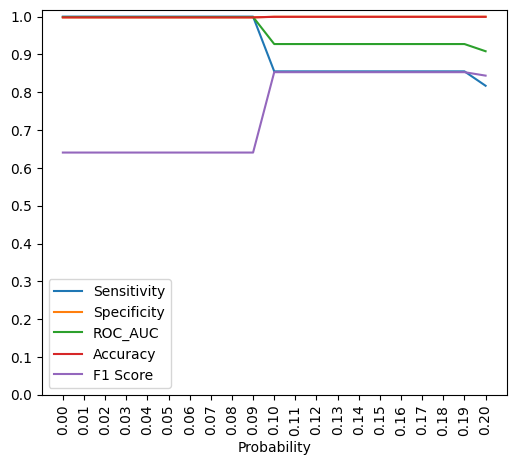

In [71]:
# Get the best cut off precisely

cutoff_prob_precisely = [float(x)/100 for x in range(21)]

get_best_cut_off(knn_final, X_train, y_train, cutoff_prob_precisely)

__Lets take optimal cut-off as 0.1__


Evaluation metrics for train data:

ROC-AUC Score:  92.75

F1 Score:  85.32

Recall Score:  85.53

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.85      0.86      0.85       394

    accuracy                           1.00    227845
   macro avg       0.93      0.93      0.93    227845
weighted avg       1.00      1.00      1.00    227845


ROC curve for train data:



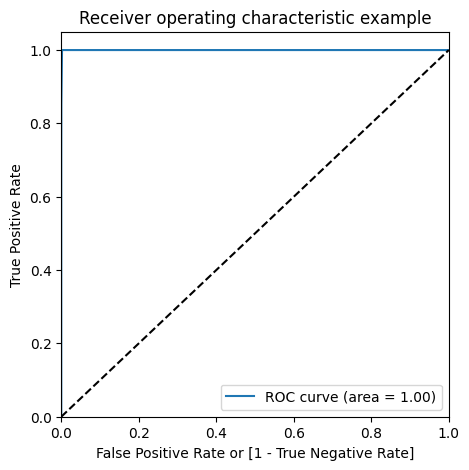


Evaluation metrics for test data:

ROC-AUC Score:  92.33

F1 Score:  84.26

Recall Score:  84.69

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.85      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



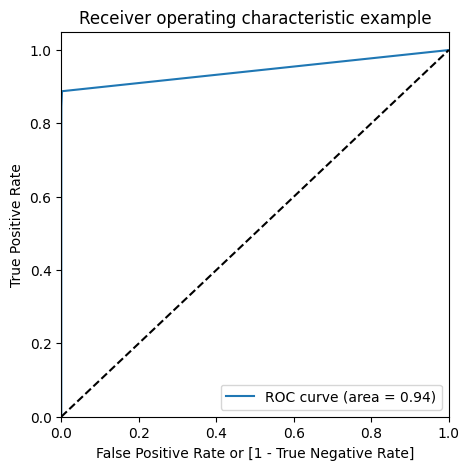

In [72]:
# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(knn_final, 0.1, X_train, y_train, 
                                                                                   X_test, y_test)

In [73]:
model_scores = model_scores.append({'Model Name':'KNN classifier (imbalanced data)',
                                    'ROC_AUC score':roc_train,
                                    'F1 score':f1_train,
                                    'Recall score':recall_train}, ignore_index = True)

### f. SVM (Support Vector Machine) CLASSIFIER (with imbalanced data)

In [81]:
# Hyper parameter tuning for SVM model(with imbalanced data) to get the best hyper parameters and ROC-AUC score

svm_grid_result = svm_HT_tuning(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC-AUC score:  0.9636431669003921
Best Hyperparameters:  {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}


In [74]:
# Build a SVM model (for imbalanced data) with the best hyper parameters

svm_final = SVC(C= 1, gamma= 0.01, kernel= 'linear', probability= True)

     Probability  Accuracy  Sensitivity  Specificity   ROC_AUC  F1 Score
0.0          0.0  0.001729     1.000000     0.000000  0.500000  0.003453
0.1          0.1  0.999399     0.774112     0.999789  0.886950  0.816600
0.2          0.2  0.999394     0.753807     0.999820  0.876813  0.811475
0.3          0.3  0.999377     0.733503     0.999837  0.866670  0.802778
0.4          0.4  0.999328     0.697970     0.999851  0.848910  0.782361
0.5          0.5  0.999249     0.644670     0.999864  0.822267  0.748159
0.6          0.6  0.999140     0.581218     0.999864  0.790541  0.700306
0.7          0.7  0.999083     0.540609     0.999877  0.770243  0.670866
0.8          0.8  0.999017     0.502538     0.999877  0.751207  0.638710
0.9          0.9  0.998969     0.472081     0.999881  0.735981  0.612850


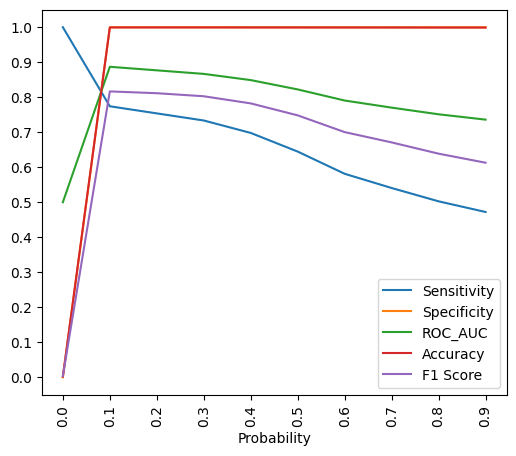

In [75]:
# Get the best cut off from the plot

cutoff_prob = [float(x)/10 for x in range(10)]

get_best_cut_off(svm_final, X_train, y_train, cutoff_prob)

- __From the plot, it is evident that the optimal cut-off lies somewhere between 0.0 and 0.1 for SVM model (with imbalanced data).__
- __Now lets find out the best cut-off value precisely.__ 

      Probability  Accuracy  Sensitivity  Specificity   ROC_AUC  F1 Score
0.00         0.00  0.001729     1.000000     0.000000  0.500000  0.003453
0.01         0.01  0.999386     0.794416     0.999741  0.897078  0.817232
0.02         0.02  0.999381     0.791878     0.999741  0.895809  0.815686
0.03         0.03  0.999381     0.789340     0.999745  0.894543  0.815203
0.04         0.04  0.999386     0.789340     0.999749  0.894545  0.816273
0.05         0.05  0.999386     0.786802     0.999754  0.893278  0.815789
0.06         0.06  0.999390     0.786802     0.999758  0.893280  0.816864
0.07         0.07  0.999399     0.784264     0.999771  0.892018  0.818543
0.08         0.08  0.999407     0.784264     0.999780  0.892022  0.820717
0.09         0.09  0.999407     0.781726     0.999785  0.890755  0.820240
0.10         0.10  0.999399     0.774112     0.999789  0.886950  0.816600


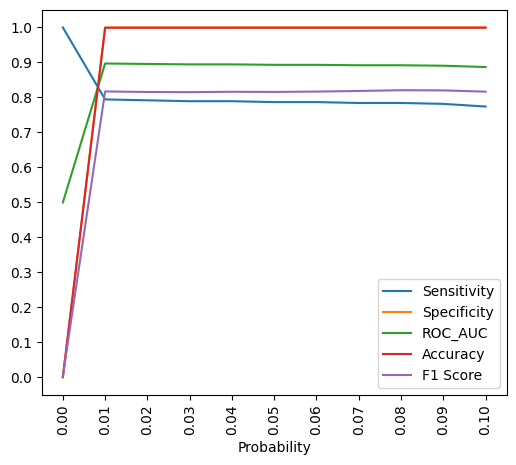

In [76]:
# Get the best cut off precisely

cutoff_prob_precisely = [float(x)/100 for x in range(11)]

get_best_cut_off(svm_final, X_train, y_train, cutoff_prob_precisely)

__Lets take optimal cut-off as 0.01__


Evaluation metrics for train data:

ROC-AUC Score:  89.71

F1 Score:  81.72

Recall Score:  79.44

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.84      0.79      0.82       394

    accuracy                           1.00    227845
   macro avg       0.92      0.90      0.91    227845
weighted avg       1.00      1.00      1.00    227845


ROC curve for train data:



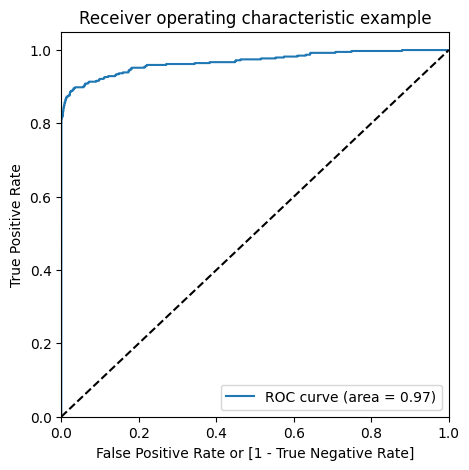


Evaluation metrics for test data:

ROC-AUC Score:  89.27

F1 Score:  79.79

Recall Score:  78.57

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.79      0.80        98

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



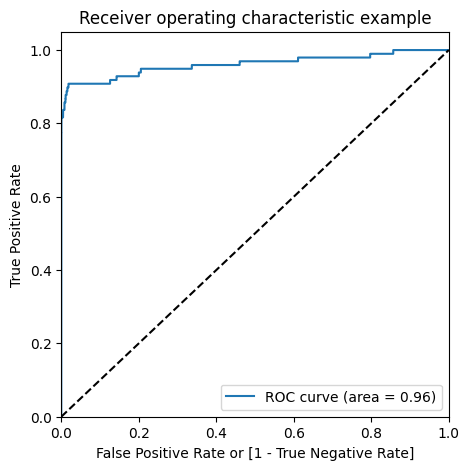

In [77]:
# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(svm_final, 0.01, X_train, y_train, 
                                                                                   X_test, y_test)

In [78]:
model_scores = model_scores.append({'Model Name':'SVM model (imbalanced data)',
                                    'ROC_AUC score':roc_train,
                                    'F1 score':f1_train,
                                    'Recall score':recall_train}, ignore_index = True)

In [79]:
# Dataframe containing scores of all tried out models (with imbalanced data)

model_scores

Model Name  ROC_AUC score  F1 score  \
0  Logistic Regression (imbalanced data)          90.21     80.46   
1        Decision Tree (imbalanced data)          90.72     81.78   
2        Random Forest (imbalanced data)          91.99     84.33   
3             XG Boost (imbalanced data)         100.00     99.75   
4       KNN classifier (imbalanced data)          92.75     85.32   
5            SVM model (imbalanced data)          89.71     81.72   

   Recall score  
0         80.46  
1         81.47  
2         84.01  
3        100.00  
4         85.53  
5         79.44

### Selecting the best model (for imbalanced data)
- __From the above dataframe, it is evident that XG Boost model works well among the other models for the given imbalanced data.__
- __Let us build our final model for imbalanced data - XG Boost with the best hyperparameters.__

In [80]:
# Build the final model for the given dataset with imbalanced data

clf = XGBClassifier(objective = 'binary:logistic', gamma= 1.0, learning_rate= 0.05, n_estimators= 400, 
                    reg_lambda= 0.1, subsample= 0.7)

# Fit the model

clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.1, ...)


Evaluation metrics for train data:

ROC-AUC Score:  100.0

F1 Score:  99.75

Recall Score:  100.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.99      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845


ROC curve for train data:



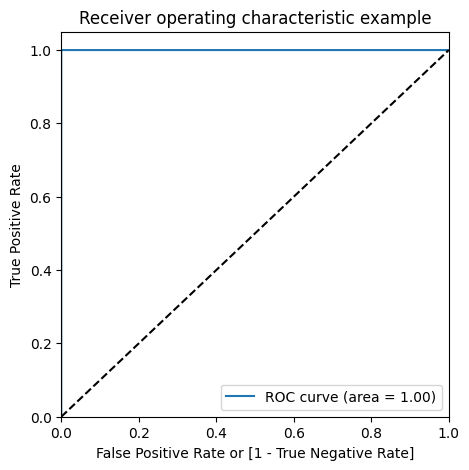


Evaluation metrics for test data:

ROC-AUC Score:  91.32

F1 Score:  87.57

Recall Score:  82.65

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



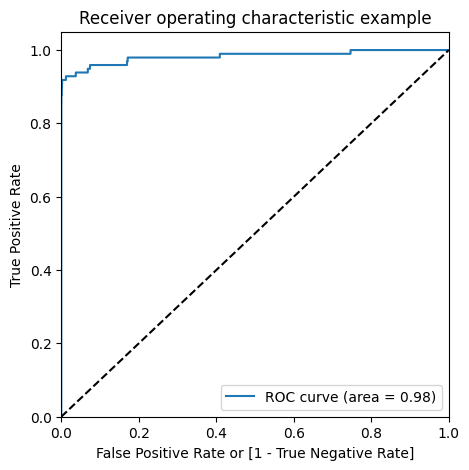

In [82]:
# Evaluate the model for train data and test data with the cut-off 0.1 which we obtained from analysis

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(clf, 0.15, X_train, y_train,
                                                                                   X_test, y_test)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


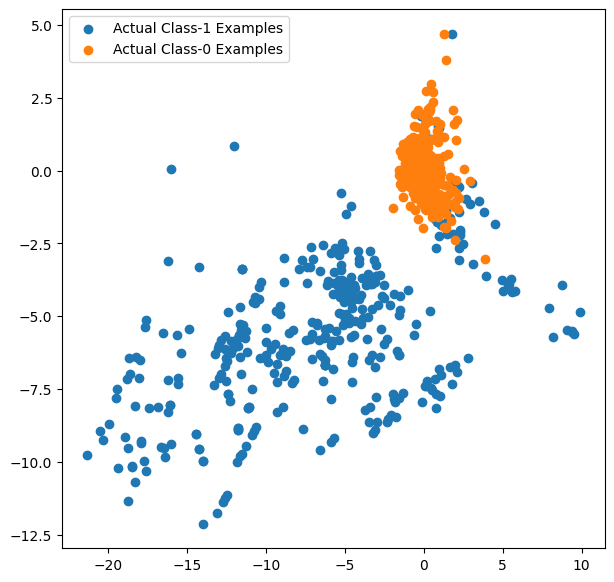

In [83]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.rcParams['figure.figsize'] = [7, 7]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

## MODEL BUILDING WITH BALANCING CLASSES

- __Random Oversampling__
- __SMOTE__
- __ADASYN__

### 1. RANDOM OVERSAMPLING

In [84]:
# Oversampling strategy

random_oversampling = RandomOverSampler(sampling_strategy='minority')

# Fit and resample

X_train_oversampled, y_train_oversampled = random_oversampling.fit_resample(X_train, y_train)

In [85]:
# Class distribution before random oversampling

y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [86]:
# Class distribution after random oversampling

y_train_oversampled.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

__Thus, the data is balanced after random oversampling. Lets build various models on top of this random oversampled data.__

### a. LOGISTIC REGRESSION (with random oversampled data)

In [94]:
# Hyper parameter tuning for Logistic regression model(with random oversampled data) to get the best hyper parameters and ROC-AUC score

lr_grid_result_oversampled = logistic_regression_HT_tuning(X_train_oversampled, y_train_oversampled)

Fitting 7 folds for each of 25 candidates, totalling 175 fits
Best ROC-AUC score:  0.9871961751762839
Best Hyperparameters:  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [87]:
# Build a logistic regression model (for random oversampled data) with the best hyper parameters

lr_final_oversampled = LogisticRegression(C= 100, penalty= 'l2', solver= 'newton-cg')

     Probability  Accuracy  Sensitivity  Specificity   ROC_AUC  F1 Score
0.0          0.0  0.500000     1.000000     0.000000  0.500000  0.666667
0.1          0.1  0.892311     0.984397     0.800225  0.892311  0.901391
0.2          0.2  0.932572     0.966489     0.898655  0.932572  0.934784
0.3          0.3  0.940836     0.943452     0.938220  0.940836  0.940990
0.4          0.4  0.943691     0.927659     0.959723  0.943691  0.942774
0.5          0.5  0.943845     0.914927     0.972763  0.943845  0.942173
0.6          0.6  0.944883     0.907092     0.982673  0.944883  0.942718
0.7          0.7  0.945630     0.902027     0.989233  0.945630  0.943151
0.8          0.8  0.941016     0.889242     0.992790  0.941016  0.937795
0.9          0.9  0.931689     0.866525     0.996852  0.931689  0.926927


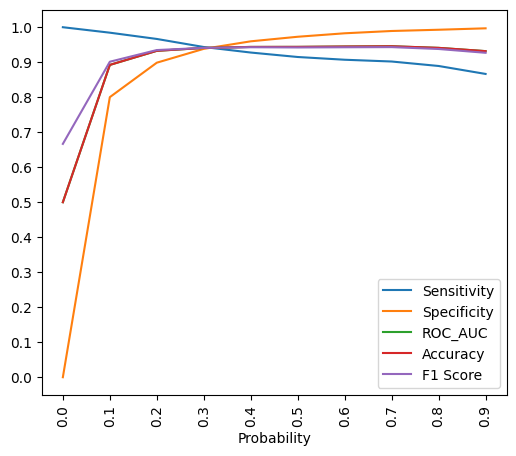

In [88]:
# Get the best cut off from the plot

cutoff_prob = [float(x)/10 for x in range(10)]

get_best_cut_off(lr_final_oversampled, X_train_oversampled, y_train_oversampled, cutoff_prob)

- __From the plot, it is evident that the optimal cut-off lies somewhere between 0.2 and 0.4 for logistic regression model (with random oversampled data).__
- __Now lets find out the best cut-off value precisely.__ 

      Probability  Accuracy  Sensitivity  Specificity   ROC_AUC  F1 Score
0.20         0.20  0.932572     0.966489     0.898655  0.932572  0.934784
0.21         0.21  0.933843     0.963909     0.903777  0.933843  0.935774
0.22         0.22  0.934966     0.961451     0.908481  0.934966  0.936644
0.23         0.23  0.937107     0.961451     0.912764  0.937107  0.938602
0.24         0.24  0.936824     0.956435     0.917213  0.936824  0.938039
0.25         0.25  0.938844     0.956435     0.921253  0.938844  0.939901
0.26         0.26  0.940730     0.956435     0.925026  0.940730  0.941647
0.27         0.27  0.942577     0.956435     0.928719  0.942577  0.943362
0.28         0.28  0.943001     0.953898     0.932104  0.943001  0.943615
0.29         0.29  0.941891     0.948609     0.935173  0.941891  0.942279
0.30         0.30  0.940836     0.943452     0.938220  0.940836  0.940990
0.31         0.31  0.942251     0.943452     0.941051  0.942251  0.942321
0.32         0.32  0.942185     0.9409

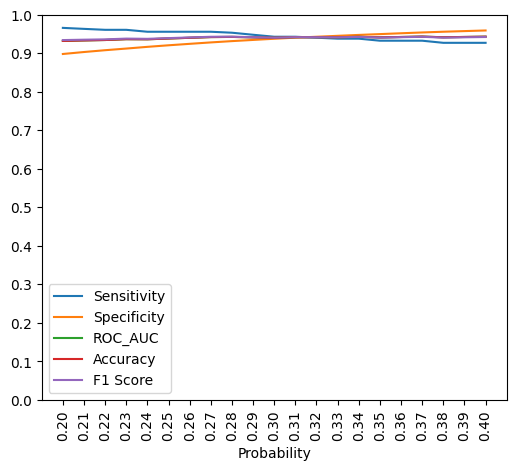

In [89]:
# Get the best cut off precisely

cutoff_prob_precisely = [float(x)/100 for x in range(20,41)]

get_best_cut_off(lr_final_oversampled, X_train_oversampled, y_train_oversampled, cutoff_prob_precisely)

__Lets take optimal cut-off as 0.31 for Logistic regression model (with random oversampled data)__


Evaluation metrics for train data:

ROC-AUC Score:  94.23

F1 Score:  94.23

Recall Score:  94.35

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94    227451
           1       0.94      0.94      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.94      0.94      0.94    454902
weighted avg       0.94      0.94      0.94    454902


ROC curve for train data:



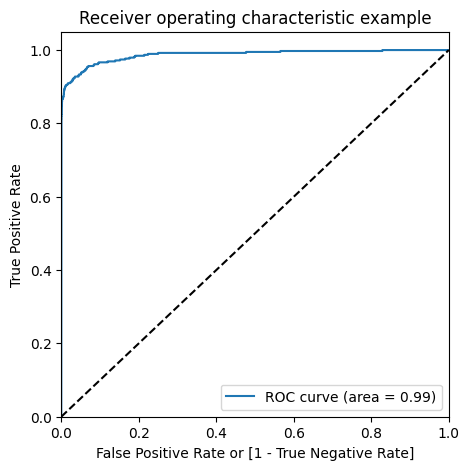


Evaluation metrics for test data:

ROC-AUC Score:  93.94

F1 Score:  5.11

Recall Score:  93.88

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.03      0.94      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.94      0.51     56962
weighted avg       1.00      0.94      0.97     56962


ROC curve for test data:



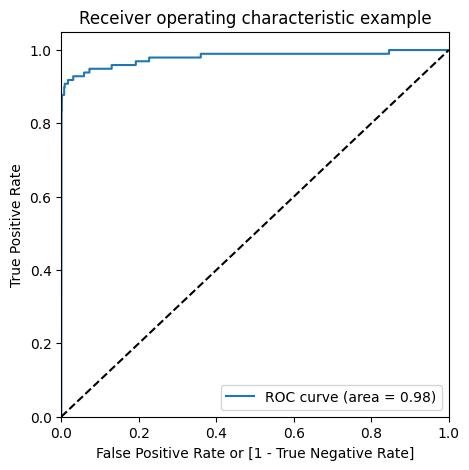

In [90]:
# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(lr_final_oversampled, 
                                                                                   0.31, X_train_oversampled, 
                                                                                   y_train_oversampled, X_test, y_test)

In [91]:
model_scores_oversampled = pd.DataFrame({'Model Name':['Logistic Regression (random oversampled)'],
                                         'ROC_AUC score':[roc_train],
                                         'F1 score':[f1_train],
                                         'Recall score':[recall_train]
                                        })

### b. DECISION TREE (with random oversampled data)

In [274]:
# Hyper parameter tuning for Decision tree model(with random oversampled data) to get the best hyper parameters and ROC-AUC score

dt_grid_result_oversampled = decision_tree_HT_tuning(X_train_oversampled, y_train_oversampled)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best ROC-AUC score:  0.9997990869848774
Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 25, 'min_samples_split': 10}


In [92]:
# Build a decision tree model (for random oversampled data) with the best hyper parameters

dt_final_oversampled = DecisionTreeClassifier(criterion= 'entropy', max_depth= 15, min_samples_leaf= 25, min_samples_split= 10)

     Probability  Accuracy  Sensitivity  Specificity   ROC_AUC  F1 Score
0.0          0.0  0.999033          1.0     0.998066  0.999033  0.999034
0.1          0.1  0.999033          1.0     0.998066  0.999033  0.999034
0.2          0.2  0.999033          1.0     0.998066  0.999033  0.999034
0.3          0.3  0.999033          1.0     0.998066  0.999033  0.999034
0.4          0.4  0.999033          1.0     0.998066  0.999033  0.999034
0.5          0.5  0.999033          1.0     0.998066  0.999033  0.999034
0.6          0.6  0.999033          1.0     0.998066  0.999033  0.999034
0.7          0.7  0.999033          1.0     0.998066  0.999033  0.999034
0.8          0.8  0.999033          1.0     0.998066  0.999033  0.999034
0.9          0.9  0.999033          1.0     0.998066  0.999033  0.999034


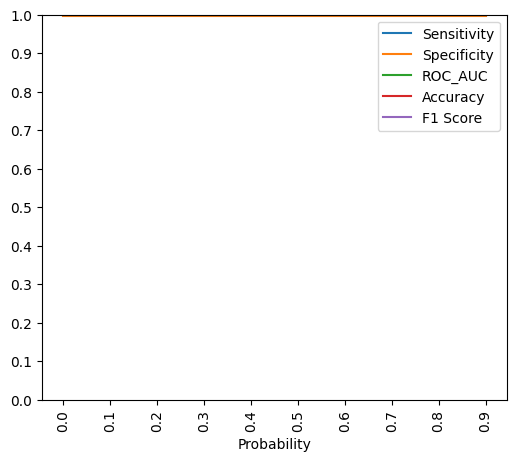

In [93]:
# Get the best cut off from the plot

cutoff_prob = [float(x)/10 for x in range(10)]

get_best_cut_off(dt_final_oversampled, X_train_oversampled, y_train_oversampled, cutoff_prob)

- __We can see that all scores are same for all probability values in this decision tree model (with random oversampled data).__
- __So lets take 0.5 as the cut-off value and proceed with evaluation__ 


Evaluation metrics for train data:

ROC-AUC Score:  99.9

F1 Score:  99.9

Recall Score:  100.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902


ROC curve for train data:



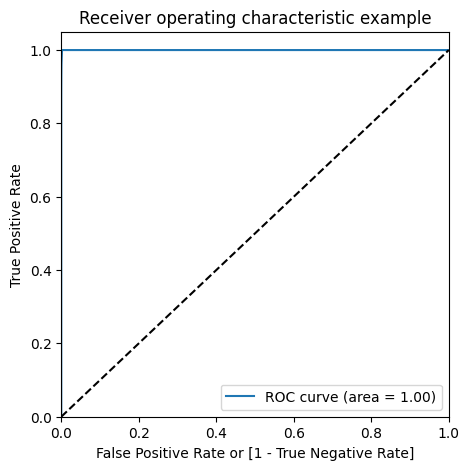


Evaluation metrics for test data:

ROC-AUC Score:  89.7

F1 Score:  54.55

Recall Score:  79.59

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.41      0.80      0.55        98

    accuracy                           1.00     56962
   macro avg       0.71      0.90      0.77     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



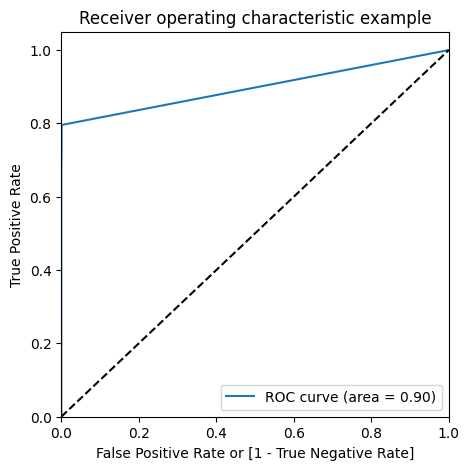

In [94]:
# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(dt_final_oversampled, 
                                                                                   0.5, X_train_oversampled, 
                                                                                   y_train_oversampled, 
                                                                                   X_test, y_test)

In [95]:
model_scores_oversampled = model_scores_oversampled.append({'Model Name':'Decision Tree (random oversampled)',
                                                            'ROC_AUC score':roc_train,
                                                            'F1 score':f1_train,
                                                            'Recall score':recall_train}, ignore_index = True)

### c. RANDOM FOREST (with random oversampled data)

In [284]:
# Hyper parameter tuning for Random forest model(with oversampled data) to get the best hyper parameters and ROC-AUC score

rf_grid_result_oversampled = random_forest_HT_tuning(X_train_oversampled, y_train_oversampled)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best ROC-AUC score:  0.9999996371048931
Best Hyperparameters:  {'max_depth': 50, 'min_samples_leaf': 5, 'n_estimators': 400}


In [96]:
# Build a random forest model (for random oversampled data) with the best hyper parameters

rf_final_oversampled = RandomForestClassifier(max_depth= 50, min_samples_leaf= 5, n_estimators= 400)

     Probability  Accuracy  Sensitivity  Specificity   ROC_AUC  F1 Score
0.0          0.0  0.960803          1.0     0.921605  0.960803  0.962281
0.1          0.1  0.999710          1.0     0.999420  0.999710  0.999710
0.2          0.2  0.999855          1.0     0.999710  0.999855  0.999855
0.3          0.3  0.999892          1.0     0.999785  0.999892  0.999892
0.4          0.4  0.999910          1.0     0.999820  0.999910  0.999910
0.5          0.5  0.999936          1.0     0.999873  0.999936  0.999936
0.6          0.6  0.999952          1.0     0.999903  0.999952  0.999952
0.7          0.7  0.999965          1.0     0.999930  0.999965  0.999965
0.8          0.8  0.999967          1.0     0.999934  0.999967  0.999967
0.9          0.9  0.999974          1.0     0.999947  0.999974  0.999974


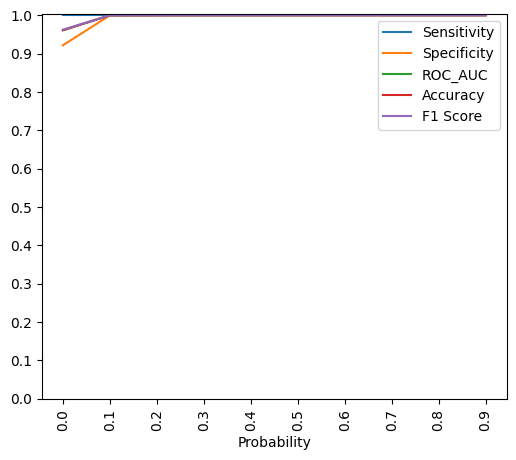

In [97]:
# Get the best cut off from the plot

cutoff_prob = [float(x)/10 for x in range(10)]

get_best_cut_off(rf_final_oversampled, X_train_oversampled, y_train_oversampled, cutoff_prob)

- __From the plot, it is evident that the optimal cut-off is 0.1 for random forest model (with random oversampled data).__


Evaluation metrics for train data:

ROC-AUC Score:  99.97

F1 Score:  99.97

Recall Score:  100.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902


ROC curve for train data:



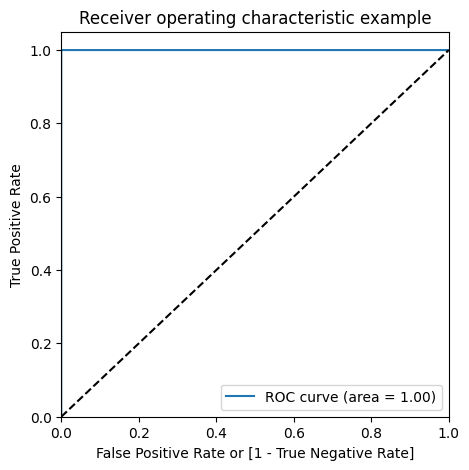


Evaluation metrics for test data:

ROC-AUC Score:  94.35

F1 Score:  74.68

Recall Score:  88.78

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.64      0.89      0.75        98

    accuracy                           1.00     56962
   macro avg       0.82      0.94      0.87     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



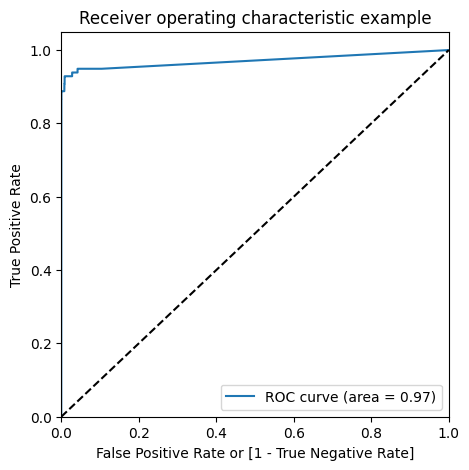

In [98]:
# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(rf_final_oversampled, 
                                                                                   0.1, X_train_oversampled,
                                                                                   y_train_oversampled, 
                                                                                   X_test, y_test)

In [99]:
model_scores_oversampled = model_scores_oversampled.append({'Model Name':'Random Forest (random oversampled)',
                                                            'ROC_AUC score':roc_train,
                                                            'F1 score':f1_train,
                                                            'Recall score':recall_train}, ignore_index = True)

### d. XGBOOST CLASSIFIER (with random oversampled data)

In [287]:
# Hyper parameter tuning for XG boost model(with random oversampled data) to get the best hyper parameters and ROC-AUC score

xgb_grid_result_oversampled = xgboost_HT_tuning(X_train_oversampled, y_train_oversampled)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best ROC-AUC score:  0.9999956523333745
Best Hyperparameters:  {'gamma': 0.5, 'learning_rate': 0.1, 'n_estimators': 400, 'reg_lambda': 0.1, 'subsample': 0.7}


In [100]:
# Build a XG boost model (for random oversampled data) with the best hyper parameters

xgb_final_oversampled = XGBClassifier(objective = 'binary:logistic', gamma= 0.5, learning_rate= 0.1, n_estimators= 400,
                                      reg_lambda= 0.1, subsample= 0.7)

     Probability  Accuracy  Sensitivity  Specificity   ROC_AUC  F1 Score
0.0          0.0  0.500000          1.0     0.000000  0.500000  0.666667
0.1          0.1  0.999987          1.0     0.999974  0.999987  0.999987
0.2          0.2  0.999998          1.0     0.999996  0.999998  0.999998
0.3          0.3  1.000000          1.0     1.000000  1.000000  1.000000
0.4          0.4  1.000000          1.0     1.000000  1.000000  1.000000
0.5          0.5  1.000000          1.0     1.000000  1.000000  1.000000
0.6          0.6  1.000000          1.0     1.000000  1.000000  1.000000
0.7          0.7  1.000000          1.0     1.000000  1.000000  1.000000
0.8          0.8  1.000000          1.0     1.000000  1.000000  1.000000
0.9          0.9  1.000000          1.0     1.000000  1.000000  1.000000


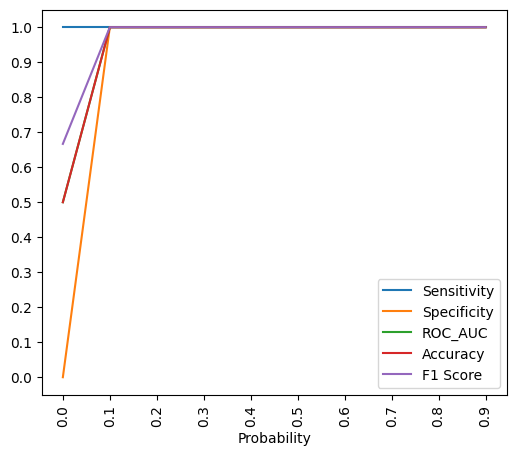

In [101]:
# Get the best cut off from the plot

cutoff_prob = [float(x)/10 for x in range(10)]

get_best_cut_off(xgb_final_oversampled, X_train_oversampled, y_train_oversampled, cutoff_prob)

- __From the plot, it is evident that the optimal cut-off is 0.1 for XG boost model (with random oversampled data).__


Evaluation metrics for train data:

ROC-AUC Score:  100.0

F1 Score:  100.0

Recall Score:  100.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902


ROC curve for train data:



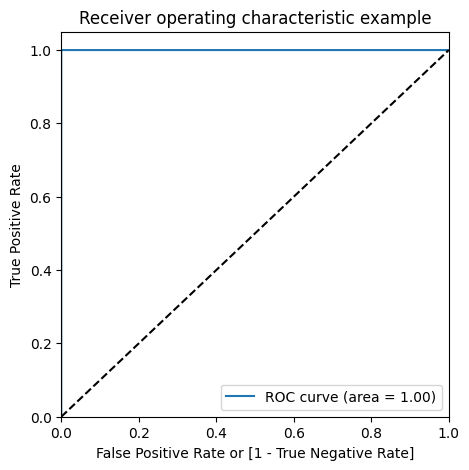


Evaluation metrics for test data:

ROC-AUC Score:  92.85

F1 Score:  87.05

Recall Score:  85.71

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.86      0.87        98

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



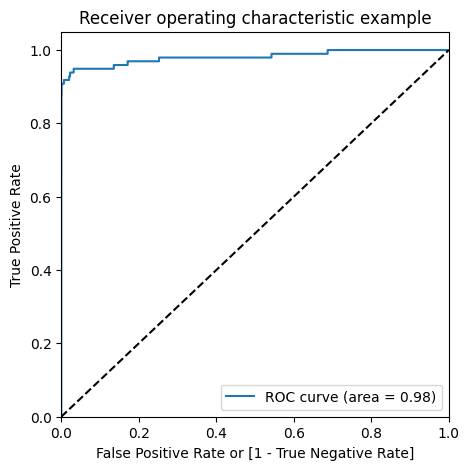

In [102]:
# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(xgb_final_oversampled, 
                                                                                   0.1, X_train_oversampled,
                                                                                   y_train_oversampled,
                                                                                   X_test, y_test)

In [103]:
model_scores_oversampled = model_scores_oversampled.append({'Model Name':'XG Boost (random oversampled)',
                                                            'ROC_AUC score':roc_train,
                                                            'F1 score':f1_train,
                                                            'Recall score':recall_train}, ignore_index = True)

### e. KNN CLASSIFIER (with random oversampled data)

In [164]:
# Hyper parameter tuning for KNN model(with random oversampled data) to get the best hyper parameters and ROC-AUC score

knn_grid_result_oversampled = knn_HT_tuning(X_train_oversampled, y_train_oversampled)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best ROC-AUC score:  0.9998703017353189
Best Hyperparameters:  {'leaf_size': 10, 'n_neighbors': 5, 'p': 1}


In [104]:
# Build a KNN model (for random oversampled data) with the best hyper parameters

knn_final_oversampled = KNeighborsClassifier(leaf_size= 10, n_neighbors= 5, p= 1)

__Lets take 0.5 as cut-off value for KNN model (with random oversampled data)__


Evaluation metrics for train data:

ROC-AUC Score:  99.98

F1 Score:  99.98

Recall Score:  100.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902


ROC curve for train data:



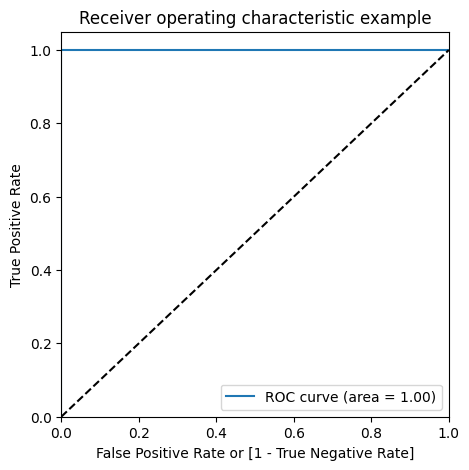


Evaluation metrics for test data:

ROC-AUC Score:  93.34

F1 Score:  80.57

Recall Score:  86.73

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.87      0.81        98

    accuracy                           1.00     56962
   macro avg       0.88      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



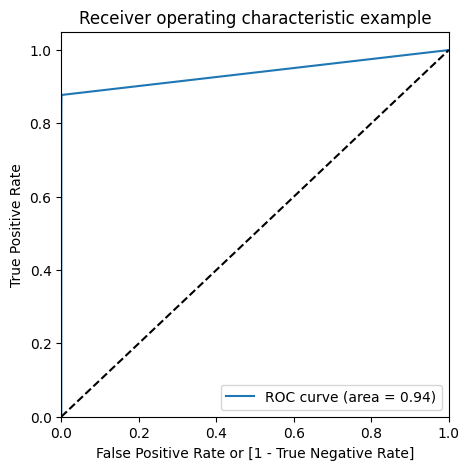

In [105]:
# Fit the model

knn_final_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Evaluate the model for train data and test data. Lets take optimal cut-off as 0.5

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(knn_final_oversampled,
                                                                                   0.5, X_train_oversampled,
                                                                                   y_train_oversampled, 
                                                                                   X_test, y_test)

In [106]:
model_scores_oversampled = model_scores_oversampled.append({'Model Name':'KNN classifier (random oversampled)',
                                                            'ROC_AUC score':roc_train,
                                                            'F1 score':f1_train,
                                                            'Recall score':recall_train}, ignore_index = True)

### f. SVM (Support Vector Machine) CLASSIFIER (with random oversampled data)

In [81]:
# Hyper parameter tuning for SVM model(with random oversampled data) to get the best hyper parameters and ROC-AUC score

svm_grid_result_oversampled = svm_HT_tuning(X_train_oversampled, y_train_oversampled)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC-AUC score:  0.9636431669003921
Best Hyperparameters:  {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}


In [147]:
# Build a SVM model (for random oversampled data) with the best hyper parameters

svm_final_oversampled = SVC(C= 1, gamma= 0.01, kernel= 'linear', probability= True)

__Lets take 0.5 as cut-off value for SVM model (with random oversampled data)__


Evaluation metrics for train data:

ROC-AUC Score:  89.58

F1 Score:  81.57

Recall Score:  79.19

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.84      0.79      0.82       394

    accuracy                           1.00    227845
   macro avg       0.92      0.90      0.91    227845
weighted avg       1.00      1.00      1.00    227845


ROC curve for train data:



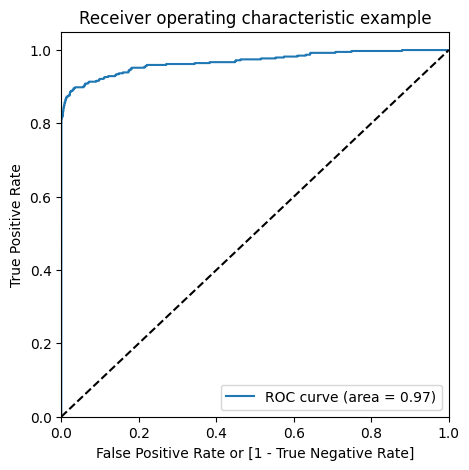


Evaluation metrics for test data:

ROC-AUC Score:  89.27

F1 Score:  80.21

Recall Score:  78.57

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.79      0.80        98

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



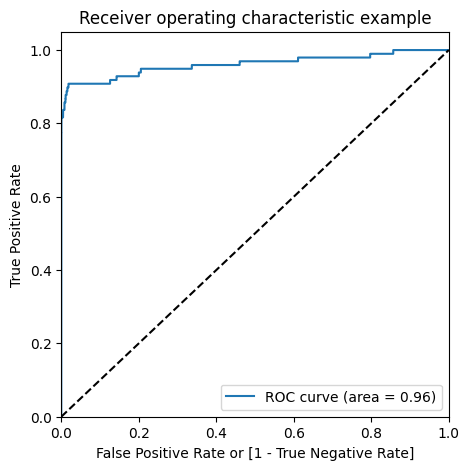

In [148]:
# Fit the model

svm_final_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Evaluate the model for train data and test data. Lets take optimal cut-off as 0.5

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(svm_final_oversampled,
                                                                                   0.5, X_train_oversampled,
                                                                                   y_train_oversampled, 
                                                                                   X_test, y_test)

In [150]:
model_scores_oversampled = model_scores_oversampled.append({'Model Name':'SVM model (random oversampled)',
                                                            'ROC_AUC score':roc_train,
                                                            'F1 score':f1_train,
                                                            'Recall score':recall_train}, ignore_index = True)

In [151]:
# Dataframe containing scores of all tried out models (with random oversampled data)

model_scores_oversampled

Model Name  ROC_AUC score  F1 score  \
0  Logistic Regression (random oversampled)          94.23     94.23   
1        Decision Tree (random oversampled)          99.90     99.90   
2        Random Forest (random oversampled)          99.97     99.97   
3             XG Boost (random oversampled)         100.00    100.00   
4       KNN classifier (random oversampled)          99.98     99.98   
5            SVM model (random oversampled)          89.58     81.57   

   Recall score  
0         94.35  
1        100.00  
2        100.00  
3        100.00  
4        100.00  
5         79.19

### Selecting the best model (for random oversampled data)
- __From the above dataframe, it is evident that XG Boost model works well among the other models for the random oversampled data.__
- __Let us build our final model for random oversampling - XG Boost with the best hyperparameters.__

In [112]:
# Build the final model for the given dataset with random oversampled data

clf_oversampled = XGBClassifier(objective = 'binary:logistic', gamma= 0.5, learning_rate= 0.1, n_estimators= 400, 
                                reg_lambda= 0.1, subsample= 0.7)

# Fit the model

clf_oversampled.fit(X_train_oversampled, y_train_oversampled)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.1, ...)


Evaluation metrics for train data:

ROC-AUC Score:  100.0

F1 Score:  100.0

Recall Score:  100.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902


ROC curve for train data:



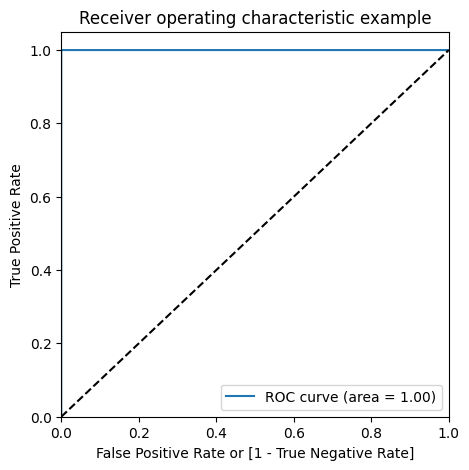


Evaluation metrics for test data:

ROC-AUC Score:  92.85

F1 Score:  87.05

Recall Score:  85.71

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.86      0.87        98

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



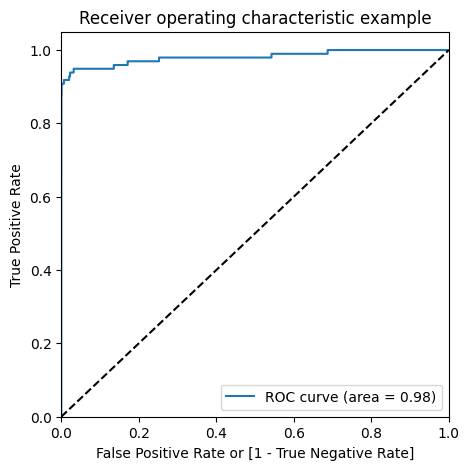

In [113]:
# Evaluate the model for train data and test data with the cut-off 0.1 which we obtained from analysis

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(clf_oversampled,
                                                                                   0.1, X_train_oversampled, 
                                                                                   y_train_oversampled,
                                                                                   X_test, y_test)

### Print the class distribution after applying random oversampling

Top var = 14
2nd Top var = 4
3rd Top var = 12


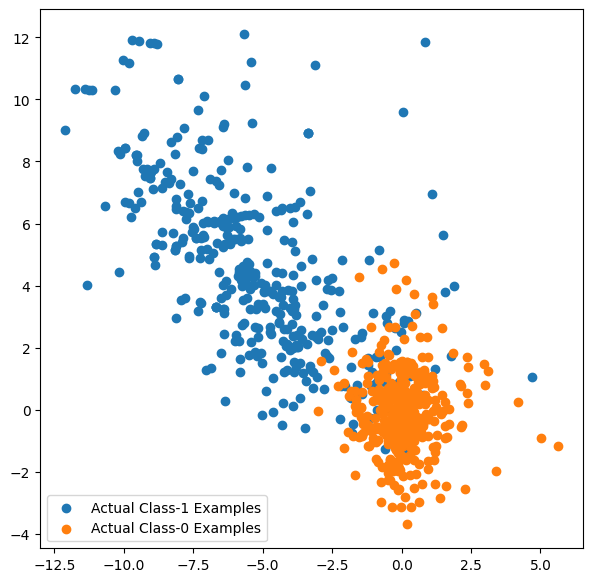

In [114]:
var_imp = []
for i in clf_oversampled.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_oversampled.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_oversampled.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_oversampled.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_oversampled.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_oversampled.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.rcParams['figure.figsize'] = [7, 7]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

### 2. SMOTE (SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE)

### Print the class distribution after applying SMOTE 

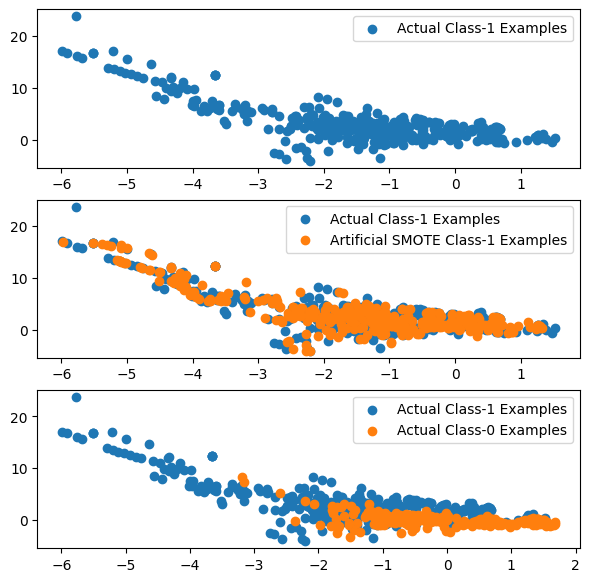

In [115]:
# Create SMOTE object

sm = over_sampling.SMOTE(random_state=0)

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do

X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [7, 7]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

In [116]:
# Class distribution before applying SMOTE

y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [117]:
# Class distribution after appying SMOTE

y_train_smote.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

### a. LOGISTIC REGRESSION (with SMOTE data)

In [90]:
# Hyper parameter tuning for Logistic regression model(with SMOTE data) to get the best hyper parameters and ROC-AUC score

lr_grid_result_smote = logistic_regression_HT_tuning(X_train_smote, y_train_smote)

Fitting 7 folds for each of 25 candidates, totalling 175 fits
Best ROC-AUC score:  0.9889878651736588
Best Hyperparameters:  {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [119]:
# Build a logistic regression model (for SMOTE data) with the best hyper parameters

lr_final_smote = LogisticRegression(C= 100, penalty= 'l2', solver= 'lbfgs')

__Lets take 0.5 as the cut-off value for Logistic regression model (with SMOTE data)__ 


Evaluation metrics for train data:

ROC-AUC Score:  94.39

F1 Score:  94.23

Recall Score:  91.59

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902


ROC curve for train data:



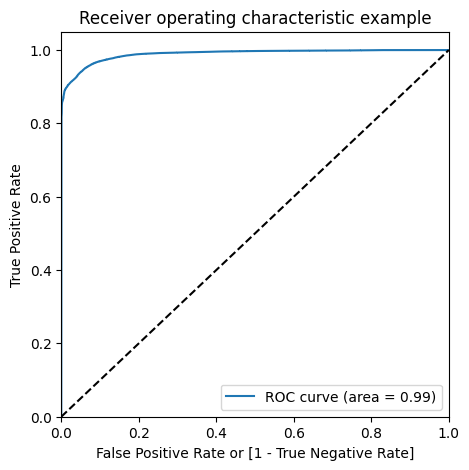


Evaluation metrics for test data:

ROC-AUC Score:  94.47

F1 Score:  9.79

Recall Score:  91.84

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962


ROC curve for test data:



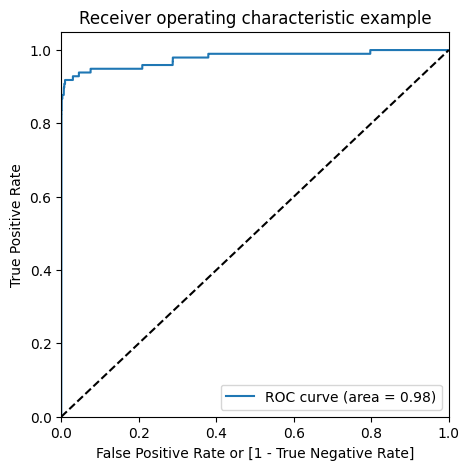

In [121]:
# Fit the model

lr_final_smote.fit(X_train_smote, y_train_smote)

# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(lr_final_smote, 0.5, 
                                                                                   X_train_smote, y_train_smote,
                                                                                   X_test, y_test)

In [122]:
model_scores_smote = pd.DataFrame({'Model Name':['Logistic Regression (SMOTE data)'],
                                   'ROC_AUC score':[roc_train],
                                   'F1 score':[f1_train],
                                   'Recall score':[recall_train]
                                  })

### b. DECISION TREE (with SMOTE data)

In [91]:
# Hyper parameter tuning for Decision tree model(with SMOTE data) to get the best hyper parameters and ROC-AUC score

dt_grid_result_smote = decision_tree_HT_tuning(X_train_smote, y_train_smote)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best ROC-AUC score:  0.9991709111266074
Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [123]:
# Build a decision tree model (for SMOTE data) with the best hyper parameters

dt_final_smote = DecisionTreeClassifier(criterion= 'entropy', max_depth= 15, min_samples_leaf= 50, min_samples_split= 50)

- __Lets take 0.5 as cut-off value for Decision tree model (with SMOTE data)__


Evaluation metrics for train data:

ROC-AUC Score:  99.37

F1 Score:  99.37

Recall Score:  99.62

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    227451
           1       0.99      1.00      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902


ROC curve for train data:



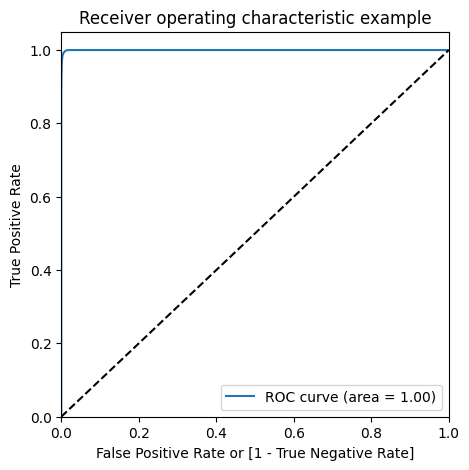


Evaluation metrics for test data:

ROC-AUC Score:  92.31

F1 Score:  20.97

Recall Score:  85.71

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.86      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.92      0.60     56962
weighted avg       1.00      0.99      0.99     56962


ROC curve for test data:



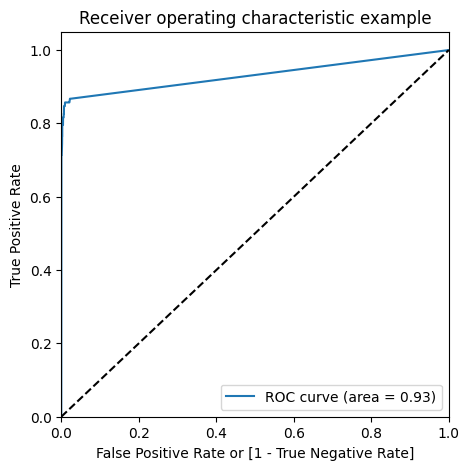

In [124]:
# Fit the model

dt_final_smote.fit(X_train_smote, y_train_smote)

# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(dt_final_smote, 0.5,
                                                                                   X_train_smote, y_train_smote, 
                                                                                   X_test, y_test)

In [125]:
model_scores_smote = model_scores_smote.append({'Model Name':'Decision Tree (SMOTE data)',
                                                'ROC_AUC score':roc_train,
                                                'F1 score':f1_train,
                                                'Recall score':recall_train}, ignore_index = True)

### c. RANDOM FOREST (with SMOTE data)

In [55]:
# Hyper parameter tuning for Random forest model(with SMOTE data) to get the best hyper parameters and ROC-AUC score

rf_grid_result_smote = random_forest_HT_tuning(X_train_smote, y_train_smote)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best ROC-AUC score:  0.999995671498736
Best Hyperparameters:  {'max_depth': 100, 'min_samples_leaf': 5, 'n_estimators': 400}


In [126]:
# Build a random forest model (for SMOTE data) with the best hyper parameters

rf_final_smote = RandomForestClassifier(max_depth= 100, min_samples_leaf= 5, n_estimators= 400)

 __Lets take cut-off value as 0.5 for random forest model (with SMOTE data)__



Evaluation metrics for train data:

ROC-AUC Score:  99.99

F1 Score:  99.99

Recall Score:  100.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902


ROC curve for train data:



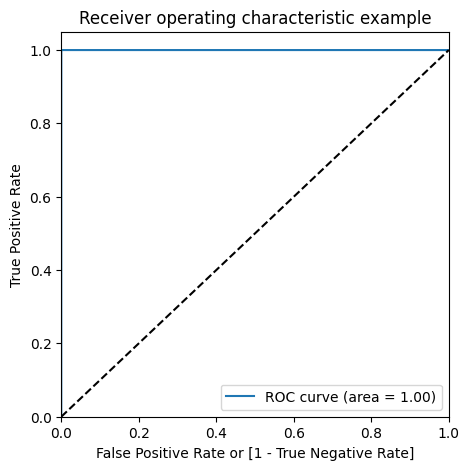


Evaluation metrics for test data:

ROC-AUC Score:  92.84

F1 Score:  84.0

Recall Score:  85.71

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.86      0.84        98

    accuracy                           1.00     56962
   macro avg       0.91      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



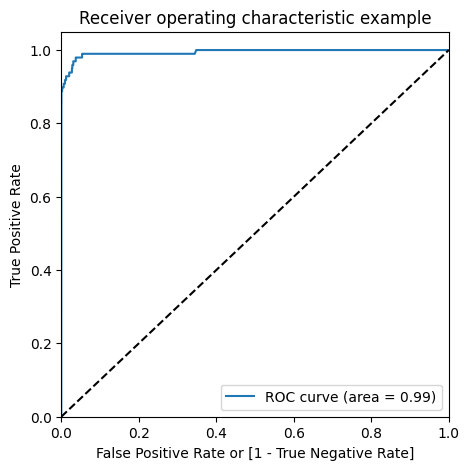

In [127]:
# Fit the model

rf_final_smote.fit(X_train_smote, y_train_smote)

# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(rf_final_smote, 0.5,
                                                                                   X_train_smote, y_train_smote, 
                                                                                   X_test, y_test)

In [128]:
model_scores_smote = model_scores_smote.append({'Model Name':'Random Forest (SMOTE data)',
                                                'ROC_AUC score':roc_train,
                                                'F1 score':f1_train,
                                                'Recall score':recall_train}, ignore_index = True)

### d. XGBOOST CLASSIFIER (with SMOTE data)

In [60]:
# Hyper parameter tuning for XG boost model(with SMOTE data) to get the best hyper parameters and ROC-AUC score

xgb_grid_result_smote = xgboost_HT_tuning(X_train_smote, y_train_smote)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best ROC-AUC score:  0.9999936389266058
Best Hyperparameters:  {'gamma': 0.5, 'learning_rate': 0.1, 'n_estimators': 400, 'reg_lambda': 0.01, 'subsample': 0.7}


In [129]:
# Build a XG boost model (for SMOTE data) with the best hyper parameters

xgb_final_smote = XGBClassifier(objective = 'binary:logistic', gamma= 0.5, learning_rate= 0.1, n_estimators= 400, 
                                reg_lambda= 0.01, subsample= 0.7)

__Lets take optimal cut-off as 0.5 for XG Boost model (with SMOTE data)__


Evaluation metrics for train data:

ROC-AUC Score:  100.0

F1 Score:  100.0

Recall Score:  100.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902


ROC curve for train data:



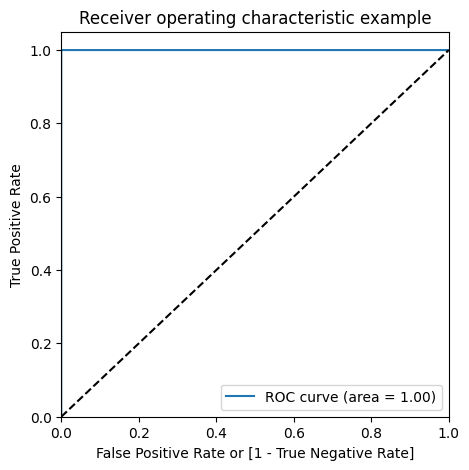


Evaluation metrics for test data:

ROC-AUC Score:  92.84

F1 Score:  84.85

Recall Score:  85.71

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.86      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



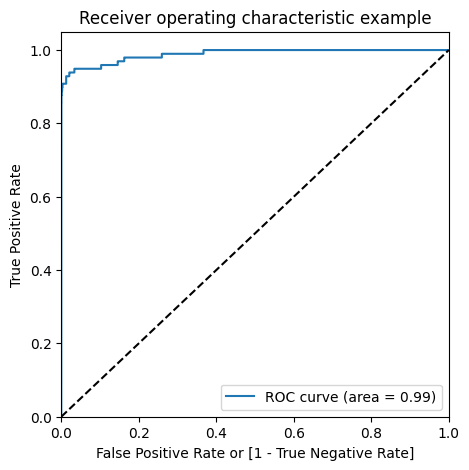

In [130]:
# Fit the model

xgb_final_smote.fit(X_train_smote, y_train_smote)

# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(xgb_final_smote, 0.5,
                                                                                   X_train_smote, y_train_smote,
                                                                                   X_test, y_test)

In [131]:
model_scores_smote = model_scores_smote.append({'Model Name':'XG Boost (SMOTE data)',
                                                'ROC_AUC score':roc_train,
                                                'F1 score':f1_train,
                                                'Recall score':recall_train}, ignore_index = True)

### e. KNN CLASSIFIER (with SMOTE data)

In [70]:
# Hyper parameter tuning for KNN model(with SMOTE data) to get the best hyper parameters and ROC-AUC score

knn_grid_result_smote = knn_HT_tuning(X_train_smote, y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best ROC-AUC score:  0.9248766243585503
Best Hyperparameters:  {'leaf_size': 10, 'n_neighbors': 10, 'p': 1}


In [132]:
# Build a KNN model (for SMOTE data) with the best hyper parameters

knn_final_smote = KNeighborsClassifier(leaf_size= 10, n_neighbors= 10, p= 1)

__Lets take 0.5 as cut-off value for KNN model (with SMOTE data)__


Evaluation metrics for train data:

ROC-AUC Score:  99.89

F1 Score:  99.89

Recall Score:  100.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902


ROC curve for train data:



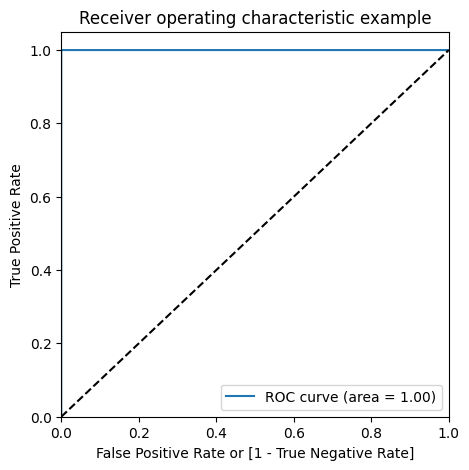


Evaluation metrics for test data:

ROC-AUC Score:  93.75

F1 Score:  51.65

Recall Score:  87.76

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.88      0.52        98

    accuracy                           1.00     56962
   macro avg       0.68      0.94      0.76     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



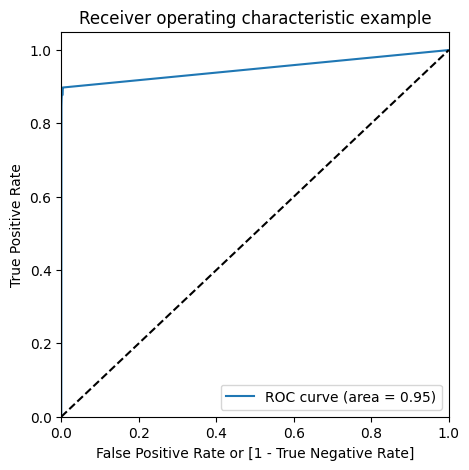

In [133]:
# Fit the model

knn_final_smote.fit(X_train_smote, y_train_smote)

# Evaluate the model for train data and test data. Lets take optimal cut-off as 0.5

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(knn_final_smote, 0.5, 
                                                                                   X_train_smote, y_train_smote, 
                                                                                   X_test, y_test)

In [134]:
model_scores_smote = model_scores_smote.append({'Model Name':'KNN classifier (SMOTE data)',
                                                'ROC_AUC score':roc_train,
                                                'F1 score':f1_train,
                                                'Recall score':recall_train}, ignore_index = True)

### f. SVM (Support Vector Machine) CLASSIFIER (with SMOTE data)

In [81]:
# Hyper parameter tuning for SVM model(with SMOTE data) to get the best hyper parameters and ROC-AUC score

svm_grid_result_smote = svm_HT_tuning(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC-AUC score:  0.9636431669003921
Best Hyperparameters:  {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}


In [143]:
# Build a SVM model (for SMOTE data) with the best hyper parameters

svm_final_smote = SVC(C= 1, gamma= 0.01, kernel= 'linear', probability= True)


Evaluation metrics for train data:

ROC-AUC Score:  89.83

F1 Score:  81.88

Recall Score:  79.7

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.84      0.80      0.82       394

    accuracy                           1.00    227845
   macro avg       0.92      0.90      0.91    227845
weighted avg       1.00      1.00      1.00    227845


ROC curve for train data:



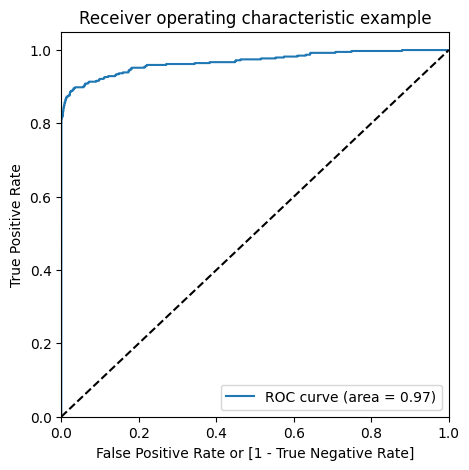


Evaluation metrics for test data:

ROC-AUC Score:  89.78

F1 Score:  80.41

Recall Score:  79.59

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.80      0.80        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



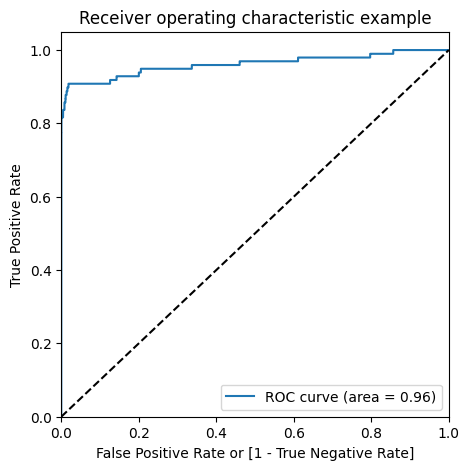

In [144]:
# Fit the model

svm_final_smote.fit(X_train_smote, y_train_smote)


# Evaluate the model for train data and test data. Lets take optimal cut-off as 0.5

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(svm_final_smote,
                                                                                   0.5, X_train_smote,
                                                                                   y_train_smote, 
                                                                                   X_test, y_test)

In [145]:
model_scores_smote = model_scores_smote.append({'Model Name':'SVM model (SMOTE data)',
                                                'ROC_AUC score':roc_train,
                                                'F1 score':f1_train,
                                                'Recall score':recall_train}, ignore_index = True)

In [146]:
# Dataframe containing scores of all tried out models (with SMOTE data)

model_scores_smote

Model Name  ROC_AUC score  F1 score  Recall score
0  Logistic Regression (SMOTE data)          94.39     94.23         91.59
1        Decision Tree (SMOTE data)          99.37     99.37         99.62
2        Random Forest (SMOTE data)          99.99     99.99        100.00
3             XG Boost (SMOTE data)         100.00    100.00        100.00
4       KNN classifier (SMOTE data)          99.89     99.89        100.00
5            SVM model (SMOTE data)          89.83     81.88         79.70

### Selecting the best model (for SMOTE data)
- __From the above dataframe, it is evident that XG Boost model works well among the other models for the SMOTE data.__
- __Let us build our final model for SMOTE - XG Boost with the best hyperparameters.__

In [139]:
# Build the final model for the given dataset with SMOTE data

clf_smote = XGBClassifier(objective = 'binary:logistic', gamma= 0.5, learning_rate= 0.1, n_estimators= 400, 
                          reg_lambda= 0.01, subsample= 0.7)
# Fit the model

clf_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.01, ...)


Evaluation metrics for train data:

ROC-AUC Score:  100.0

F1 Score:  100.0

Recall Score:  100.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902


ROC curve for train data:



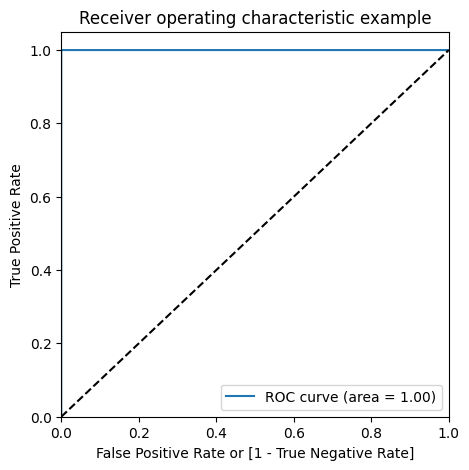


Evaluation metrics for test data:

ROC-AUC Score:  92.84

F1 Score:  84.85

Recall Score:  85.71

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.86      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



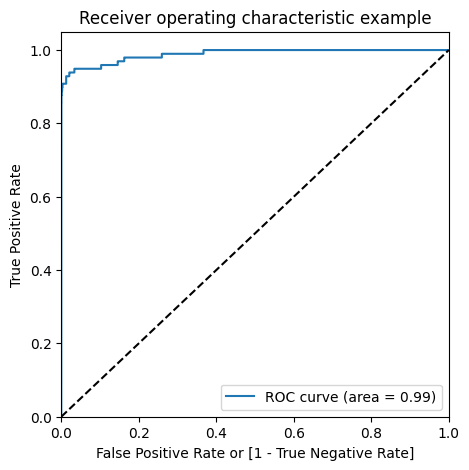

In [171]:
# Evaluate the model for train data and test data with the cut-off value 0.5

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(clf_smote, 0.5, 
                                                                                   X_train_smote, y_train_smote,
                                                                                   X_test, y_test)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 4
3rd Top var = 8


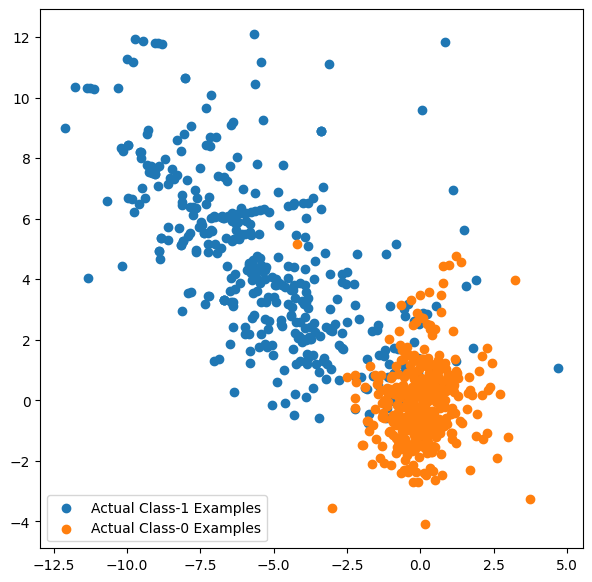

In [75]:
var_imp = []
for i in clf_smote.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_smote.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_smote.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_smote.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_smote.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_smote.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.rcParams['figure.figsize'] = [7, 7]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

### 3. ADASYN (ADAPTIVE SYNTHETIC)

### Print the class distribution after applying ADASYN

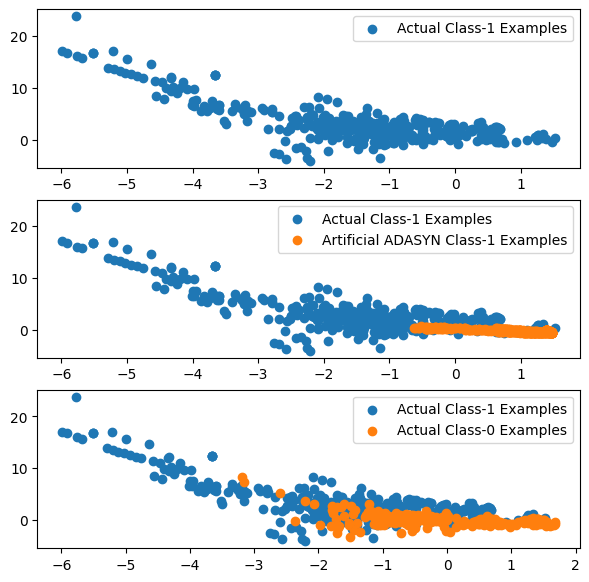

In [152]:
# Create ADASYN object

ada = over_sampling.ADASYN(random_state=0)

X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do

X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [7, 7]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

In [153]:
# Class distribution before applying ADASYN

y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [154]:
# Class distribution after appying ADASYN

y_train_smote.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

### a. LOGISTIC REGRESSION (with ADASYN data)

In [78]:
# Hyper parameter tuning for Logistic regression model(with ADASYN data) to get the best hyper parameters and ROC-AUC score

lr_grid_result_adasyn = logistic_regression_HT_tuning(X_train_adasyn, y_train_adasyn)

Fitting 7 folds for each of 25 candidates, totalling 175 fits
Best ROC-AUC score:  0.9616337717851098
Best Hyperparameters:  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [155]:
# Build a logistic regression model (for ADASYN data) with the best hyper parameters

lr_final_adasyn = LogisticRegression(C= 100, penalty= 'l2', solver= 'newton-cg')

 __Lets take 0.5 as cut-off value for Logistic regression model (with ADASYN data)__


Evaluation metrics for train data:

ROC-AUC Score:  89.31

F1 Score:  89.2

Recall Score:  88.24

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89    227451
           1       0.90      0.88      0.89    227434

    accuracy                           0.89    454885
   macro avg       0.89      0.89      0.89    454885
weighted avg       0.89      0.89      0.89    454885


ROC curve for train data:



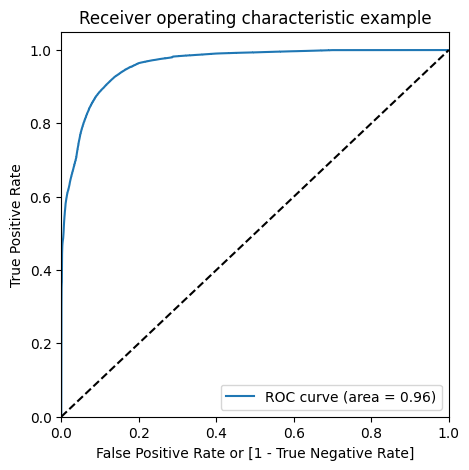


Evaluation metrics for test data:

ROC-AUC Score:  92.55

F1 Score:  3.23

Recall Score:  94.9

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.95     56962


ROC curve for test data:



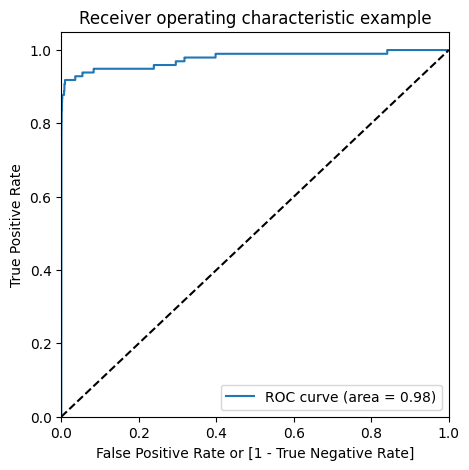

In [156]:
# Fit the model

lr_final_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(lr_final_adasyn, 0.5, 
                                                                                   X_train_adasyn, y_train_adasyn,
                                                                                   X_test, y_test)

In [157]:
model_scores_adasyn = pd.DataFrame({'Model Name':['Logistic Regression (ADASYN data)'],
                                    'ROC_AUC score':[roc_train],
                                    'F1 score':[f1_train],
                                    'Recall score':[recall_train]
                                   })

### b. DECISION TREE (with ADASYN data)

In [79]:
# Hyper parameter tuning for Decision tree model(with ADASYN data) to get the best hyper parameters and ROC-AUC score

dt_grid_result_adasyn = decision_tree_HT_tuning(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best ROC-AUC score:  0.9983654209511534
Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 50, 'min_samples_split': 25}


In [158]:
# Build a decision tree model (for ADASYN data) with the best hyper parameters

dt_final_adasyn = DecisionTreeClassifier(criterion= 'entropy', max_depth= 15, min_samples_leaf= 50, min_samples_split= 25)

__Lets take optimal cut-off as 0.5 for Decision tree model (with ADASYN data)__


Evaluation metrics for train data:

ROC-AUC Score:  99.34

F1 Score:  99.34

Recall Score:  99.71

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    227451
           1       0.99      1.00      0.99    227434

    accuracy                           0.99    454885
   macro avg       0.99      0.99      0.99    454885
weighted avg       0.99      0.99      0.99    454885


ROC curve for train data:



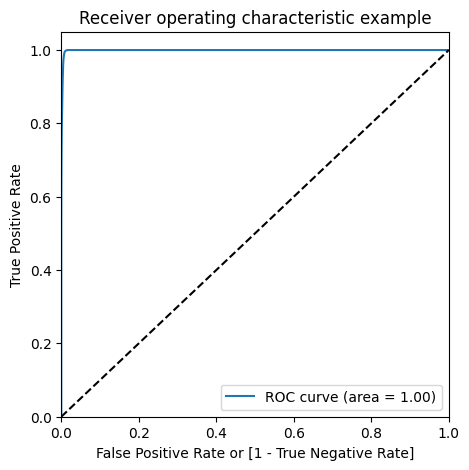


Evaluation metrics for test data:

ROC-AUC Score:  93.87

F1 Score:  22.63

Recall Score:  88.78

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.89      0.23        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962


ROC curve for test data:



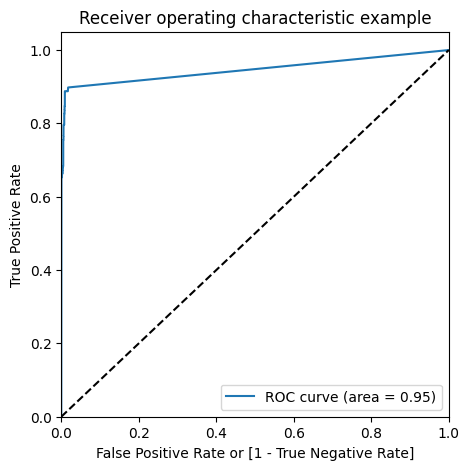

In [159]:
# Fit the model

dt_final_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(dt_final_adasyn, 0.5,
                                                                                   X_train_adasyn, y_train_adasyn, 
                                                                                   X_test, y_test)

In [160]:
model_scores_adasyn = model_scores_adasyn.append({'Model Name':'Decision Tree (ADASYN data)',
                                                  'ROC_AUC score':roc_train,
                                                  'F1 score':f1_train,
                                                  'Recall score':recall_train}, ignore_index = True)

### c. RANDOM FOREST (with ADASYN data)

In [80]:
# Hyper parameter tuning for Random forest model(with ADASYN data) to get the best hyper parameters and ROC-AUC score

rf_grid_result_adasyn = random_forest_HT_tuning(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best ROC-AUC score:  0.9999973309048406
Best Hyperparameters:  {'max_depth': 100, 'min_samples_leaf': 5, 'n_estimators': 400}


In [161]:
# Build a random forest model (for ADASYN data) with the best hyper parameters

rf_final_adasyn = RandomForestClassifier(max_depth= 100, min_samples_leaf= 5, n_estimators= 400)

__Lets take optimal cut-off as 0.5 for Random forest model (with ADASYN data)__


Evaluation metrics for train data:

ROC-AUC Score:  99.99

F1 Score:  99.99

Recall Score:  100.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885


ROC curve for train data:



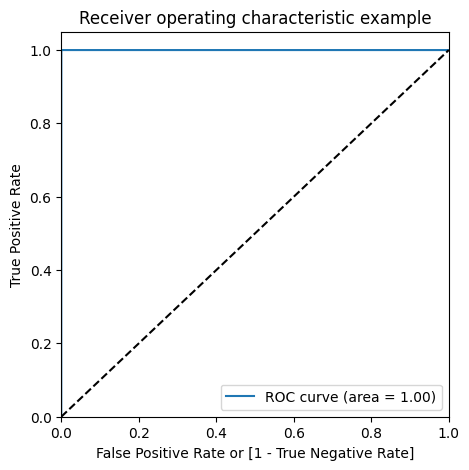


Evaluation metrics for test data:

ROC-AUC Score:  92.33

F1 Score:  84.26

Recall Score:  84.69

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.85      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



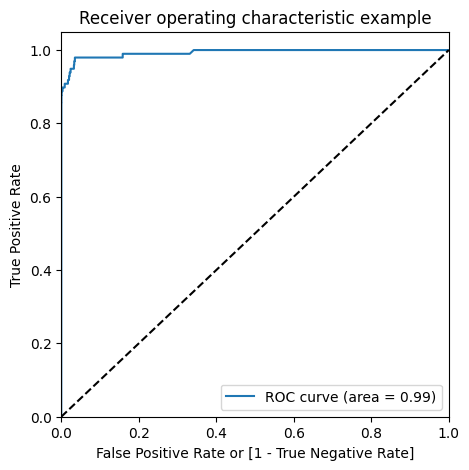

In [162]:
# Fit the model

rf_final_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(rf_final_adasyn, 0.5,
                                                                                   X_train_adasyn, y_train_adasyn, 
                                                                                   X_test, y_test)

In [163]:
model_scores_adasyn = model_scores_adasyn.append({'Model Name':'Random Forest (ADASYN data)',
                                                  'ROC_AUC score':roc_train,
                                                  'F1 score':f1_train,
                                                  'Recall score':recall_train}, ignore_index = True)

### d. XGBOOST CLASSIFIER (with ADASYN data)

In [81]:
# Hyper parameter tuning for XG boost model(with ADASYN data) to get the best hyper parameters and ROC-AUC score

xgb_grid_result_adasyn = xgboost_HT_tuning(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best ROC-AUC score:  0.9999929386784169
Best Hyperparameters:  {'gamma': 0.5, 'learning_rate': 0.1, 'n_estimators': 400, 'reg_lambda': 0.1, 'subsample': 0.7}


In [164]:
# Build a XG boost model (for ADASYN data) with the best hyper parameters

xgb_final_adasyn = XGBClassifier(objective = 'binary:logistic', gamma= 0.5, learning_rate= 0.1, n_estimators= 400, 
                                 reg_lambda= 0.1, subsample= 0.7)

__Lets take optimal cut-off as 0.5 for XG boost model (with ADASYN data)__


Evaluation metrics for train data:

ROC-AUC Score:  100.0

F1 Score:  100.0

Recall Score:  100.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885


ROC curve for train data:



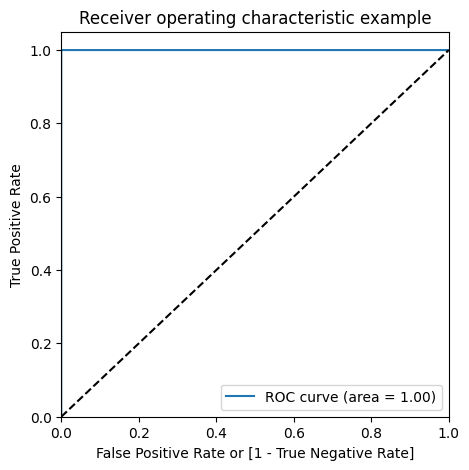


Evaluation metrics for test data:

ROC-AUC Score:  91.82

F1 Score:  82.0

Recall Score:  83.67

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.84      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



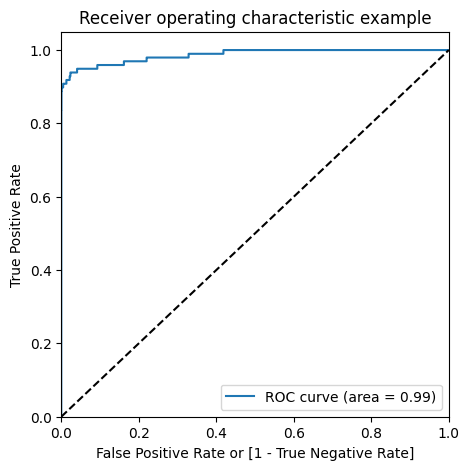

In [165]:
# Fit the model

xgb_final_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(xgb_final_adasyn,0.5,
                                                                                   X_train_adasyn, y_train_adasyn,
                                                                                   X_test, y_test)

In [166]:
model_scores_adasyn = model_scores_adasyn.append({'Model Name':'XG Boost (ADASYN data)',
                                                  'ROC_AUC score':roc_train,
                                                  'F1 score':f1_train,
                                                  'Recall score':recall_train}, ignore_index = True)

### e. KNN CLASSIFIER (with ADASYN data)

In [70]:
# Hyper parameter tuning for KNN model(with ADASYN data) to get the best hyper parameters and ROC-AUC score

knn_grid_result_adasyn = knn_HT_tuning(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best ROC-AUC score:  0.9248766243585503
Best Hyperparameters:  {'leaf_size': 10, 'n_neighbors': 10, 'p': 1}


In [167]:
# Build a KNN model (for ADASYN data) with the best hyper parameters

knn_final_adasyn = KNeighborsClassifier(leaf_size= 10, n_neighbors= 10, p= 1)

__Lets take optimal cut-off as 0.5 for KNN model (with ADASYN data)__


Evaluation metrics for train data:

ROC-AUC Score:  99.89

F1 Score:  99.89

Recall Score:  100.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885


ROC curve for train data:



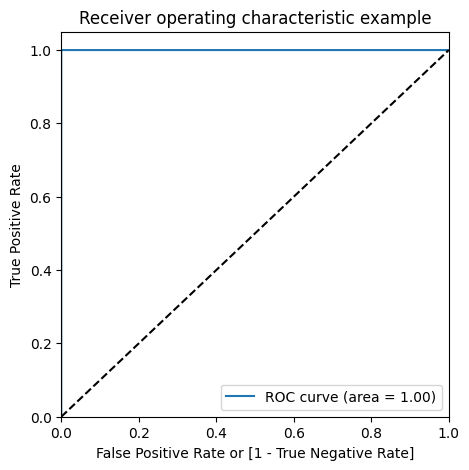


Evaluation metrics for test data:

ROC-AUC Score:  93.74

F1 Score:  51.19

Recall Score:  87.76

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.36      0.88      0.51        98

    accuracy                           1.00     56962
   macro avg       0.68      0.94      0.76     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



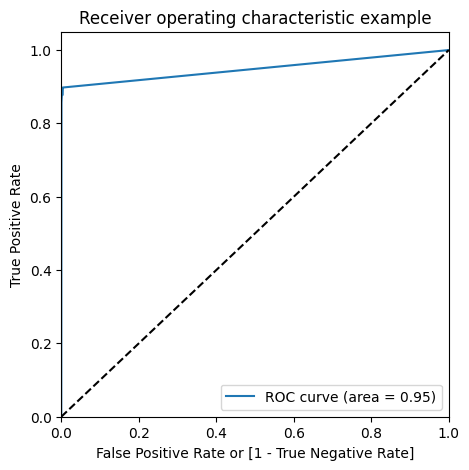

In [168]:
# Fit the model

knn_final_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Evaluate the model for train data and test data

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(knn_final_adasyn, 0.5, 
                                                                                   X_train_adasyn, y_train_adasyn, 
                                                                                   X_test, y_test)

In [169]:
model_scores_adasyn = model_scores_adasyn.append({'Model Name':'KNN classifier (ADASYN data)',
                                                  'ROC_AUC score':roc_train,
                                                  'F1 score':f1_train,
                                                  'Recall score':recall_train}, ignore_index = True)

In [170]:
# Dataframe containing scores of all tried out models (with ADASYN data)

model_scores_adasyn

Model Name  ROC_AUC score  F1 score  Recall score
0  Logistic Regression (ADASYN data)          89.31     89.20         88.24
1        Decision Tree (ADASYN data)          99.34     99.34         99.71
2        Random Forest (ADASYN data)          99.99     99.99        100.00
3             XG Boost (ADASYN data)         100.00    100.00        100.00
4       KNN classifier (ADASYN data)          99.89     99.89        100.00

### Selecting the best model (for ADASYN data)
- __From the above dataframe, it is evident that XG Boost model works well among the other models for the ADASYN data.__
- __Let us build our final model for ADASYN - XG Boost with the best hyperparameters.__

In [172]:
# Build the final model for the given dataset with ADASYN data

clf_adasyn = XGBClassifier(objective = 'binary:logistic', gamma= 0.5, learning_rate= 0.1, n_estimators= 400,
                           reg_lambda= 0.1, subsample= 0.7)

# Fit the model

clf_adasyn.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.1, ...)


Evaluation metrics for train data:

ROC-AUC Score:  100.0

F1 Score:  100.0

Recall Score:  100.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885


ROC curve for train data:



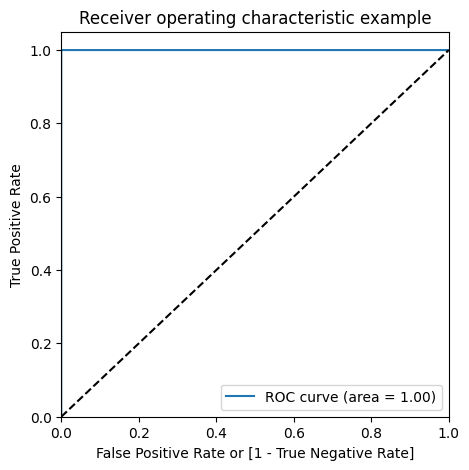


Evaluation metrics for test data:

ROC-AUC Score:  91.82

F1 Score:  82.0

Recall Score:  83.67

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.84      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



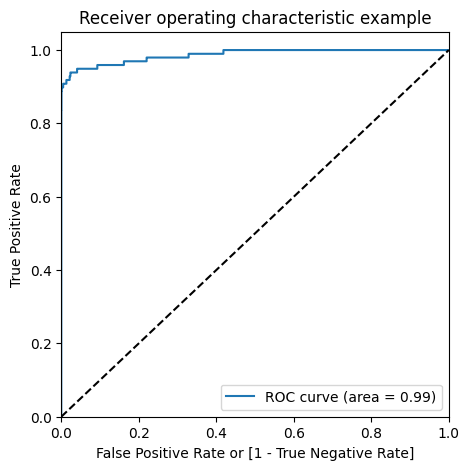

In [173]:
# Evaluate the model for train data and test data with the cut-off value 0.5

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(clf_adasyn, 0.5, 
                                                                                   X_train_adasyn, y_train_adasyn,
                                                                                   X_test, y_test)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 4
3rd Top var = 8


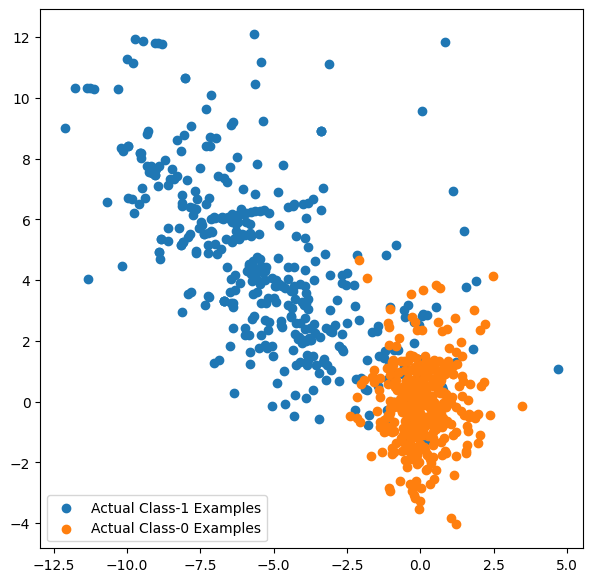

In [174]:
var_imp = []
for i in clf_adasyn.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_adasyn.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_adasyn.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_adasyn.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_adasyn.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_adasyn.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.rcParams['figure.figsize'] = [7, 7]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

### Selecting the overall best model out of oversampled data

In [175]:
# Lets concatenate all the dataframes of oversampled data models containing train data scores

models = pd.concat([model_scores_oversampled, model_scores_smote, model_scores_adasyn], axis=0)

In [176]:
models

Model Name  ROC_AUC score  F1 score  \
0  Logistic Regression (random oversampled)          94.23     94.23   
1        Decision Tree (random oversampled)          99.90     99.90   
2        Random Forest (random oversampled)          99.97     99.97   
3             XG Boost (random oversampled)         100.00    100.00   
4       KNN classifier (random oversampled)          99.98     99.98   
5            SVM model (random oversampled)          89.58     81.57   
0          Logistic Regression (SMOTE data)          94.39     94.23   
1                Decision Tree (SMOTE data)          99.37     99.37   
2                Random Forest (SMOTE data)          99.99     99.99   
3                     XG Boost (SMOTE data)         100.00    100.00   
4               KNN classifier (SMOTE data)          99.89     99.89   
5                    SVM model (SMOTE data)          89.83     81.88   
0         Logistic Regression (ADASYN data)          89.31     89.20   
1               Decision Tree (ADASYN data)          99.34     99.34   
2               Random Forest (ADASYN data)          99.99     99.99   
3                    XG Boost (ADASYN data)         100.00    100.00   
4              KNN classifier (ADASYN data)          99.89     99.89   

   Recall score  
0         94.35  
1        100.00  
2        100.00  
3        100.00  
4        100.00  
5         79.19  
0         91.59  
1         99.62  
2        100.00  
3        100.00  
4        100.00  
5         79.70  
0         88.24  
1         99.71  
2        100.00  
3        100.00  
4        100.00

- __From the dataframe, we can see that XG boost model works well with Random oversampling, SMOTE and ADASYN.__
- __We can select the best model out of these using the best_score obtained out of respective hyper parameter tuning.__
- __Following are the best scores for XG boost models with the respective oversampling techniques:__
> - xgb_grid_result_oversampled : Best ROC-AUC score:  __0.9999956523333745__
> - xgb_grid_result_smote : Best ROC-AUC score:  __0.9999936389266058__
> - xgb_grid_result_adasyn : Best ROC-AUC score:  __0.9999929386784169__

 - __Thus, XG Boost with random oversampling method gives the best score out of all the tried out models.__
 - __Lets fit the final model with the best hyper parameters and evaluate the model on test data.__

In [178]:
# Final model

clf = XGBClassifier(objective = 'binary:logistic', gamma= 0.5, learning_rate= 0.1, n_estimators= 400, 
                    reg_lambda= 0.1, subsample= 0.7)

# Fit the model

clf.fit(X_train_oversampled, y_train_oversampled)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.1, ...)


Evaluation metrics for train data:

ROC-AUC Score:  100.0

F1 Score:  100.0

Recall Score:  100.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902


ROC curve for train data:



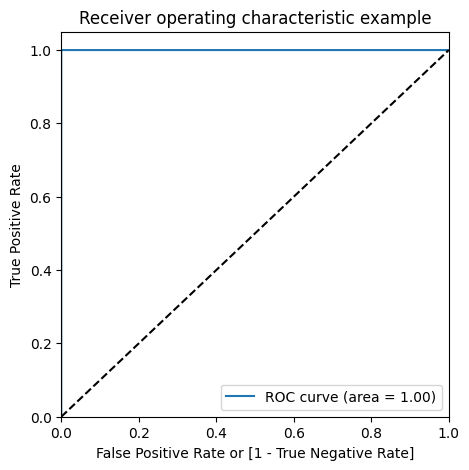


Evaluation metrics for test data:

ROC-AUC Score:  92.85

F1 Score:  87.05

Recall Score:  85.71

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.86      0.87        98

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962


ROC curve for test data:



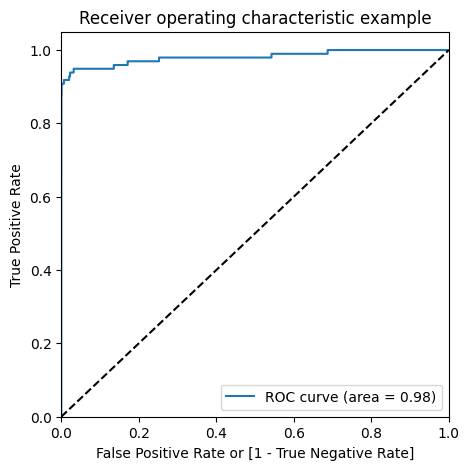

In [179]:
# Evaluate the final model on test data with the cut-off value 0.1 which we obtained from analysis

roc_train, f1_train, recall_train, roc_test, f1_test, recall_test = evaluate_model(clf,
                                                                                   0.1, X_train_oversampled, 
                                                                                   y_train_oversampled,
                                                                                   X_test, y_test)

In [180]:
# Print the evaluation metrics

print("ROC-AUC score for test data:",roc_test)
print("\nF1 score for test data:",f1_test)
print("\nRecall score for test data:",recall_test)

ROC-AUC score for test data: 92.85

F1 score for test data: 87.05

Recall score for test data: 85.71


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


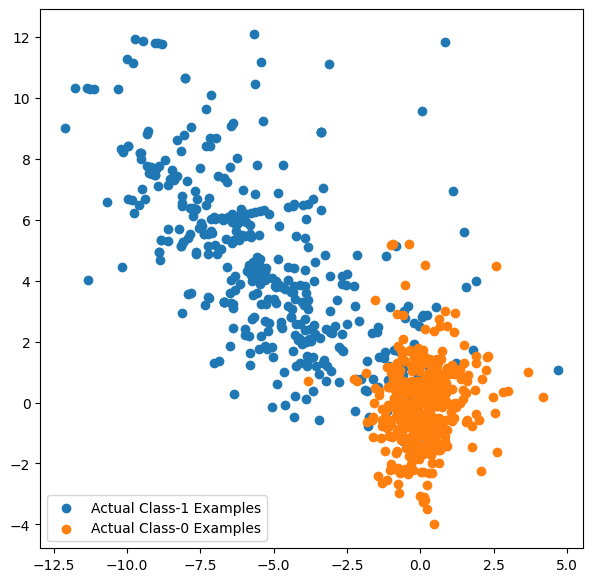

In [182]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.rcParams['figure.figsize'] = [7, 7]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [185]:
y_train_pred = clf.predict(X_train_oversampled)
y_train_pred_proba = clf.predict_proba(X_train_oversampled)[:,1]

In [187]:
y_test_pred = clf.predict(X_test)
y_test_pred_proba = clf.predict_proba(X_test)[:,1]

In [193]:
# Print the FPR,TPR & select the best threshold from the roc curve for train data

print('Train auc = ', metrics.roc_auc_score(y_train_oversampled, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_oversampled, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print('Threshold = ',threshold)

Train auc =  1.0
Threshold =  0.9994012


In [194]:
# Print the FPR,TPR & select the best threshold from the roc curve for test data

print('Test auc = ', metrics.roc_auc_score(y_test, y_test_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print('Threshold = ',threshold)

Test auc =  0.980877934319479
Threshold =  0.00015416818


- __Here the business requires good recall score (sensitivity) to identify the fraudulent cases.__
- __Our final model : XG boost with random oversampled data gives a recall score of 85.71 on the test data.__